In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

from matplotlib import pyplot as plt

from qiskit_qec.info.properties import Properties
import qiskit_qec.codes.codebase as cb
import math

# This will set the default output format to index format and read product syntax
# Pauli strings from left-to-right
import qiskit_qec.utils.pauli_rep as pauli_rep
from qiskit_qec.operators.base_pauli import BasePauli

# Set the output string syntax: choose between PRODUCT_SYNTAX, INDEX_SYNTAX and LATEX_SYNTAX
BasePauli.set_syntax(pauli_rep.INDEX_SYNTAX)

# Set the default output qubit ordering: choose between left-to-right and right-to-left
BasePauli.set_qubit_order("left-to-right")

from qiskit_qec.operators.pauli import Pauli
from qiskit_qec.operators.pauli_list import PauliList

import networkx as nx
import pandas as pd

In [2]:
from IPython.display import display, Math

# Pretty print matrix: Thanks to Krzysztof Mizgała
def lprint(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))


def item_latex_it(item, dollar=True):
    if item=='':
        return ''
    if dollar is True:
        formatted_item = '$'
    else:
        formatted_item = ''
    i = 0
    while i < len(item):
        if item[i].isalpha() and item[i].isupper():
             # Handle capital letter followed by digits
             j = i + 1
             while j < len(item) and item[j].isdigit():
                 j += 1
             formatted_item += f'{item[i]}' + '_{' + item[i + 1:j] + '}'
             i = j
        elif item[i] == '^':
             # Handle '^' and the following curly braces and content
             formatted_item += '^{' + item[i+1:] + '}'
             break  # Finished processing
        else:
             formatted_item += item[i]
             i += 1
    if dollar is True:
        formatted_item += '$'
    return formatted_item

def latex_it(input, dollar=True):
    if not isinstance(input, list):
        return item_latex_it(input, dollar=dollar)
    if len(input)>0:
        return [item_latex_it(item, dollar=dollar) for item in input]
    return ''
    

def latex_it_old(input_list):
    output_list = []
    
    for item in input_list:
        formatted_item = '$'
        i = 0
        
        while i < len(item):
            if item[i].isalpha() and item[i].isupper():
                # Handle capital letter followed by digits
                j = i + 1
                while j < len(item) and item[j].isdigit():
                    j += 1
                formatted_item += f'{item[i]}' + '_{' + item[i + 1:j] + '}'
                i = j
            elif item[i] == '^':
                # Handle '^' and the following curly braces and content
                formatted_item += '^{' + item[i+1:] + '}'
                break  # Finished processing
            else:
                formatted_item += item[i]
                i += 1
        formatted_item += '$'
        output_list.append(formatted_item)
    
    return output_list

def label_fmt(idd):
    return idd[:2] + idd[3:]

def add_node_to_graph(G, id):       
    G.add_nodes_from([id], layer=id[1], label=label_fmt(id))

def add_attribute(att_dict, id, attr, val):
    try:
        att_dict[attr][id] = val
    except KeyError as e:
            att_dict[attr] = {}
            att_dict[attr][id] = val

def add_edge_to_graph(G, id1, id2):
    G.add_edges_from([(id1,id2)]) 

def make_poly(wenum):
    def xpower(var, i):
        if i == 0: return ''
        return var + "^{" + f"{i}" + "}"
    def coeff_var(coeff, var, i):
        if coeff == 0:
            return ''
        if coeff == 1:
            if i == 0:
                return '1'
            return xpower(var, i)
        if coeff == -1:
            if i == 0:
                return '-1'
            return '-' + xpower(var, i)
        return str(coeff) + xpower(var, i)
    comp = [coeff_var(wenum[i], 'x', i) for i in range(len(wenum)) if wenum[i] != 0]
    return " + ".join(comp)

In [3]:
def count_letters(input_string):
    count = 0
    for char in input_string:
        if char.isalpha(): 
            count += 1
    return count

In [4]:
def is_even_gen_set(generators):
    for gen in generators:
        if count_letters(gen)%2 == 1:
            return False
    return True

def max_weight(generators):
    weights = [count_letters(item) for item in generators]
    return max(weights)
            

# Count all codes in base database

## Find the number of codes for each n

In [11]:
all_codes_table = np.zeros((2,10), dtype=int) # for table in paper

In [742]:
print(f"Total number of codes for each n:")
summary = 0
for n in range(1,10):
    total = 0
    num = 0
    for k in range(n+1):
        codes = cb.all_small_codes(n, k, info_only=True, list_only=True)
        num = len(codes)
        total += num
    all_codes_table[0][n] = total
    print(f" n = {n} : {total}")
    summary += total
print(f"The database contains {summary} number of code equivalence classes")
    

Total number of codes for each n:
 n = 1 : 2
 n = 2 : 5
 n = 3 : 12
 n = 4 : 35
 n = 5 : 112
 n = 6 : 474
 n = 7 : 2757
 n = 8 : 28642
 n = 9 : 721967
The database contains 754006 number of code equivalence classes


## Find the number of codes for each n that are indecomposable

In [743]:
print(f"Total number of codes for each n that are indecomposable:")
summary = 0
for n in range(1,10):
    total = 0
    num = 0
    for k in range(n+1):
        codes = cb.all_small_codes(n, k, is_decomposable=False, info_only=True, list_only=True)
        num = len(codes)
        total += num
    all_codes_table[1][n] = total
    print(f" n = {n} : {total}")
    summary += total
print(f"The database contains {summary} number of code equivalence classes")

Total number of codes for each n that are indecomposable:
 n = 1 : 2
 n = 2 : 2
 n = 3 : 4
 n = 4 : 13
 n = 5 : 46
 n = 6 : 245
 n = 7 : 1765
 n = 8 : 22773
 n = 9 : 662054
The database contains 686904 number of code equivalence classes


In [745]:
100*686904/754006

91.1006013214749

## Paper Table: Number of codes : all and indecompsable

In [16]:
lprint(all_codes_table)

<IPython.core.display.Math object>

In [43]:
n_max = 9
val = "n & " + " & ".join(str(i) for i in range(1,n_max + 1)) + " \\\ "
nk = "$N_n$ & " + " & ".join(str(all_codes_table[0][i]) for i in range(1,n_max + 1)) + " \\\ "
mk = "$M_n$ & " + " & ".join(str(all_codes_table[1][i]) for i in range(1,n_max + 1)) + " \\\ "
print(f"{val}\n\midrule\n{nk}\n{mk}\n")

n & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
$N_n$ & 2 & 5 & 12 & 35 & 112 & 474 & 2757 & 28642 & 721967 \\ 
$M_n$ & 2 & 2 & 4 & 13 & 46 & 245 & 1765 & 22773 & 662054 \\ 



## Number of Codes: fine grained

In [64]:
all_codes_n_k = np.zeros((10,10), dtype=int)
for n in range(1,10):
    total = 0
    num = 0
    for k in range(n+1):
        codes = cb.all_small_codes(n, k,  info_only=True, list_only=True)
        try:
            num = len(codes)
            all_codes_n_k[n][k] = num
            print(f"[[{n},{k}]]: {num}")
        except TypeError:
            pass
        total = total + num
    print(f"Total number of codes: n = {n} : {total}")
    


[[1,0]]: 1
[[1,1]]: 1
Total number of codes: n = 1 : 2
[[2,0]]: 2
[[2,1]]: 2
[[2,2]]: 1
Total number of codes: n = 2 : 5
[[3,0]]: 3
[[3,1]]: 5
[[3,2]]: 3
[[3,3]]: 1
Total number of codes: n = 3 : 12
[[4,0]]: 6
[[4,1]]: 13
[[4,2]]: 11
[[4,3]]: 4
[[4,4]]: 1
Total number of codes: n = 4 : 35
[[5,0]]: 11
[[5,1]]: 36
[[5,2]]: 40
[[5,3]]: 19
[[5,4]]: 5
[[5,5]]: 1
Total number of codes: n = 5 : 112
[[6,0]]: 26
[[6,1]]: 115
[[6,2]]: 185
[[6,3]]: 109
[[6,4]]: 32
[[6,5]]: 6
[[6,6]]: 1
Total number of codes: n = 6 : 474
[[7,0]]: 59
[[7,1]]: 448
[[7,2]]: 1075
[[7,3]]: 852
[[7,4]]: 267
[[7,5]]: 48
[[7,6]]: 7
[[7,7]]: 1
Total number of codes: n = 7 : 2757
[[8,0]]: 182
[[8,1]]: 2371
[[8,2]]: 10010
[[8,3]]: 11422
[[8,4]]: 3963
[[8,5]]: 614
[[8,6]]: 71
[[8,7]]: 8
[[8,8]]: 1
Total number of codes: n = 8 : 28642
[[9,0]]: 675
[[9,1]]: 20128
[[9,2]]: 181039
[[9,3]]: 353569
[[9,4]]: 146658
[[9,5]]: 18445
[[9,6]]: 1344
[[9,7]]: 99
[[9,8]]: 9
[[9,9]]: 1
Total number of codes: n = 9 : 721967


In [65]:
lprint(all_codes_n_k)

<IPython.core.display.Math object>

## Paper Table: Number of codes for each n and k

In [66]:
n_max = 9
val = "$n\\backslash k$ & " + " & ".join(str(i) for i in range(0,n_max + 1)) + " \\\ "
print(f"{val}\n\midrule")
for n in range(1,10):
    print(f"{n} & " + " & ".join(str(all_codes_n_k[n][k]) for k in range(n_max + 1)) + " \\\ ")

$n\backslash k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
2 & 2 & 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
3 & 3 & 5 & 3 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
4 & 6 & 13 & 11 & 4 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
5 & 11 & 36 & 40 & 19 & 5 & 1 & 0 & 0 & 0 & 0 \\ 
6 & 26 & 115 & 185 & 109 & 32 & 6 & 1 & 0 & 0 & 0 \\ 
7 & 59 & 448 & 1075 & 852 & 267 & 48 & 7 & 1 & 0 & 0 \\ 
8 & 182 & 2371 & 10010 & 11422 & 3963 & 614 & 71 & 8 & 1 & 0 \\ 
9 & 675 & 20128 & 181039 & 353569 & 146658 & 18445 & 1344 & 99 & 9 & 1 \\ 


## Count all codes that are indecomposable

In [67]:
all_codes_n_k_indec = np.zeros((10,10), dtype=int)
for n in range(1,10):
    total = 0
    num = 0
    for k in range(n+1):
        codes = cb.all_small_codes(n, k, is_decomposable=False, info_only=True, list_only=True)
        try:
            num = len(codes)
            all_codes_n_k_indec[n][k] = num
            print(f"[[{n},{k}]]: {num}")
        except TypeError:
            pass
        total = total + num
    print(f"Total number of codes: n = {n} : {total}")
    

[[1,0]]: 1
[[1,1]]: 1
Total number of codes: n = 1 : 2
[[2,0]]: 1
[[2,1]]: 1
[[2,2]]: 0
Total number of codes: n = 2 : 2
[[3,0]]: 1
[[3,1]]: 2
[[3,2]]: 1
[[3,3]]: 0
Total number of codes: n = 3 : 4
[[4,0]]: 2
[[4,1]]: 6
[[4,2]]: 4
[[4,3]]: 1
[[4,4]]: 0
Total number of codes: n = 4 : 13
[[5,0]]: 4
[[5,1]]: 17
[[5,2]]: 18
[[5,3]]: 6
[[5,4]]: 1
[[5,5]]: 0
Total number of codes: n = 5 : 46
[[6,0]]: 11
[[6,1]]: 63
[[6,2]]: 107
[[6,3]]: 53
[[6,4]]: 10
[[6,5]]: 1
[[6,6]]: 0
Total number of codes: n = 6 : 245
[[7,0]]: 26
[[7,1]]: 284
[[7,2]]: 754
[[7,3]]: 556
[[7,4]]: 131
[[7,5]]: 13
[[7,6]]: 1
[[7,7]]: 0
Total number of codes: n = 7 : 1765
[[8,0]]: 101
[[8,1]]: 1767
[[8,2]]: 8328
[[8,3]]: 9417
[[8,4]]: 2834
[[8,5]]: 306
[[8,6]]: 19
[[8,7]]: 1
[[8,8]]: 0
Total number of codes: n = 8 : 22773
[[9,0]]: 440
[[9,1]]: 17143
[[9,2]]: 167595
[[9,3]]: 331296
[[9,4]]: 131035
[[9,5]]: 13852
[[9,6]]: 668
[[9,7]]: 24
[[9,8]]: 1
[[9,9]]: 0
Total number of codes: n = 9 : 662054


In [68]:
lprint(all_codes_n_k_indec)

<IPython.core.display.Math object>

## Paper Table: Number of codes for each n and k that are indecomposable

In [69]:
n_max = 9
val = "$n\\backslash k$ & " + " & ".join(str(i) for i in range(0,n_max + 1)) + " \\\ "
print(f"{val}\n\midrule")
for n in range(1,10):
    print(f"{n} & " + " & ".join(str(all_codes_n_k_indec[n][k]) for k in range(n_max + 1)) + " \\\ ")

$n\backslash k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
2 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
3 & 1 & 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
4 & 2 & 6 & 4 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
5 & 4 & 17 & 18 & 6 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
6 & 11 & 63 & 107 & 53 & 10 & 1 & 0 & 0 & 0 & 0 \\ 
7 & 26 & 284 & 754 & 556 & 131 & 13 & 1 & 0 & 0 & 0 \\ 
8 & 101 & 1767 & 8328 & 9417 & 2834 & 306 & 19 & 1 & 0 & 0 \\ 
9 & 440 & 17143 & 167595 & 331296 & 131035 & 13852 & 668 & 24 & 1 & 0 \\ 


## Count all codes that are decomposable

In [70]:
all_codes_n_k_dec = np.zeros((10,10), dtype=int)
for n in range(1,10):
    total = 0
    num = 0
    for k in range(n+1):
        codes = cb.all_small_codes(n, k, is_decomposable=True, info_only=True, list_only=True)
        try:
            num = len(codes)
            all_codes_n_k_dec[n][k] = num
            print(f"[[{n},{k}]]: {num}")
        except TypeError:
            pass
        total = total + num
    print(f"Total number of codes: n = {n} : {total}")

[[1,0]]: 0
[[1,1]]: 0
Total number of codes: n = 1 : 0
[[2,0]]: 1
[[2,1]]: 1
[[2,2]]: 1
Total number of codes: n = 2 : 3
[[3,0]]: 2
[[3,1]]: 3
[[3,2]]: 2
[[3,3]]: 1
Total number of codes: n = 3 : 8
[[4,0]]: 4
[[4,1]]: 7
[[4,2]]: 7
[[4,3]]: 3
[[4,4]]: 1
Total number of codes: n = 4 : 22
[[5,0]]: 7
[[5,1]]: 19
[[5,2]]: 22
[[5,3]]: 13
[[5,4]]: 4
[[5,5]]: 1
Total number of codes: n = 5 : 66
[[6,0]]: 15
[[6,1]]: 52
[[6,2]]: 78
[[6,3]]: 56
[[6,4]]: 22
[[6,5]]: 5
[[6,6]]: 1
Total number of codes: n = 6 : 229
[[7,0]]: 33
[[7,1]]: 164
[[7,2]]: 321
[[7,3]]: 296
[[7,4]]: 136
[[7,5]]: 35
[[7,6]]: 6
[[7,7]]: 1
Total number of codes: n = 7 : 992
[[8,0]]: 81
[[8,1]]: 604
[[8,2]]: 1682
[[8,3]]: 2005
[[8,4]]: 1129
[[8,5]]: 308
[[8,6]]: 52
[[8,7]]: 7
[[8,8]]: 1
Total number of codes: n = 8 : 5869
[[9,0]]: 235
[[9,1]]: 2985
[[9,2]]: 13444
[[9,3]]: 22273
[[9,4]]: 15623
[[9,5]]: 4593
[[9,6]]: 676
[[9,7]]: 75
[[9,8]]: 8
[[9,9]]: 1
Total number of codes: n = 9 : 59913


In [71]:
lprint(all_codes_n_k_dec)

<IPython.core.display.Math object>

## Paper Table: Number of codes for each n and k that are decomposable

In [72]:
n_max = 9
val = "$n\\backslash k$ & " + " & ".join(str(i) for i in range(0,n_max + 1)) + " \\\ "
print(f"{val}\n\midrule")
for n in range(1,10):
    print(f"{n} & " + " & ".join(str(all_codes_n_k_dec[n][k]) for k in range(n_max + 1)) + " \\\ ")

$n\backslash k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
2 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
3 & 2 & 3 & 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
4 & 4 & 7 & 7 & 3 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
5 & 7 & 19 & 22 & 13 & 4 & 1 & 0 & 0 & 0 & 0 \\ 
6 & 15 & 52 & 78 & 56 & 22 & 5 & 1 & 0 & 0 & 0 \\ 
7 & 33 & 164 & 321 & 296 & 136 & 35 & 6 & 1 & 0 & 0 \\ 
8 & 81 & 604 & 1682 & 2005 & 1129 & 308 & 52 & 7 & 1 & 0 \\ 
9 & 235 & 2985 & 13444 & 22273 & 15623 & 4593 & 676 & 75 & 8 & 1 \\ 


# Full Tables of codes

In [422]:
def zero_dash(num):
    if num == 0:
        return '-'
    return str(num)

def insert_pipe(string, offsets):
    result = []
    index = 0
    for num in offsets:
        result.append(string[index:index+num])
        index += num
        if index < len(string):
            result.append('|')
    return ''.join(result)

def adjust_table(data, coln_adjust):
    table_data = []
    for k in range(10):
        table_data += [data[1:,k,1:coln_adjust[k]]]
    full_data = np.concatenate(table_data, axis=1)
    return full_data

def make_full_table(data, coln_adjust, comb_var:str):
    full_data = adjust_table(data, coln_adjust)

    offset = [0] + coln_adjust[1:]
    d_header = [comb_var]
    for k in range(10):
        d_header += [str(d) for d in range(1,4+offset[k]+1)]

    offsets = [1]+[4+item for item in offset]
    tab_string = insert_pipe('l'*(full_data.shape[1]+1), offsets)
    k_column = " & ".join(["\\multicolumn{" + str(4+offset[k]) + "}{c|}{" + str(k) + "}" for k in range(9)])
    k_column +=  " & \\multicolumn{" + str(4+offset[9]) + "}{c}{" + str(9) + "}"
    k_column = "$k$ & " + k_column + " \\\ "

    out_string = "\\begin{tabular}{" + tab_string + "}" + "\n" \
        + "\\toprule" + "\n" \
        + k_column + "\n" \
        + " & ".join([str(i) for i in d_header]) + " \\\ " + "\n" \
        + "\\midrule" + "\n"
    for i in range(9):
        out_string += str(i+1) + " & " + " & ".join([zero_dash(item) for item in full_data[i]]) + " \\\ " + "\n"
    out_string += "\\bottomrule" + "\n" + "\\end{tabular}"
    
    return out_string
    

### All Codes

In [87]:
results_all = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(10):
        for d in range(5):
            codes = cb.all_small_codes(n, k, d=d, info_only=True, list_only=True)
            results_all[n][k][d] = len(codes)

In [419]:
coln_adjust = [None, -1, -1, -1, -2, -2, -2, -3, -3, -3]

In [423]:
lprint(adjust_table(results_all, coln_adjust))

<IPython.core.display.Math object>

In [424]:
print(make_full_table(results_all, coln_adjust, "$n/d$"))

\begin{tabular}{l|llll|lll|lll|lll|ll|ll|ll|l|l|l}
\toprule
$k$ & \multicolumn{4}{c|}{0} & \multicolumn{3}{c|}{1} & \multicolumn{3}{c|}{2} & \multicolumn{3}{c|}{3} & \multicolumn{2}{c|}{4} & \multicolumn{2}{c|}{5} & \multicolumn{2}{c|}{6} & \multicolumn{1}{c|}{7} & \multicolumn{1}{c|}{8} & \multicolumn{1}{c}{9} \\ 
$n/d$ & 1 & 2 & 3 & 4 & 1 & 2 & 3 & 1 & 2 & 3 & 1 & 2 & 3 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 1 & 1 \\ 
\midrule
1 & 1 & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & 1 & 1 & - & - & 2 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & 2 & 1 & - & - & 5 & - & - & 3 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & 3 & 3 & - & - & 11 & 2 & - & 10 & 1 & - & 4 & - & - & 1 & - & - & - & - & - & - & - & - \\ 
5 & 6 & 4 & 1 & - & 29 & 6 & 1 & 37 & 3 & - & 19 & - & - & 5 & - & 1 & - & - & - & - & - & - \\ 
6 & 11 & 13 & 1 & 1 & 78 & 35 & 2 & 156 & 29 & - & 104 & 5 & - & 31 & 1 & 6 & - & 1 & - & - & - & - \

### All indecomposable codes

In [748]:
results_indec = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(10):
        for d in range(5):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
            results_indec[n][k][d] = len(codes)

In [749]:
coln_adjust = [None, -1, -1, -1, -2, -2, -2, -3, -3, -3]
lprint(adjust_table(results_indec, coln_adjust))

<IPython.core.display.Math object>

In [260]:
print(make_full_table(results_indec, coln_adjust, "$n/d$"))

\begin{tabular}{l|llll|lll|lll|lll|ll|ll|ll|l|l|l}
\toprule
$k$ & \multicolumn{4}{c|}{0} & \multicolumn{3}{c|}{1} & \multicolumn{3}{c|}{2} & \multicolumn{3}{c|}{3} & \multicolumn{2}{c|}{4} & \multicolumn{2}{c|}{5} & \multicolumn{2}{c|}{6} & \multicolumn{1}{c|}{7} & \multicolumn{1}{c|}{8} & \multicolumn{1}{c}{9} \\ 
$n/d$ & 1 & 2 & 3 & 4 & 1 & 2 & 3 & 1 & 2 & 3 & 1 & 2 & 3 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 1 & 1 \\ 
\midrule
1 & 1 & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & - & 1 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & - & 1 & - & - & 2 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & - & 2 & - & - & 4 & 2 & - & 3 & 1 & - & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
5 & - & 3 & 1 & - & 12 & 4 & 1 & 16 & 2 & - & 6 & - & - & 1 & - & - & - & - & - & - & - & - \\ 
6 & - & 9 & 1 & 1 & 35 & 27 & 1 & 82 & 25 & - & 48 & 5 & - & 9 & 1 & 1 & - & - & - & - & - & - \\ 
7 & -

## All indecomposable codes with k>0 and d>1

In [750]:
results_indec_kpos_erdect = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(1,10):
        for d in range(2,5):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
            results_indec_kpos_erdect[n][k][d] = len(codes)

In [772]:
coln_adjust = [None, None, None, None, None, None, None, None, None, None]
lprint(adjust_table(results_indec_kpos_erdect, coln_adjust))

<IPython.core.display.Math object>

In [789]:
table = adjust_table(results_indec_kpos_erdect, coln_adjust)
lprint(np.sum(table,axis =1))

<IPython.core.display.Math object>

In [791]:
print(f"Total number of indecomposable classes with k>0 and d>1 is {np.sum(table)}")

Total number of indecomposable classes with k>0 and d>1 is 271910


In [792]:
100 * 271910/686904 

39.584861931216004

## All indecomposable equivalence classes with k>0 and d>1 that are CSS

In [798]:
results_indec_kpos_erdect_css = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(1,10):
        for d in range(2,5):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, is_css=True, info_only=True, list_only=True)
            results_indec_kpos_erdect_css[n][k][d] = len(codes)

In [802]:
coln_adjust = [None, None, None, None, None, None, None, None, None, None]

lprint(adjust_table(results_indec_kpos_erdect_css, coln_adjust))

<IPython.core.display.Math object>

In [804]:
table = adjust_table(results_indec_kpos_erdect_css, coln_adjust)
np.sum(table, axis=1)

array([   0,    0,    0,    2,    4,   25,   94,  562, 3641])

In [805]:
print(f"There are {np.sum(table)} indecomposbale CSS codes with k>0 and d>1")

There are 4328 indecomposbale CSS codes with k>0 and d>1


### All css codes

In [752]:
results_css = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(10):
        for d in range(5):
            codes = cb.all_small_codes(n, k, d=d, is_css=True, info_only=True, list_only=True)
            results_css[n][k][d] = len(codes)

In [753]:
coln_adjust = [None, -1, -2, -2, -2, -2, -2, -3, -3, -3]
lprint(adjust_table(results_css, coln_adjust))

<IPython.core.display.Math object>

In [268]:
print(make_full_table(results_css, coln_adjust, "$n/d$"))

\begin{tabular}{l|llll|lll|ll|ll|ll|ll|ll|l|l|l}
\toprule
$k$ & \multicolumn{4}{c|}{0} & \multicolumn{3}{c|}{1} & \multicolumn{2}{c|}{2} & \multicolumn{2}{c|}{3} & \multicolumn{2}{c|}{4} & \multicolumn{2}{c|}{5} & \multicolumn{2}{c|}{6} & \multicolumn{1}{c|}{7} & \multicolumn{1}{c|}{8} & \multicolumn{1}{c}{9} \\ 
$n/d$ & 1 & 2 & 3 & 4 & 1 & 2 & 3 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 1 & 1 \\ 
\midrule
1 & 1 & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & 1 & 1 & - & - & 2 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & 2 & 1 & - & - & 5 & - & - & 3 & - & 1 & - & - & - & - & - & - & - & - & - & - \\ 
4 & 3 & 3 & - & - & 11 & 1 & - & 10 & 1 & 4 & - & 1 & - & - & - & - & - & - & - & - \\ 
5 & 6 & 4 & - & - & 27 & 4 & - & 32 & 2 & 18 & - & 5 & - & 1 & - & - & - & - & - & - \\ 
6 & 10 & 11 & 1 & - & 65 & 17 & - & 114 & 13 & 79 & 2 & 29 & 1 & 6 & - & 1 & - & - & - & - \\ 
7 & 22 & 20 & 1 & - & 175 & 62 & 1 & 417 & 52 & 392 & 15

### All indecomposable CSS codes

In [269]:
results_css_indec = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(10):
        for d in range(5):
            codes = cb.all_small_codes(n, k, d=d, is_css=True, is_decomposable=False, info_only=True, list_only=True)
            results_css_indec[n][k][d] = len(codes)

In [272]:
coln_adjust = [None, -1, -2, -2, -2, -2, -2, -3, -3, -3]
lprint(adjust_table(results_css_indec, coln_adjust))

<IPython.core.display.Math object>

In [274]:
print(make_full_table(results_css_indec, coln_adjust, "$n/d$"))

\begin{tabular}{l|llll|lll|ll|ll|ll|ll|ll|l|l|l}
\toprule
$k$ & \multicolumn{4}{c|}{0} & \multicolumn{3}{c|}{1} & \multicolumn{2}{c|}{2} & \multicolumn{2}{c|}{3} & \multicolumn{2}{c|}{4} & \multicolumn{2}{c|}{5} & \multicolumn{2}{c|}{6} & \multicolumn{1}{c|}{7} & \multicolumn{1}{c|}{8} & \multicolumn{1}{c}{9} \\ 
$n/d$ & 1 & 2 & 3 & 4 & 1 & 2 & 3 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 1 & 1 \\ 
\midrule
1 & 1 & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & - & 1 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & - & 1 & - & - & 2 & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & - & 2 & - & - & 4 & 1 & - & 3 & 1 & 1 & - & - & - & - & - & - & - & - & - & - \\ 
5 & - & 3 & - & - & 10 & 3 & - & 12 & 1 & 5 & - & 1 & - & - & - & - & - & - & - & - \\ 
6 & - & 7 & 1 & - & 25 & 12 & - & 50 & 10 & 30 & 2 & 8 & 1 & 1 & - & - & - & - & - & - \\ 
7 & - & 14 & 1 & - & 74 & 41 & 1 & 208 & 37 & 185 & 13 & 63 & 2

In [793]:
table = adjust_table(results_css_indec, coln_adjust)

In [794]:
np.sum(table, axis=1)

array([    2,     2,     4,    12,    35,   147,   650,  3669, 24589])

In [796]:
print(f"There are {np.sum(np.sum(table, axis=1))} indecomposable CSS codes in the database")

There are 29110 indecomposable CSS codes in the database


### GF(4)-linear code counts

In [77]:
results_gf4 = np.zeros((10, 10, 5), dtype=int)

for n in range(10):
    for k in range(10):
        for d in range(5):
            codes = cb.all_small_codes(n, k, d=d, is_gf4linear=True, info_only=True, list_only=True)
            results_gf4[n][k][d] = len(codes)

In [275]:
coln_adjust = [None, -1, -2, -2, -2, -2, -2, -3, -3, -3]
lprint(adjust_table(results_gf4, coln_adjust))

<IPython.core.display.Math object>

In [277]:
print(make_full_table(results_gf4, coln_adjust, "$n/d$"))

\begin{tabular}{l|llll|lll|ll|ll|ll|ll|ll|l|l|l}
\toprule
$k$ & \multicolumn{4}{c|}{0} & \multicolumn{3}{c|}{1} & \multicolumn{2}{c|}{2} & \multicolumn{2}{c|}{3} & \multicolumn{2}{c|}{4} & \multicolumn{2}{c|}{5} & \multicolumn{2}{c|}{6} & \multicolumn{1}{c|}{7} & \multicolumn{1}{c|}{8} & \multicolumn{1}{c}{9} \\ 
$n/d$ & 1 & 2 & 3 & 4 & 1 & 2 & 3 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 1 & 1 \\ 
\midrule
1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & - & 1 & - & - & - & - & - & 1 & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
5 & - & - & - & - & 1 & - & 1 & - & - & 2 & - & - & - & - & - & - & - & - & - & - \\ 
6 & - & 1 & - & 1 & - & - & - & 2 & 2 & - & - & 2 & 1 & - & - & - & - & - & - & - \\ 
7 & - & - & - & - & 2 & - & 2 & - & - & 4 & 1 & - & - & 3 & - & - & - 

### Indecomposbale GF(4)-linear code counts

In [811]:
results_gf4_indec = np.zeros((10, 10, 5), dtype=int)

all_gfindcomp = []
for n in range(10):
    for k in range(10):
        for d in range(5):
            codes = cb.all_small_codes(n, k, d=d, is_gf4linear=True, is_decomposable=False, info_only=True, list_only=True)
            results_gf4_indec[n][k][d] = len(codes)
            all_gfindcomp +=  codes

In [276]:
coln_adjust = [None, -1, -2, -2, -2, -2, -2, -3, -3, -3]
lprint(adjust_table(results_gf4_indec, coln_adjust))

<IPython.core.display.Math object>

In [278]:
print(make_full_table(results_gf4_indec, coln_adjust, "$n/d$"))

\begin{tabular}{l|llll|lll|ll|ll|ll|ll|ll|l|l|l}
\toprule
$k$ & \multicolumn{4}{c|}{0} & \multicolumn{3}{c|}{1} & \multicolumn{2}{c|}{2} & \multicolumn{2}{c|}{3} & \multicolumn{2}{c|}{4} & \multicolumn{2}{c|}{5} & \multicolumn{2}{c|}{6} & \multicolumn{1}{c|}{7} & \multicolumn{1}{c|}{8} & \multicolumn{1}{c}{9} \\ 
$n/d$ & 1 & 2 & 3 & 4 & 1 & 2 & 3 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 2 & 1 & 1 & 1 \\ 
\midrule
1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & - & - & - & - & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
5 & - & - & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
6 & - & - & - & 1 & - & - & - & - & 1 & - & - & - & 1 & - & - & - & - & - & - & - \\ 
7 & - & - & - & - & - & - & 1 & - & - & - & 1 & - & - & - & - & - & - 

In [806]:
print(f"There are only {np.sum(adjust_table(results_gf4_indec, coln_adjust))} indecomposable GF(4)-linear equivalence classes")

There are only 24 indecomposable GF(4)-linear equivalence classes


In [813]:
all_gfindcomp

[{aut_group_generators : ['S0S1', '(0,1)', 'H0H1'],
 aut_group_size       : 12,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 1,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 1,
 is_subsystem         : 1,
 isotropic_generators : ['Z0Z1', 'X0X1'],
 k                    : 0,
 logical_ops          : [],
 n                    : 2,
 uuid                 : 9e7112a5-868b-4832-bd42-2eaf5f1182de,
 weight_enumerator    : [1, 0, 3],
 },
 {aut_group_generators : ['(2,3)', '(1,2)', 'S0S1S2S3', '(0,1)', 'H0H1H2H3'],
 aut_group_size       : 144,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 9,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 1,
 is_subsystem         : 1,
 isotropic_generators : ['Z0Z1Z2Z3', 'X0X1X2X3'],
 k                    : 2,
 logical_ops          : ['X1X2', 'X1X3', 'Z0Z2'

# Maximum distance

### All codes maximum distance

In [318]:
mat_all = np.zeros((10,10),dtype=int)
n_set = []
k_set = []
d_set = []
for n in range(10):
    for k in range(0,10):
        codes = cb.all_small_codes(n, k, info_only=True, list_only=True)
        if len(codes) > 0:
            d_max = -1
            code_index = -1
            for code in codes:
                if code['d'] > d_max:
                    d_max = code['d']
                    code_index = code['index']
            n_set += [n]
            k_set += [k]
            d_set += [d_max]
            mat_all[n,k] = d_max

In [317]:
lprint(mat_all)

<IPython.core.display.Math object>

In [328]:
print("\\begin{tabular}{c|llllllllll}")
print("\\toprule")
print(f"$n/k$ & {' & '.join([str(i) for i in range(10)])} \\\ ")
print("\\midrule")
for n in range(1,10):
    print(f" {n} &  {' & '.join([zero_dash(num) for num in mat_all[n]])} \\\ ")
print("\\end{tabular}")

        

\begin{tabular}{c|llllllllll}
\toprule
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
 1 &  1 & 1 & - & - & - & - & - & - & - & - \\ 
 2 &  2 & 1 & 1 & - & - & - & - & - & - & - \\ 
 3 &  2 & 1 & 1 & 1 & - & - & - & - & - & - \\ 
 4 &  2 & 2 & 2 & 1 & 1 & - & - & - & - & - \\ 
 5 &  3 & 3 & 2 & 1 & 1 & 1 & - & - & - & - \\ 
 6 &  4 & 3 & 2 & 2 & 2 & 1 & 1 & - & - & - \\ 
 7 &  3 & 3 & 2 & 2 & 2 & 1 & 1 & 1 & - & - \\ 
 8 &  4 & 3 & 3 & 3 & 2 & 2 & 2 & 1 & 1 & - \\ 
 9 &  4 & 3 & 3 & 3 & 2 & 2 & 2 & 1 & 1 & 1 \\ 
\end{tabular}


### All indecomposable code maximum distance

In [329]:
mat_all_indecom = np.zeros((10,10),dtype=int)
n_set = []
k_set = []
d_set = []
for n in range(10):
    for k in range(0,10):
        codes = cb.all_small_codes(n, k, is_decomposable=False, info_only=True, list_only=True)
        if len(codes) > 0:
            d_max = -1
            code_index = -1
            for code in codes:
                if code['d'] > d_max:
                    d_max = code['d']
                    code_index = code['index']
            n_set += [n]
            k_set += [k]
            d_set += [d_max]
            mat_all_indecom[n,k] = d_max

In [330]:
lprint(mat_all_indecom)

<IPython.core.display.Math object>

In [331]:
print("\\begin{tabular}{c|llllllllll}")
print("\\toprule")
print(f"$n/k$ & {' & '.join([str(i) for i in range(10)])} \\\ ")
print("\\midrule")
for n in range(1,10):
    print(f" {n} &  {' & '.join([zero_dash(num) for num in mat_all_indecom[n]])} \\\ ")
print("\\end{tabular}")

\begin{tabular}{c|llllllllll}
\toprule
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
 1 &  1 & 1 & - & - & - & - & - & - & - & - \\ 
 2 &  2 & 1 & - & - & - & - & - & - & - & - \\ 
 3 &  2 & 1 & 1 & - & - & - & - & - & - & - \\ 
 4 &  2 & 2 & 2 & 1 & - & - & - & - & - & - \\ 
 5 &  3 & 3 & 2 & 1 & 1 & - & - & - & - & - \\ 
 6 &  4 & 3 & 2 & 2 & 2 & 1 & - & - & - & - \\ 
 7 &  3 & 3 & 2 & 2 & 2 & 1 & 1 & - & - & - \\ 
 8 &  4 & 3 & 3 & 3 & 2 & 2 & 2 & 1 & - & - \\ 
 9 &  4 & 3 & 3 & 3 & 2 & 2 & 2 & 1 & 1 & - \\ 
\end{tabular}


### All CCS codes maximum distance

In [332]:
mat_all_css = np.zeros((10,10),dtype=int)
n_set = []
k_set = []
d_set = []
for n in range(10):
    for k in range(0,10):
        codes = cb.all_small_codes(n, k, is_css=True, info_only=True, list_only=True)
        if len(codes) > 0:
            d_max = -1
            code_index = -1
            for code in codes:
                if code['d'] > d_max:
                    d_max = code['d']
                    code_index = code['index']
            n_set += [n]
            k_set += [k]
            d_set += [d_max]
            mat_all_css[n,k] = d_max

In [333]:
lprint(mat_all_css)

<IPython.core.display.Math object>

In [334]:
print("\\begin{tabular}{c|llllllllll}")
print("\\toprule")
print(f"$n/k$ & {' & '.join([str(i) for i in range(10)])} \\\ ")
print("\\midrule")
for n in range(1,10):
    print(f" {n} &  {' & '.join([zero_dash(num) for num in mat_all_css[n]])} \\\ ")
print("\\end{tabular}")

\begin{tabular}{c|llllllllll}
\toprule
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
 1 &  1 & 1 & - & - & - & - & - & - & - & - \\ 
 2 &  2 & 1 & 1 & - & - & - & - & - & - & - \\ 
 3 &  2 & 1 & 1 & 1 & - & - & - & - & - & - \\ 
 4 &  2 & 2 & 2 & 1 & 1 & - & - & - & - & - \\ 
 5 &  2 & 2 & 2 & 1 & 1 & 1 & - & - & - & - \\ 
 6 &  3 & 2 & 2 & 2 & 2 & 1 & 1 & - & - & - \\ 
 7 &  3 & 3 & 2 & 2 & 2 & 1 & 1 & 1 & - & - \\ 
 8 &  4 & 3 & 2 & 2 & 2 & 2 & 2 & 1 & 1 & - \\ 
 9 &  3 & 3 & 2 & 2 & 2 & 2 & 2 & 1 & 1 & 1 \\ 
\end{tabular}


### All indecomposable CSS codes maximum distance

In [335]:
mat_all_indecom_css = np.zeros((10,10),dtype=int)
n_set = []
k_set = []
d_set = []
for n in range(10):
    for k in range(0,10):
        codes = cb.all_small_codes(n, k, is_css=True, is_decomposable=False, info_only=True, list_only=True)
        if len(codes) > 0:
            d_max = -1
            code_index = -1
            for code in codes:
                if code['d'] > d_max:
                    d_max = code['d']
                    code_index = code['index']
            n_set += [n]
            k_set += [k]
            d_set += [d_max]
            mat_all_indecom_css[n,k] = d_max

In [336]:
lprint(mat_all_indecom_css)

<IPython.core.display.Math object>

In [349]:
print("\\begin{tabular}{c|llllllllll}")
print("\\toprule")
print(f"$n/k$ & {' & '.join([str(i) for i in range(10)])} \\\ ")
print("\\midrule")
for n in range(1,10):
    print(f" {n} &  {' & '.join([zero_dash(num) for num in mat_all_indecom_css[n]])} \\\ ")
print("\\end{tabular}")

\begin{tabular}{c|llllllllll}
\toprule
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
 1 &  1 & 1 & - & - & - & - & - & - & - & - \\ 
 2 &  2 & 1 & - & - & - & - & - & - & - & - \\ 
 3 &  2 & 1 & 1 & - & - & - & - & - & - & - \\ 
 4 &  2 & 2 & 2 & 1 & - & - & - & - & - & - \\ 
 5 &  2 & 2 & 2 & 1 & 1 & - & - & - & - & - \\ 
 6 &  3 & 2 & 2 & 2 & 2 & 1 & - & - & - & - \\ 
 7 &  3 & 3 & 2 & 2 & 2 & 1 & 1 & - & - & - \\ 
 8 &  4 & 3 & 2 & 2 & 2 & 2 & 2 & 1 & - & - \\ 
 9 &  3 & 3 & 2 & 2 & 2 & 2 & 2 & 1 & 1 & - \\ 
\end{tabular}


### All GF(4)-linear codes maximum distance

In [342]:
mat_all_gf4 = np.zeros((10,10),dtype=int)
n_set = []
k_set = []
d_set = []
for n in range(10):
    for k in range(0,10):
        codes = cb.all_small_codes(n, k, is_gf4linear=True, info_only=True, list_only=True)
        if len(codes) > 0:
            d_max = -1
            code_index = -1
            for code in codes:
                if code['d'] > d_max:
                    d_max = code['d']
                    code_index = code['index']
            n_set += [n]
            k_set += [k]
            d_set += [d_max]
            mat_all_gf4[n,k] = d_max

In [343]:
lprint(mat_all_gf4)

<IPython.core.display.Math object>

In [344]:
print("\\begin{tabular}{c|llllllllll}")
print("\\toprule")
print(f"$n/k$ & {' & '.join([str(i) for i in range(10)])} \\\ ")
print("\\midrule")
for n in range(1,10):
    print(f" {n} &  {' & '.join([zero_dash(num) for num in mat_all_gf4[n]])} \\\ ")
print("\\end{tabular}")

\begin{tabular}{c|llllllllll}
\toprule
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
 1 &  - & - & - & - & - & - & - & - & - & - \\ 
 2 &  2 & - & - & - & - & - & - & - & - & - \\ 
 3 &  - & 1 & - & - & - & - & - & - & - & - \\ 
 4 &  2 & - & 2 & - & - & - & - & - & - & - \\ 
 5 &  - & 3 & - & 1 & - & - & - & - & - & - \\ 
 6 &  4 & - & 2 & - & 2 & - & - & - & - & - \\ 
 7 &  - & 3 & - & 2 & - & 1 & - & - & - & - \\ 
 8 &  4 & - & 3 & - & 2 & - & 2 & - & - & - \\ 
 9 &  - & 3 & - & 3 & - & 2 & - & 1 & - & - \\ 
\end{tabular}


### All indecomposable GF(4)-linear codes maximum distance

In [345]:
mat_all_indecom_gf4 = np.zeros((10,10),dtype=int)
n_set = []
k_set = []
d_set = []
for n in range(10):
    for k in range(0,10):
        codes = cb.all_small_codes(n, k, is_gf4linear=True, is_decomposable=False, info_only=True, list_only=True)
        if len(codes) > 0:
            d_max = -1
            code_index = -1
            for code in codes:
                if code['d'] > d_max:
                    d_max = code['d']
                    code_index = code['index']
            n_set += [n]
            k_set += [k]
            d_set += [d_max]
            mat_all_indecom_gf4[n,k] = d_max

In [347]:
lprint(mat_all_indecom_gf4)

<IPython.core.display.Math object>

In [348]:
print("\\begin{tabular}{c|llllllllll}")
print("\\toprule")
print(f"$n/k$ & {' & '.join([str(i) for i in range(10)])} \\\ ")
print("\\midrule")
for n in range(1,10):
    print(f" {n} &  {' & '.join([zero_dash(num) for num in mat_all_indecom_gf4[n]])} \\\ ")
print("\\end{tabular}")

\begin{tabular}{c|llllllllll}
\toprule
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\ 
\midrule
 1 &  - & - & - & - & - & - & - & - & - & - \\ 
 2 &  2 & - & - & - & - & - & - & - & - & - \\ 
 3 &  - & - & - & - & - & - & - & - & - & - \\ 
 4 &  - & - & 2 & - & - & - & - & - & - & - \\ 
 5 &  - & 3 & - & - & - & - & - & - & - & - \\ 
 6 &  4 & - & 2 & - & 2 & - & - & - & - & - \\ 
 7 &  - & 3 & - & 2 & - & - & - & - & - & - \\ 
 8 &  4 & - & 3 & - & 2 & - & 2 & - & - & - \\ 
 9 &  - & 3 & - & 3 & - & 2 & - & - & - & - \\ 
\end{tabular}


# Indecomposable codes of a specific distance

## Number of indecomposable codes of a specific distance

In [535]:
codes_indecom_d = np.zeros((5, 10,10), dtype=int)

def distance_codes(d):
    for n in range(10):
        num = 0
        for k in range(0,n):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
            try:
                num = len(codes)
                codes_indecom_d[d][n][k]=num
            except TypeError:
                pass

coln_adjust = []

In [536]:
for d in range(1,5):
    distance_codes(d)
coln_adjust = [None, -1,-3,-6,-9]

In [537]:
for d in range(1,5):
    lprint(codes_indecom_d[d][:,:coln_adjust[d]])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [538]:
table_data = []
for d in range(1,5):
    table_data += [codes_indecom_d[d][:,:coln_adjust[d]]]
full_data = np.concatenate(table_data, axis=1)


In [539]:
lprint(full_data)

<IPython.core.display.Math object>

In [541]:
def make_full_table_distance(data, coln_adjust, comb_var:str, start=1, end=4):
    offset = coln_adjust
    offset[0] = -9
    k_header = [comb_var]
    for k in range(1,len(coln_adjust)):
        k_header += [str(k) for k in range(9+offset[k]+1)]
    offsets = [10+item for item in offset]
    tab_string = insert_pipe('l'*(data.shape[1]+1), offsets[:])
    d_column = " & ".join(["\\multicolumn{" + str(10+offset[d]) + "}{c|}{" + str(d) + "}" for d in range(start,end)])
    d_column +=  " & \\multicolumn{" + str(10+offset[end]) + "}{c}{" + str(end) + "}"
    d_column = "$d$ & " + d_column + " \\\ "

    out_string = "\\begin{tabular}{" + tab_string + "}" + "\n" \
        + "\\toprule" + "\n" \
        + d_column + "\n" \
        + " & ".join([str(i) for i in k_header]) + " \\\ " + "\n" \
        + "\\midrule" + "\n"
    for i in range(10):
        out_string += str(i) + " & " + " & ".join([zero_dash(item) for item in data[i]]) + " \\\ " + "\n"
    out_string += "\\bottomrule" + "\n" + "\\end{tabular}"
    
    return out_string
    

In [542]:
print(make_full_table_distance(full_data, coln_adjust, '$n/k$'))

\begin{tabular}{l|lllllllll|lllllll|llll|l}
\toprule
$d$ & \multicolumn{9}{c|}{1} & \multicolumn{7}{c|}{2} & \multicolumn{4}{c|}{3} & \multicolumn{1}{c}{4} \\ 
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 0 & 1 & 2 & 3 & 0 \\ 
\midrule
0 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
1 & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & - & 1 & - & - & - & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & - & 2 & 1 & - & - & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & - & 4 & 3 & 1 & - & - & - & - & - & 2 & 2 & 1 & - & - & - & - & - & - & - & - & - \\ 
5 & - & 12 & 16 & 6 & 1 & - & - & - & - & 3 & 4 & 2 & - & - & - & - & 1 & 1 & - & - & - \\ 
6 & - & 35 & 82 & 48 & 9 & 1 & - & - & - & 9 & 27 & 25 & 5 & 1 & - & - & 1 & 1 & - & - & 1 \\ 
7 & - & 140 & 545 & 494 & 125 & 13 & 1 & - & - & 22 & 128 & 209 & 62 & 6 & - & - & 4 & 16 & - & - & 

## Number of indecomposable codes that are  CSS of a specific distance

In [ ]:
codes_indecom_css_d = np.zeros((5, 10,10), dtype=int)

def distance_codes_css(d):
    for n in range(10):
        num = 0
        for k in range(0,n):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, is_css=True, info_only=True, list_only=True)
            try:
                num = len(codes)
                codes_indecom_css_d[d][n][k]=num
            except TypeError:
                pass

coln_adjust = []

for d in range(1,5):
    distance_codes_css(d)
coln_adjust = [None, -1, -3, -8, -9]


In [ ]:
for d in range(1,5):
    lprint(codes_indecom_css_d[d][:,:coln_adjust[d]])

In [506]:
table_data_css = []
for d in range(1,5):
    table_data_css += [codes_indecom_css_d[d][:,:coln_adjust[d]]]
full_data_css = np.concatenate(table_data_css, axis=1)

In [507]:
lprint(full_data_css)

<IPython.core.display.Math object>

In [508]:
print(make_full_table_distance(full_data_css, coln_adjust, '$n/k$'))

\begin{tabular}{l|lllllllll|lllllll|ll|l}
\toprule
$d$ & \multicolumn{9}{c|}{1} & \multicolumn{7}{c|}{2} & \multicolumn{2}{c|}{3} & \multicolumn{1}{c}{4} \\ 
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 0 & 1 & 0 \\ 
\midrule
0 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
1 & 1 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & - & 1 & - & - & - & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - \\ 
3 & - & 2 & 1 & - & - & - & - & - & - & 1 & - & - & - & - & - & - & - & - & - \\ 
4 & - & 4 & 3 & 1 & - & - & - & - & - & 2 & 1 & 1 & - & - & - & - & - & - & - \\ 
5 & - & 10 & 12 & 5 & 1 & - & - & - & - & 3 & 3 & 1 & - & - & - & - & - & - & - \\ 
6 & - & 25 & 50 & 30 & 8 & 1 & - & - & - & 7 & 12 & 10 & 2 & 1 & - & - & 1 & - & - \\ 
7 & - & 74 & 208 & 185 & 63 & 10 & 1 & - & - & 14 & 41 & 37 & 13 & 2 & - & - & 1 & 1 & - \\ 
8 & - & 229 & 953 & 1176 & 572 & 119 & 14 & 1 & - & 40 & 168 & 244 & 114 

## Number of indecomposable codes that are GF(4)-linear of a specific distance

In [550]:
codes_indecom_gf4_d = np.zeros((5, 10,10), dtype=int)

def distance_codes_gf4(d):
    for n in range(10):
        num = 0
        for k in range(0,n):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, is_gf4linear=True, info_only=True, list_only=True)
            try:
                num = len(codes)
                codes_indecom_gf4_d[d][n][k]=num
            except TypeError:
                pass

coln_adjust = []

for d in range(1,5):
    distance_codes_gf4(d)

In [558]:
coln_adjust = [None, 0, -3, -6, -9]

In [559]:
for d in range(2,5):
    lprint(codes_indecom_gf4_d[d][:,:coln_adjust[d]])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [560]:
table_data_gf4 = []
for d in range(2,5):
    table_data_gf4 += [codes_indecom_gf4_d[d][:,:coln_adjust[d]]]
full_data_gf4 = np.concatenate(table_data_gf4, axis=1)

In [561]:
lprint(full_data_gf4)

<IPython.core.display.Math object>

In [562]:
def make_full_table_distance(data, coln_adjust, comb_var:str, start=1, end=4):
    offset = coln_adjust
    offset[0] = -9
    k_header = [comb_var]
    for k in range(1,len(coln_adjust)):
        k_header += [str(k) for k in range(9+offset[k]+1)]
    offsets = [10+item for item in offset]
    tab_string = insert_pipe('l'*(data.shape[1]+1), offsets[:])
    d_column = " & ".join(["\\multicolumn{" + str(10+offset[d-1]) + "}{c|}{" + str(d) + "}" for d in range(start,end)])
    d_column +=  " & \\multicolumn{" + str(10+offset[end-1]) + "}{c}{" + str(end) + "}"
    d_column = "$d$ & " + d_column + " \\\ "

    out_string = "\\begin{tabular}{" + tab_string + "}" + "\n" \
        + "\\toprule" + "\n" \
        + d_column + "\n" \
        + " & ".join([str(i) for i in k_header]) + " \\\ " + "\n" \
        + "\\midrule" + "\n"
    for i in range(10):
        out_string += str(i) + " & " + " & ".join([zero_dash(item) for item in data[i]]) + " \\\ " + "\n"
    out_string += "\\bottomrule" + "\n" + "\\end{tabular}"
    
    return out_string

In [563]:
print(make_full_table_distance(full_data_gf4, [None, -3, -6, -9], '$n/k$', start=2, end=4))

\begin{tabular}{l|lllllll|llll|l}
\toprule
$d$ & \multicolumn{7}{c|}{2} & \multicolumn{4}{c|}{3} & \multicolumn{1}{c}{4} \\ 
$n/k$ & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 0 & 1 & 2 & 3 & 0 \\ 
\midrule
0 & - & - & - & - & - & - & - & - & - & - & - & - \\ 
1 & - & - & - & - & - & - & - & - & - & - & - & - \\ 
2 & 1 & - & - & - & - & - & - & - & - & - & - & - \\ 
3 & - & - & - & - & - & - & - & - & - & - & - & - \\ 
4 & - & - & 1 & - & - & - & - & - & - & - & - & - \\ 
5 & - & - & - & - & - & - & - & - & 1 & - & - & - \\ 
6 & - & - & 1 & - & 1 & - & - & - & - & - & - & 1 \\ 
7 & - & - & - & 1 & - & - & - & - & 1 & - & - & - \\ 
8 & - & - & 3 & - & 2 & - & 1 & - & - & 1 & - & 1 \\ 
9 & - & - & - & 3 & - & 2 & - & - & 2 & - & 1 & - \\ 
\bottomrule
\end{tabular}


# List of Indecomposable Stabilizer Codes for Small values

In [713]:
def make_full_tables_old(n_range):
    title = "$[[n,k]]$ & $\mathrm{Idx}$ &  $d$ & $|\mathrm{Aut}(S)|$ & $S$ & Logicals & $w(x)$ \\\ "
    print(title)
    for n in n_range:
        for k in range(n+1):
            if (n==1 and k==1) or (n>1 and n!=k):
                section_title = f"\\midrule $[[{n},{k}]]$ "
                for d in range(n-k+2):
                    codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
                    sorted_codes = sorted(codes, key=lambda x: x['aut_group_size'])
                    initial = True
                    for code in sorted_codes:
                        if initial is True:
                            code_line  = [section_title, str(code['index'])]
                            initial = False
                        else:
                            code_line  = ['',str(code['index'])]
                        code_line += [f"{d}"]
                        code_line += [str(code['aut_group_size'])]
                        code_line += ["$" + ", ".join(latex_it(code['isotropic_generators'], dollar=False)) + "$"]
                        logicals = code['logical_ops']
                        if len(logicals)>0:
                            code_line += ["$" + ", ".join(latex_it(logicals, dollar=False)) + "$"]
                        else:
                            code_line += ['']
                        code_line += ["$" + make_poly(code['weight_enumerator']) + "$"]
                        print(" & ".join(code_line)+" \\\ ")

In [858]:
def make_full_tables(n_range, k_range=None, d_range=None):
    if isinstance(n_range, int):
        n_range = range(n_range, n_range+1)
        
    if k_range is None:
        def k_range_method(x):
            return range(x+1)
    else: 
        def k_range_method(x):
            return k_range(x)

    if d_range is None:
        def d_range_method(x,y):
            return range(x-y+2)
    else:
        def d_range_method(x,y):
            return d_range(x,y)
            
    title = "$[[n,k]]$ & $\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & Logicals & $w(x)$ \\\ \n"
    title += "\\specialrule{1.5pt}{1pt}{1pt}"
    print(title)
    for n in n_range:
        for k in k_range_method(n):
            if (n==1 and k==1) or (n>1 and n!=k):
                for d in d_range_method(n,k):
                    section_title = f"\\midrule $[[{n},{k},{d}]]$ "
                    initial = True
                    codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
                    sorted_codes = sorted(codes, key=lambda x: x['aut_group_size'])
                    for code in sorted_codes:
                        if initial is True:
                            code_line  = [section_title, str(code['index'])]
                            initial = False
                        else:
                            code_line  = ['',str(code['index'])]
                        code_line += [str(code['aut_group_size'])]
                        #code_line += ["$" + ", ".join(latex_it(code['isotropic_generators'], dollar=False)) + "$"]

                        iso_gens = ", ".join(latex_it(code['isotropic_generators'], dollar=True)).strip()
                        iso_gens = "$\\langle " + iso_gens[1:-1] + "\\rangle$"
                        code_line += [iso_gens]

                        logicals = code['logical_ops']
                        if len(logicals)>0:
                            code_line += ["$" + ", ".join(latex_it(logicals, dollar=False)) + "$"]
                        else:
                            code_line += ['']
                        code_line += ["$" + make_poly(code['weight_enumerator']) + "$"]
                        print(" & ".join(code_line)+" \\\ ")

In [ ]:
make_full_tables(range(1,5))

In [ ]:
def k_range_in(x):
    return range(0,1)

make_full_tables(5, k_range=k_range_in)

In [ ]:
def k_range_in(x):
    return range(1,5)

make_full_tables(5, k_range=k_range_in)

In [ ]:
def k_range_in(x):
    return range(1)

make_full_tables(6, k_range=k_range_in)

In [ ]:
def k_range_in(x):
    return range(1,2)

def d_range_in(x,y):
    return range(1,2)

make_full_tables(6, k_range=k_range_in, d_range=d_range_in)

In [ ]:
def k_range_in(x):
    return range(1,2)

def d_range_in(x,y):
    return range(2,4)

make_full_tables(6, k_range=k_range_in, d_range=d_range_in)

In [ ]:
def k_range_in(x):
    return range(2,3)

def d_range_in(x,y):
    return range(1,2)

make_full_tables(6, k_range=k_range_in, d_range=d_range_in)

In [ ]:
def k_range_in(x):
    return range(2,3)

def d_range_in(x,y):
    return range(2,3)

make_full_tables(6, k_range=k_range_in, d_range=d_range_in)

In [ ]:
def k_range_in(x):
    return range(3,4)

def d_range_in(x,y):
    return range(1,3)

make_full_tables(6, k_range=k_range_in, d_range=d_range_in)

In [ ]:
def k_range_in(x):
    return range(4,6)

make_full_tables(6, k_range=k_range_in)

## GF(4) Linear Codes that are indecomposable

In [1350]:
gf4_codes = []

for n in range(10):
    for k in range(n+1):
        codes = cb.all_small_codes(n, k, is_gf4linear=True, is_decomposable=False, info_only=True, list_only=True)
        gf4_codes += codes
        for code in codes:
            print(f"[[{n},{k},{code['d']}]]")

[[2,0,2]]
[[4,2,2]]
[[5,1,3]]
[[6,0,4]]
[[6,2,2]]
[[6,4,2]]
[[7,1,3]]
[[7,3,2]]
[[8,0,4]]
[[8,2,2]]
[[8,2,2]]
[[8,2,2]]
[[8,2,3]]
[[8,4,2]]
[[8,4,2]]
[[8,6,2]]
[[9,1,3]]
[[9,1,3]]
[[9,3,2]]
[[9,3,2]]
[[9,3,2]]
[[9,3,3]]
[[9,5,2]]
[[9,5,2]]


In [1356]:
def make_full_tables_GF4_indecom():
            
    title = "$[[n,k]]$ & $\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & Logicals & $w(x)$ \\\ \n"
    title += "\\specialrule{1.5pt}{1pt}{1pt}"
    print(title)
    for n in range(10):
        for k in range(n+1):
            for d in range(n+1):
                section_title = f"\\midrule $[[{n},{k},{d}]]$ "
                initial = True
                codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, is_gf4linear=True, info_only=True, list_only=True)
                sorted_codes = sorted(codes, key=lambda x: x['aut_group_size'])
                for code in sorted_codes:
                    if initial is True:
                        code_line  = [section_title, str(code['index'])]
                        initial = False
                    else:
                        code_line  = ['',str(code['index'])]
                    code_line += [str(code['aut_group_size'])]
                    iso_gens = ", ".join(latex_it(code['isotropic_generators'], dollar=True)).strip()
                    iso_gens = "$\\langle " + iso_gens[1:-1] + "\\rangle$"
                    code_line += [iso_gens]
                    #logicals = code['logical_ops']
                    #if len(logicals)>0:
                    #    code_line += [ ", ".join(latex_it(logicals, dollar=True)) ]
                    #else:
                    #    code_line += ['']
                    #code_line += ["$" + make_poly(code['weight_enumerator']) + "$"]
                    print(" & ".join(code_line)+" \\\ ")

In [1357]:
make_full_tables_GF4_indecom()

$[[n,k]]$ & $\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & Logicals & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
\midrule $[[2,0,2]]$  & 1 & 12 & $\langle Z_{0}Z_{1}$, $X_{0}X_{1}\rangle$ \\ 
\midrule $[[4,2,2]]$  & 9 & 144 & $\langle Z_{0}Z_{1}Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}\rangle$ \\ 
\midrule $[[5,1,3]]$  & 21 & 360 & $\langle Y_{0}Y_{1}Z_{2}Z_{3}$, $Y_{0}Z_{1}Y_{2}Z_{4}$, $X_{0}Z_{2}X_{3}Z_{4}$, $X_{0}Z_{1}Z_{3}X_{4}\rangle$ \\ 
\midrule $[[6,0,4]]$  & 19 & 2160 & $\langle Y_{0}Z_{1}Z_{2}Z_{5}$, $Z_{0}Y_{1}Z_{3}Z_{5}$, $Z_{0}Y_{2}Z_{4}Z_{5}$, $Z_{1}Y_{3}Z_{4}Z_{5}$, $Z_{2}Z_{3}Y_{4}Z_{5}$, $X_{0}Z_{3}Z_{4}Y_{5}\rangle$ \\ 
\midrule $[[6,2,2]]$  & 126 & 288 & $\langle Z_{0}Z_{1}Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}$, $Z_{0}Z_{1}Z_{4}Z_{5}$, $X_{0}X_{1}X_{4}X_{5}\rangle$ \\ 
\midrule $[[6,4,2]]$  & 29 & 4320 & $\langle Z_{0}Z_{1}Z_{2}Z_{3}Z_{4}Z_{5}$, $Y_{0}Y_{1}Y_{2}Y_{3}Y_{4}Y_{5}\rangle$ \\ 
\midrule $[[7,1,3]]$  & 226 & 1008 & $\langle Z_{0}Z_{1}Z_{3}Z_{6}$, $Z_{0}Z_{2}Z_{3}Z_{5}$, 

# Class of stabilizer codes: 4 qubits with d>=2

In [1323]:
all_codes = []
for n in range(4,5):
    for k in range(0,n+1):
        codes = cb.all_small_codes(n, k, d=2,info_only=True, list_only=True)
        num = 0
        try:
            num = len(codes)
            if num > 0:
                print(f"[[{n},{k}]]")
                all_codes = all_codes + codes
        except TypeError:
            pass

[[4,0]]
[[4,1]]
[[4,2]]


In [1324]:
len(all_codes)

6

In [862]:
def k_range_in(x):
    return range(0,3)

def d_range_in(x,y):
    return range(2,4)

make_full_tables(4, k_range=k_range_in, d_range=d_range_in)

$[[n,k]]$ & $\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & Logicals & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
\midrule $[[4,0,2]]$  & 2 & 32 & $\langle X_{0}X_{2}$, $Z_{1}Z_{3}$, $Z_{0}Z_{2}Z_{3}$, $X_{1}X_{2}X_{3}\rangle$ &  & $1 + 2x^{2} + 8x^{3} + 5x^{4}$ \\ 
 & 3 & 192 & $\langle Z_{0}Z_{3}$, $Z_{1}Z_{3}$, $Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}\rangle$ &  & $1 + 6x^{2} + 9x^{4}$ \\ 
\midrule $[[4,1,2]]$  & 8 & 24 & $\langle Z_{0}X_{2}Z_{3}$, $Y_{0}X_{1}Y_{2}$, $Z_{1}Z_{2}X_{3}\rangle$ & $X_{1}Z_{3}, Z_{0}Z_{1}$ & $1 + 4x^{3} + 3x^{4}$ \\ 
 & 6 & 32 & $\langle X_{0}X_{1}$, $X_{2}X_{3}$, $Z_{0}Z_{1}Z_{2}Z_{3}\rangle$ & $X_{1}X_{3}, Z_{2}Z_{3}$ & $1 + 2x^{2} + 5x^{4}$ \\ 
\midrule $[[4,2,2]]$  & 9 & 144 & $\langle Z_{0}Z_{1}Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}\rangle$ & $X_{1}X_{2}, X_{1}X_{3}, Z_{0}Z_{2}, Z_{0}Z_{3}$ & $1 + 3x^{4}$ \\ 


In [1375]:
def make_full_tables_indecom(n_range, k_range=None, d_range=None, nkd=True, limit=None):
    if isinstance(n_range, int):
        n_range = range(n_range, n_range+1)
        
    if k_range is None:
        def k_range_method(x):
            return range(x+1)
    else: 
        def k_range_method(x):
            return k_range(x)

    if d_range is None:
        def d_range_method(x,y):
            return range(x-y+2)
    else:
        def d_range_method(x,y):
            return d_range(x,y)

    title = ""
    if nkd is True:
        title = "$[[n,k,d]]$ & "
    title += "$\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\\ \n"
    title += "\\specialrule{1.5pt}{1pt}{1pt}"
    print(title)
    for n in n_range:
        for k in k_range_method(n):
            if (n==1 and k==1) or (n>1 and n!=k):
                for d in d_range_method(n,k):
                    section_title = "\\midrule "
                    if nkd is True:
                        section_title = f"\\midrule $[[{n},{k},{d}]]$ "
                    initial = True
                    codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
                    sorted_codes = sorted(codes, key=lambda x: x['aut_group_size'])
                    for code in sorted_codes:
                        if initial is True:
                            if nkd is True:
                                code_line = [section_title, str(code['index'])]
                            else:
                                code_line = [str(code['index'])]
                            initial = False
                        else:
                            if nkd is True:
                                code_line  = ['',str(code['index'])]
                            else:
                                code_line = [str(code['index'])]
                        code_line += [str(code['aut_group_size'])]
                        iso_gens = ", ".join(latex_it(code['isotropic_generators'], dollar=True)).strip()
                        iso_gens = "$\\langle " + iso_gens[1:-1] + "\\rangle$"
                        code_line += [iso_gens]
                        #logicals = code['logical_ops']
                        #if len(logicals)>0:
                        #    code_line += [ ", ".join(latex_it(logicals, dollar=True)) ]
                        #else:
                        #    code_line += ['']
                        code_line += ["$" + make_poly(code['weight_enumerator']) + "$"]
                        print(" & ".join(code_line)+" \\\ ")

In [868]:
def k_range_in(x):
    return range(0,3)

def d_range_in(x,y):
    return range(2,4)

make_full_tables_indecom(4, k_range=k_range_in, d_range=d_range_in)

$[[n,k,d]]$ & $\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
\midrule $[[4,0,2]]$  & 2 & 32 & $\langle X_{0}X_{2}$, $Z_{1}Z_{3}$, $Z_{0}Z_{2}Z_{3}$, $X_{1}X_{2}X_{3}\rangle$ & $1 + 2x^{2} + 8x^{3} + 5x^{4}$ \\ 
 & 3 & 192 & $\langle Z_{0}Z_{3}$, $Z_{1}Z_{3}$, $Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}\rangle$ & $1 + 6x^{2} + 9x^{4}$ \\ 
\midrule $[[4,1,2]]$  & 8 & 24 & $\langle Z_{0}X_{2}Z_{3}$, $Y_{0}X_{1}Y_{2}$, $Z_{1}Z_{2}X_{3}\rangle$ & $1 + 4x^{3} + 3x^{4}$ \\ 
 & 6 & 32 & $\langle X_{0}X_{1}$, $X_{2}X_{3}$, $Z_{0}Z_{1}Z_{2}Z_{3}\rangle$ & $1 + 2x^{2} + 5x^{4}$ \\ 
\midrule $[[4,2,2]]$  & 9 & 144 & $\langle Z_{0}Z_{1}Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}\rangle$ & $1 + 3x^{4}$ \\ 


# Class of indecomposable stabilizer codes with n<= 4, k>=1 and d>=2

In [204]:
all_codes = []
for n in range(5):
    for k in range(1,n):
        codes = cb.all_small_codes(n, k, d=2, is_decomposable=False, info_only=True, list_only=True)
        num = 0
        try:
            num = len(codes)
            if num > 0:
                print(f"[[{n},{k}]]")
                all_codes = all_codes + codes
        except TypeError:
            pass

[[4,1]]
[[4,2]]


In [205]:
all_codes

[{aut_group_generators : ['V2V3', '(2,3)', 'V0V1', '(0,1)', '(0,2)(1,3)'],
 aut_group_size       : 32,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 6,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0X1', 'X2X3', 'Z0Z1Z2Z3'],
 k                    : 1,
 logical_ops          : ['X1X3', 'Z2Z3'],
 n                    : 4,
 uuid                 : c49160c8-795e-4558-9978-08b491cdd091,
 weight_enumerator    : [1, 0, 2, 0, 5],
 },
 {aut_group_generators : ['V0H1S2H3^(1,3)', 'H0S1S2V3^(1,2)', '(0,1)(2,3)'],
 aut_group_size       : 24,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 8,
 is_css               : 0,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['Z0X2Z3', 'Y0X1Y2', 'Z1Z2X3'],
 k             

## Five qubit codes

In [889]:
all_5codes = []
n=5
for k in range(1,2):
    codes = cb.all_small_codes(n, k, d=3, is_decomposable=False, info_only=True, list_only=True)
    num = 0
    try:
        num = len(codes)
        if num > 0:
            print(f"[[{n},{k}]]")
            all_5codes += codes
    except TypeError:
        pass

[[5,1]]


In [890]:
all_5codes

[{aut_group_generators : ['H0V1V2S3S4^(1,2)', 'V0H1S2V3S4^(0,3)', 'H0V1V2S3S4^(0,1,3,2)', 'H0V1S2V3H4^(0,1,2,3)', 'H0V1V2S3S4^(3,4)'],
 aut_group_size       : 360,
 code_type            : StabSubSystemCode,
 d                    : 3,
 index                : 21,
 is_css               : 0,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 1,
 is_subsystem         : 1,
 isotropic_generators : ['Y0Y1Z2Z3', 'Y0Z1Y2Z4', 'X0Z2X3Z4', 'X0Z1Z3X4'],
 k                    : 1,
 logical_ops          : ['Z2Z3X4', 'Z0Z1Z2Z3Z4'],
 n                    : 5,
 uuid                 : afef70ec-4dff-48ea-9361-3307ecc90878,
 weight_enumerator    : [1, 0, 0, 0, 15, 0],
 }]

In [877]:
def k_range_in(x):
    return range(0,6)

def d_range_in(x,y):
    return range(2,4)

make_full_tables_indecom(5, k_range=k_range_in, d_range=d_range_in)

$[[n,k,d]]$ & $\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
\midrule $[[5,0,2]]$  & 4 & 32 & $\langle Z_{0}Z_{4}$, $Z_{1}Z_{2}$, $Z_{1}Z_{3}Z_{4}$, $X_{1}X_{2}X_{3}$, $X_{0}X_{3}X_{4}\rangle$ & $1 + 2x^{2} + 8x^{3} + 13x^{4} + 8x^{5}$ \\ 
 & 2 & 96 & $\langle Z_{0}Z_{4}$, $Z_{1}Z_{4}$, $X_{2}X_{3}$, $Z_{2}Z_{3}Z_{4}$, $X_{0}X_{1}X_{3}X_{4}\rangle$ & $1 + 4x^{2} + 6x^{3} + 11x^{4} + 10x^{5}$ \\ 
 & 6 & 1920 & $\langle Z_{0}Z_{4}$, $Z_{1}Z_{4}$, $Z_{2}Z_{4}$, $Z_{3}Z_{4}$, $X_{0}X_{1}X_{2}X_{3}X_{4}\rangle$ & $1 + 10x^{2} + 5x^{4} + 16x^{5}$ \\ 
\midrule $[[5,0,3]]$  & 7 & 120 & $\langle X_{0}Z_{1}Z_{2}$, $Z_{0}X_{1}Z_{3}$, $Z_{0}X_{2}Z_{4}$, $Z_{1}X_{3}Z_{4}$, $Z_{2}Z_{3}X_{4}\rangle$ & $1 + 10x^{3} + 15x^{4} + 6x^{5}$ \\ 
\midrule $[[5,1,2]]$  & 18 & 8 & $\langle Z_{0}Z_{1}Z_{3}$, $Z_{2}Z_{3}Z_{4}$, $X_{1}X_{2}X_{3}$, $X_{0}X_{3}X_{4}\rangle$ & $1 + 4x^{3} + 7x^{4} + 4x^{5}$ \\ 
 & 20 & 8 & $\langle X_{1}X_{2}$, $X_{1}Z_{3}Z_{4}$, $Y_{0}X_{3}Y_{4

#3 Six Qubit Codes

In [913]:
all_6codes = []
n=6
for k in range(1,6):
    codes = cb.all_small_codes(n, k, d=3, info_only=True, list_only=True)
    num = 0
    try:
        num = len(codes)
        if num > 0:
            print(f"[[{n},{k}]]")
            all_6codes += codes
    except TypeError:
        pass

[[6,1]]


In [914]:
all_6codes

[{aut_group_generators : ['V0S5', 'H0H5^(0,5)', 'V1H2S3H4S5^(2,4)', 'H1H2V3V4S5^(3,4)', '(1,2)(3,4)'],
 aut_group_size       : 96,
 code_type            : StabSubSystemCode,
 d                    : 3,
 index                : 68,
 is_css               : 0,
 is_decomposable      : 0,
 is_degenerate        : 1,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0Z5', 'X1X2Z3Z4', 'Y1Y3Z4Z5', 'X1Z2X4Z5', 'Z0Y1Z2Z3Y5'],
 k                    : 1,
 logical_ops          : ['Z0Z1Z2X5', 'Z1Z2Z3Z4Z5'],
 n                    : 6,
 uuid                 : 9d94dfd4-e48b-4c65-9fc2-292322501c62,
 weight_enumerator    : [1, 0, 1, 0, 11, 16, 3],
 },
 {aut_group_generators : ['V5', 'V0V1H2H3S4^(2,3)', 'R1r3R4^(2,4,3)', '(1,2)(3,4)', 'H0V1V2S3S4^(3,4)', '(0,1)(2,3)'],
 aut_group_size       : 720,
 code_type            : StabSubSystemCode,
 d                    : 3,
 index                : 87,
 is_css               : 0,
 is_decomposable      : 1,
 is_degenerate        : 1,
 is_

In [917]:
", ".join(latex_it(['X0Z5', 'X1X2Z3Z4', 'Y1Y3Z4Z5', 'X1Z2X4Z5', 'Z0Y1Z2Z3Y5'], dollar=False))

'X_{0}Z_{5}, X_{1}X_{2}Z_{3}Z_{4}, Y_{1}Y_{3}Z_{4}Z_{5}, X_{1}Z_{2}X_{4}Z_{5}, Z_{0}Y_{1}Z_{2}Z_{3}Y_{5}'

In [918]:
make_poly(all_6codes[0]['weight_enumerator'])

'1 + x^{2} + 11x^{4} + 16x^{5} + 3x^{6}'

## 7 Cubic codes

In [1100]:
all_7codes = []
n=7
for k in range(1,7):
    codes = cb.all_small_codes(n, k, d=3, info_only=True, is_decomposable=False, list_only=True)
    num = 0
    try:
        num = len(codes)
        if num > 0:
            print(f"[[{n},{k},3]]")
            all_7codes += codes
    except TypeError:
        pass

[[7,1,3]]


In [1102]:
len(all_7codes)

16

In [1391]:
def k_range_in(x):
    return range(1,2)

def d_range_in(x,y):
    return range(3,4)

make_full_tables_indecom(7, k_range=k_range_in, d_range=d_range_in, nkd=False)

$\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
185 & 4 & $\langle Z_{3}X_{4}Z_{6}$, $Z_{2}Z_{4}X_{6}$, $Y_{0}Y_{1}Z_{2}Z_{5}$, $Y_{0}Z_{1}Y_{2}Z_{6}$, $Z_{0}X_{1}X_{3}Z_{4}$, $X_{0}Z_{2}Z_{3}X_{5}\rangle$ & $1 + 2x^{3} + 9x^{4} + 24x^{5} + 22x^{6} + 6x^{7}$ \\ 
200 & 6 & $\langle Z_{1}Z_{3}X_{5}$, $Z_{2}Z_{4}X_{6}$, $Y_{0}Y_{1}Z_{2}Z_{5}$, $Y_{0}Z_{1}Y_{2}Z_{6}$, $Z_{0}X_{1}X_{3}Z_{4}$, $Z_{0}X_{2}Z_{3}X_{4}\rangle$ & $1 + 2x^{3} + 9x^{4} + 24x^{5} + 22x^{6} + 6x^{7}$ \\ 
221 & 16 & $\langle X_{0}X_{1}Z_{3}Z_{4}$, $X_{0}X_{2}Z_{3}Z_{5}$, $Z_{0}Z_{1}Y_{3}Y_{4}$, $Z_{2}Z_{3}Z_{4}X_{5}$, $Z_{0}Z_{1}Z_{2}X_{6}$, $Y_{0}Y_{3}Z_{4}Z_{5}Z_{6}\rangle$ & $1 + 13x^{4} + 24x^{5} + 18x^{6} + 8x^{7}$ \\ 
240 & 16 & $\langle X_{0}Z_{6}$, $Z_{1}Z_{3}X_{4}$, $Z_{2}Z_{3}X_{5}$, $X_{1}X_{2}Z_{4}Z_{5}$, $X_{1}X_{3}Z_{5}Z_{6}$, $Z_{0}Y_{1}Z_{2}Z_{4}Y_{6}\rangle$ & $1 + x^{2} + 2x^{3} + 7x^{4} + 24x^{5} + 23x^{6} + 6x^{7}$ \\ 
255 & 32 & $\langle X_{0}Z_{4}$, $Y_{1}Y_{

# [[9,1,3]] Codes

In [1392]:
def k_range_in(x):
    return range(1,2)

def d_range_in(x,y):
    return range(3,4)

make_partial_tables_indecom(9, k_range=k_range_in, d_range=d_range_in, nkd=False)

$\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
8802 & 82944 & $\langle Z_{0}Z_{6}$, $Z_{1}Z_{6}$, $Z_{2}Z_{7}$, $Z_{3}Z_{8}$, $Z_{4}Z_{8}$, $Z_{5}Z_{7}$, $X_{0}X_{1}X_{2}X_{5}X_{6}X_{7}$, $X_{0}X_{1}X_{3}X_{4}X_{6}X_{8}\rangle$ & $1 + 9x^{2} + 27x^{4} + 75x^{6} + 144x^{8}$ \\ 
4280 & 9216 & $\langle Z_{0}Z_{7}$, $Z_{1}Z_{8}$, $X_{2}X_{6}$, $X_{3}X_{6}$, $Z_{4}Z_{5}$, $X_{0}X_{4}X_{5}X_{7}$, $X_{1}X_{4}X_{5}X_{8}$, $Z_{2}Z_{3}Z_{4}Z_{6}Z_{7}Z_{8}\rangle$ & $1 + 6x^{2} + 24x^{4} + 90x^{6} + 135x^{8}$ \\ 
4079 & 3072 & $\langle Z_{0}Z_{8}$, $X_{1}X_{7}$, $X_{2}X_{7}$, $X_{3}X_{5}$, $X_{4}X_{6}$, $Z_{3}Z_{4}Z_{5}Z_{6}$, $X_{0}X_{5}X_{6}X_{8}$, $Z_{1}Z_{2}Z_{3}Z_{5}Z_{7}Z_{8}\rangle$ & $1 + 6x^{2} + 24x^{4} + 90x^{6} + 135x^{8}$ \\ 
4395 & 1152 & $\langle Z_{0}Z_{8}$, $Z_{1}Z_{8}$, $Z_{2}Z_{3}Z_{6}Z_{7}$, $Z_{2}Z_{4}Z_{7}Z_{8}$, $Z_{5}Z_{6}Z_{7}Z_{8}$, $X_{2}X_{4}X_{5}X_{6}$, $X_{3}X_{4}X_{5}X_{7}$, $X_{0}X_{1}X_{2}X_{3}X_{5}X_{8}\rangle$ & $1 + 3x^{2}

# [[9,2,3]] Codes

In [345]:
codes = cb.all_small_codes(9, 2, d=3, info_only=True, list_only=True)
len(codes)

4445

In [1371]:
codes = cb.all_small_codes(9, 2, d=3, is_decomposable=False, info_only=True, list_only=True)
len(codes)

4425

In [347]:
codes = cb.all_small_codes(9, 2, d=3, is_gf2linear=True, info_only=True, list_only=True)
len(codes)

0

In [348]:
codes = cb.all_small_codes(9, 2, d=3, is_degenerate=True, info_only=True, list_only=True)
len(codes)

750

In [357]:
codes = cb.all_small_codes(9, 2, d=3, is_decomposable=False, info_only=True, list_only=True)

aut_sizes = {}
for code in codes:
    size = code['aut_group_size']
    try:
        aut_sizes[size] += 1
    except:
        aut_sizes[size] = 1

sorted_aut_sizes = {k: aut_sizes[k] for k in sorted(aut_sizes)}
sorted_aut_sizes

{1: 3178,
 2: 356,
 3: 4,
 4: 654,
 6: 13,
 8: 82,
 12: 10,
 16: 65,
 18: 1,
 24: 2,
 32: 25,
 36: 3,
 48: 3,
 64: 13,
 96: 4,
 128: 4,
 144: 1,
 192: 1,
 288: 1,
 384: 1,
 512: 1,
 768: 1,
 1152: 2}

In [1373]:
codes923aut = []
for code in codes:
    if code['aut_group_size'] >= 512:
        codes923aut += [code]

In [1374]:
len(codes923aut)

4

In [1389]:
def make_partial_tables_indecom(n_range, k_range=None, d_range=None, nkd=True, limit=None):
    if isinstance(n_range, int):
        n_range = range(n_range, n_range+1)
        
    if k_range is None:
        def k_range_method(x):
            return range(x+1)
    else: 
        def k_range_method(x):
            return k_range(x)

    if d_range is None:
        def d_range_method(x,y):
            return range(x-y+2)
    else:
        def d_range_method(x,y):
            return d_range(x,y)

    title = ""
    if nkd is True:
        title = "$[[n,k,d]]$ & "
    title += "$\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\\ \n"
    title += "\\specialrule{1.5pt}{1pt}{1pt}"
    print(title)
    for n in n_range:
        for k in k_range_method(n):
            for d in d_range_method(n,k):
                section_title = "\\midrule "
                if nkd is True:
                    section_title = f"\\midrule $[[{n},{k},{d}]]$ "
                initial = True
                codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, is_css=True, info_only=True, list_only=True)
                sorted_codes = sorted(codes, key=lambda x: -x['aut_group_size'])
                count = 0
                for code in sorted_codes:
                    if initial is True:
                        if nkd is True:
                            code_line = [section_title, str(code['index'])]
                        else:
                            code_line = [str(code['index'])]
                        initial = False
                    else:
                        if nkd is True:
                            code_line  = ['',str(code['index'])]
                        else:
                            code_line = [str(code['index'])]
                    code_line += [str(code['aut_group_size'])]
                    iso_gens = ", ".join(latex_it(code['isotropic_generators'], dollar=True)).strip()
                    iso_gens = "$\\langle " + iso_gens[1:-1] + "\\rangle$"
                    code_line += [iso_gens]
                    #logicals = code['logical_ops']
                    #if len(logicals)>0:
                    #    code_line += [ ", ".join(latex_it(logicals, dollar=True)) ]
                    #else:
                    #    code_line += ['']
                    code_line += ["$" + make_poly(code['weight_enumerator']) + "$"]
                    print(" & ".join(code_line)+" \\\ ")
                    count += 1
                    if limit is not None:
                        if count >= limit:
                            return

In [1388]:
def k_range_in(x):
    return range(2,3)

def d_range_in(x,y):
    return range(3,4)

make_partial_tables_indecom(9, k_range=k_range_in, d_range=d_range_in, nkd=False, limit=4)

$\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\ 
\specialrule{1.5pt}{1pt}{1pt}
15551 & 1152 & $\langle X_{0}Z_{8}$, $X_{1}Z_{7}$, $X_{2}Z_{7}$, $X_{3}X_{4}Z_{5}Z_{6}$, $Z_{3}Z_{4}Y_{5}Y_{6}$, $Z_{0}Z_{4}X_{5}Z_{6}X_{8}$, $Z_{1}Z_{2}Y_{3}Y_{5}Z_{6}X_{7}Z_{8}\rangle$ & $1 + 4x^{2} + 6x^{4} + 8x^{5} + 12x^{6} + 56x^{7} + 41x^{8}$ \\ 
80585 & 1152 & $\langle X_{0}X_{1}Z_{4}Z_{5}$, $X_{2}X_{3}Z_{6}Z_{7}$, $Y_{0}Y_{4}Z_{5}Z_{8}$, $X_{0}Z_{1}X_{5}Z_{8}$, $Y_{2}Y_{6}Z_{7}Z_{8}$, $X_{2}Z_{3}X_{7}Z_{8}$, $Y_{0}Z_{1}Y_{2}Z_{3}Z_{4}Z_{6}X_{8}\rangle$ & $1 + 14x^{4} + 16x^{6} + 64x^{7} + 33x^{8}$ \\ 
22646 & 768 & $\langle X_{0}Z_{7}$, $X_{1}Z_{8}$, $X_{3}X_{4}Z_{5}Z_{6}$, $Z_{2}Y_{3}Y_{5}Z_{6}$, $Z_{2}X_{3}Z_{4}X_{6}$, $Z_{0}Z_{1}Y_{7}Y_{8}$, $Z_{0}Y_{2}Y_{3}Z_{4}Z_{5}X_{7}Z_{8}\rangle$ & $1 + 2x^{2} + 12x^{4} + 14x^{6} + 64x^{7} + 35x^{8}$ \\ 
53565 & 512 & $\langle X_{0}Z_{8}$, $X_{1}Z_{6}$, $X_{2}Z_{7}$, $X_{3}X_{4}$, $Z_{0}Y_{3}Z_{4}Z_{5}Y_{8}$, $Z_{2}Z_{3}Z_{4}X_{5}Z_{6}X_{7}$, $Z_{0}Z

In [7]:
codes = cb.all_small_codes(1, 0, info_only=True, list_only=True)

In [8]:
codes

[{aut_group_generators : ['V0'],
 aut_group_size       : 2,
 code_type            : StabSubSystemCode,
 d                    : 1,
 index                : 0,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0'],
 k                    : 0,
 logical_ops          : [],
 n                    : 1,
 uuid                 : 0d67535e-fa66-46c6-9be5-01bb3dac5512,
 weight_enumerator    : [1, 1],
 }]

In [23]:
def Nnk(n,k):
    pd = 1
    gc = 1
    for i in range(k):
        gc = gc * (2**(n-i)-1)/(2**(k-i)-1)
    print(gc)
    for i in range(n-k):
        print((2**(n-i)+1))
        pd = pd * (2**(n-i)+1)
    print(pd)
    return gc*pd

        

In [57]:
Nnk(1,0)

1
3
3


3

In [58]:
codes = cb.all_small_codes(1, 0, info_only=True, list_only=True)

In [59]:
codes

[{aut_group_generators : ['V0'],
 aut_group_size       : 2,
 code_type            : StabSubSystemCode,
 d                    : 1,
 index                : 0,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0'],
 k                    : 0,
 logical_ops          : [],
 n                    : 1,
 uuid                 : 0d67535e-fa66-46c6-9be5-01bb3dac5512,
 weight_enumerator    : [1, 1],
 }]

# Extremal Codes

In [1407]:
for n in range(10):
    codes_rate = []
    for k in range(n+1):
        for d in range(3,4):
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
            codes_rate += codes
    max_rate = 0
    pairs = []
    for code in codes_rate:
        rate = code['k']/code['n']
        if rate > max_rate:
            max_rate = rate
            pairs += [(code['n'],code['k'])]
    print(f"{n}: max_rate = {max_rate}")
    print(pairs)

0: max_rate = 0
[]
1: max_rate = 0
[]
2: max_rate = 0
[]
3: max_rate = 0
[]
4: max_rate = 0
[]
5: max_rate = 0.2
[(5, 1)]
6: max_rate = 0.16666666666666666
[(6, 1)]
7: max_rate = 0.14285714285714285
[(7, 1)]
8: max_rate = 0.375
[(8, 1), (8, 2), (8, 3)]
9: max_rate = 0.3333333333333333
[(9, 1), (9, 2), (9, 3)]


In [159]:
def make_partial_tables_indecom_extreme(n_range, k_range=None, d_range=None, nkd=True, limit=None):
    if isinstance(n_range, int):
        n_range = range(n_range, n_range+1)
        
    if k_range is None:
        def k_range_method(x):
            return range(x+1)
    else: 
        def k_range_method(x):
            return k_range(x)

    if d_range is None:
        def d_range_method(x,y):
            return range(x-y+2)
    else:
        def d_range_method(x,y):
            return d_range(x,y)

    title = ""
    if nkd is True:
        title = "$[[n,k,d]]$ & "
    title += "$\mathrm{Idx}$ & $|\mathrm{Aut}(S)|$ & $S$ & $w(x)$ \\\ \n"
    title += "\\specialrule{1.5pt}{1pt}{1pt}"
    print(title)
    for n in n_range:
        for k in k_range_method(n):
            for d in d_range_method(n,k):
                section_title = "\\midrule "
                if nkd is True:
                    section_title = f"\\midrule $[[{n},{k},{d}]]$ "
                initial = True
                codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
                sorted_codes = sorted(codes, key=lambda x: -x['aut_group_size'])
                count = 0
                for code in sorted_codes:
                    if initial is True:
                        if nkd is True:
                            code_line = [section_title, str(code['index'])]
                        else:
                            code_line = [str(code['index'])]
                        initial = False
                    else:
                        if nkd is True:
                            code_line  = ['',str(code['index'])]
                        else:
                            code_line = [str(code['index'])]
                    code_line += [str(code['aut_group_size'])]
                    iso_gens = ", ".join(latex_it(code['isotropic_generators'], dollar=True)).strip()
                    iso_gens = "$\\langle " + iso_gens[1:-1] + "\\rangle$"
                    code_line += [iso_gens]
                    #logicals = code['logical_ops']
                    #if len(logicals)>0:
                    #    code_line += [ ", ".join(latex_it(logicals, dollar=True)) ]
                    #else:
                    #    code_line += ['']
                    code_line += ["$" + make_poly(code['weight_enumerator']) + "$"]
                    print(" & ".join(code_line)+" \\\ ")
                    count += 1
                    if limit is not None:
                        if count >= limit:
                            return

In [48]:
72/8 + 72/12

15.0

In [41]:
codes = cb.all_small_codes(2, 0, info_only=True, list_only=True)

In [42]:
codes

[{aut_group_generators : ['V1', 'V0', '(0,1)'],
 aut_group_size       : 8,
 code_type            : StabSubSystemCode,
 d                    : 1,
 index                : 0,
 is_css               : 1,
 is_decomposable      : 1,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0', 'X1'],
 k                    : 0,
 logical_ops          : [],
 n                    : 2,
 uuid                 : 19bd6e1e-f908-4bf5-b089-2abed9863323,
 weight_enumerator    : [1, 2, 1],
 },
 {aut_group_generators : ['S0S1', '(0,1)', 'H0H1'],
 aut_group_size       : 12,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 1,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 1,
 is_subsystem         : 1,
 isotropic_generators : ['Z0Z1', 'X0X1'],
 k                    : 0,
 logical_ops          : [],
 n                    : 2,
 uuid                 : 9e7112a5-868

In [46]:
codes = cb.all_small_codes(2, 2, info_only=True, list_only=True)

In [118]:
n=2
for k in range(n+1):
    for d in range(n+1):
        codes = cb.all_small_codes(n, k, d=d, info_only=True, list_only=True)
        if len(codes)>0:
            print(f"[[{n},{k},{d}]]")
            for code in codes:
                print(code['isotropic_generators'], code['aut_group_generators'])
            print("--------------------------------------------------------------")

[[2,0,1]]
['X0', 'X1'] ['V1', 'V0', '(0,1)']
--------------------------------------------------------------
[[2,0,2]]
['Z0Z1', 'X0X1'] ['S0S1', '(0,1)', 'H0H1']
--------------------------------------------------------------
[[2,1,1]]
['X0X1'] ['V1', 'V0', '(0,1)']
['X1'] ['V0', 'H0', 'V1']
--------------------------------------------------------------


In [128]:
n=3
for k in range(n+1):
    for d in range(n+1):
        codes = cb.all_small_codes(n, k, d=d, info_only=True, list_only=True)
        if len(codes)>0:
            print(f"[[{n},{k},{d}]]")
            for code in codes:
                print(PauliList(code['isotropic_generators']), code['aut_group_generators'])
            print("--------------------------------------------------------------")

[[3,0,1]]
['X_{0}', 'X_{1}', 'X_{2}'] ['V2', 'V1', 'V0', '(1,2)', '(0,1)']
['X_{2}', 'Z_{0}Z_{1}', 'X_{0}X_{1}'] ['V2', 'V0V1', 'H0H1', '(0,1)']
--------------------------------------------------------------
[[3,0,2]]
['X_{0}X_{1}', 'X_{0}X_{2}', 'Z_{0}Z_{1}Z_{2}'] ['V1V2', '(1,2)', 'V0V2', '(0,1)']
--------------------------------------------------------------
[[3,1,1]]
['X_{1}', 'X_{2}'] ['V0', 'H0', 'V2', 'V1', '(1,2)']
['X_{2}', 'X_{0}X_{1}'] ['V1', 'V2', 'V0', '(0,1)']
['X_{0}X_{1}', 'X_{0}X_{2}'] ['V2', 'V1', 'V0', '(1,2)', '(0,1)']
['Z_{0}Z_{1}', 'X_{0}X_{1}'] ['V2', 'H2', 'S0S1', '(0,1)', 'H0H1']
['X_{0}X_{2}', 'Z_{0}Z_{1}Z_{2}'] ['S1', 'V0V2', '(0,2)']
--------------------------------------------------------------
[[3,2,1]]
['X_{0}X_{2}'] ['V1', 'H1', 'V2', 'V0', '(0,2)']
['Z_{0}Z_{1}Z_{2}'] ['S2', 'S1', '(1,2)', 'S0', '(0,1)']
['X_{2}'] ['V1', 'H1', 'V0', 'H0', '(0,1)', 'V2']
--------------------------------------------------------------


In [119]:
n=4
for k in range(n+1):
    for d in range(n+1):
        codes = cb.all_small_codes(n, k, d=d, info_only=True, list_only=True)
        if len(codes)>0:
            print(f"[[{n},{k},{d}]]")
            for code in codes:
                print(code['isotropic_generators'], code['aut_group_generators'])
            print("--------------------------------------------------------------")

[[4,0,1]]
['X2', 'X3', 'Z0Z1', 'X0X1'] ['V3', 'V2', 'V0V1', '(2,3)', 'H0H1', '(0,1)']
['X0', 'X1', 'X2', 'X3'] ['V3', 'V2', 'V1', 'V0', '(2,3)', '(1,2)', '(0,1)']
['X3', 'X0X1', 'X0X2', 'Z0Z1Z2'] ['V3', 'V1V2', '(1,2)', 'V0V2', '(0,1)']
--------------------------------------------------------------
[[4,0,2]]
['X0X2', 'Z1Z3', 'Z0Z2Z3', 'X1X2X3'] ['S1S3', '(1,3)', 'V0V2', 'H0H1H2H3^(0,1)(2,3)']
['Z0Z3', 'Z1Z3', 'Z2Z3', 'X0X1X2X3'] ['S2S3', '(2,3)', 'S1S3', '(1,2)', 'S0S3', '(0,1)']
['Z0Z1', 'X0X1', 'Z2Z3', 'X2X3'] ['S2S3', '(2,3)', 'V0V1', 'H2H3', 'H0H1', '(0,1)', '(0,2)(1,3)']
--------------------------------------------------------------
[[4,1,1]]
['X0X1', 'Z2Z3', 'X2X3'] ['V1', 'V0', '(0,1)', 'V2V3', 'H2H3', '(2,3)']
['X0X2', 'Z1Z3', 'X1X2X3'] ['V2', 'V0', '(1,3)', '(0,2)', 'S1S3']
['X1', 'X2', 'X3'] ['V0', 'H0', 'V3', 'V2', 'V1', '(2,3)', '(1,2)']
['X0X1', 'X0X2', 'Z0Z1Z2'] ['V3', 'H3', 'V1V2', '(1,2)', 'V0V2', '(0,1)']
['X2', 'X3', 'X0X1'] ['V1', 'V3', 'V2', 'V0', '(0,1)', '(2,3)']


In [210]:
n=4
for k in range(n+1):
    for d in range(n+1):
        codes = cb.all_small_codes(n, k, d=d, info_only=True, is_decomposable=False, list_only=True)
        if len(codes)>0:
            print(f"$[[{n},{k},{d}]]$ & \\\ ")
            print("\midrule")
            for code in codes:
                output = f"{code['index']} & " \
                         + f"{', '.join(latex_it(code['isotropic_generators']))} & " \
                         + f"{', '.join(latex_it(code['logical_ops']))} & " \
                         + f"{code['aut_group_size']} & " \
                         + f"{', '.join(latex_it(code['aut_group_generators']))}" \
                         + "\\\ "
                print(output)
            print("\midrule")

$[[4,0,2]]$ & \\ 
\midrule
2 & $X_{0}X_{2}$, $Z_{1}Z_{3}$, $Z_{0}Z_{2}Z_{3}$, $X_{1}X_{2}X_{3}$ &  & 32 & $S_{1}S_{3}$, $(1,3)$, $V_{0}V_{2}$, $H_{0}H_{1}H_{2}H_{3}^{(0,1)(2,3)}$\\ 
3 & $Z_{0}Z_{3}$, $Z_{1}Z_{3}$, $Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}$ &  & 192 & $S_{2}S_{3}$, $(2,3)$, $S_{1}S_{3}$, $(1,2)$, $S_{0}S_{3}$, $(0,1)$\\ 
\midrule
$[[4,1,1]]$ & \\ 
\midrule
1 & $X_{0}X_{2}$, $Z_{1}Z_{3}$, $X_{1}X_{2}X_{3}$ & $X_{2}$, $Z_{0}Z_{1}Z_{2}$ & 32 & $V_{2}$, $V_{0}$, $(1,3)$, $(0,2)$, $S_{1}S_{3}$\\ 
7 & $Z_{0}Z_{3}$, $Z_{1}Z_{3}$, $Z_{2}Z_{3}$ & $X_{0}X_{1}X_{2}X_{3}$, $Z_{3}$ & 384 & $S_{3}$, $S_{2}$, $S_{1}$, $S_{0}$, $(2,3)$, $(1,2)$, $(0,1)$\\ 
11 & $Z_{1}Z_{3}$, $Z_{0}Z_{2}Z_{3}$, $X_{1}X_{2}X_{3}$ & $X_{0}X_{2}$, $Z_{1}Z_{2}$ & 8 & $S_{0}$, $S_{1}S_{3}$, $(1,3)$\\ 
12 & $Z_{1}Z_{3}$, $Z_{2}Z_{3}$, $X_{0}X_{1}X_{2}X_{3}$ & $X_{1}X_{2}X_{3}$, $Z_{0}Z_{3}$ & 48 & $V_{0}$, $S_{2}S_{3}$, $(2,3)$, $S_{1}S_{3}$, $(1,2)$\\ 
\midrule
$[[4,1,2]]$ & \\ 
\midrule
6 & $X_{0}X_{1}$, $X_{2}X_

In [202]:
codes = cb.all_small_codes(5, 1, d=1, info_only=True, list_only=True)

In [203]:
len(codes)

29

In [205]:
for code in codes:
    print(code['index'])

0
1
2
3
4
5
6
7
8
10
11
12
13
15
16
17
19
22
23
24
27
28
29
30
31
32
33
34
35


In [223]:
aut_size_max = np.zeros((10,10), dtype=int)
for n in range(10):
    for k in range(n+1):
        max_sym_n_k_code_aut_size  = 0
        max_sym_n_k_code  = None
        codes = cb.all_small_codes(n, k, info_only=True, is_decomposable=False, list_only=True)
        if len(codes)>0:
            for code in codes:
                if max_sym_n_k_code_aut_size < code['aut_group_size']:
                    max_sym_n_k_code = code
                    max_sym_n_k_code_aut_size  = code['aut_group_size']
        if max_sym_n_k_code is not None:
            print(f"[[{n},{k}]] & {max_sym_n_k_code['aut_group_size']}")
        aut_size_max[n][k] = max_sym_n_k_code_aut_size
            

[[1,0]] & 2
[[2,0]] & 12
[[2,1]] & 8
[[3,0]] & 24
[[3,1]] & 48
[[3,2]] & 48
[[4,0]] & 192
[[4,1]] & 384
[[4,2]] & 144
[[4,3]] & 384
[[5,0]] & 1920
[[5,1]] & 3840
[[5,2]] & 384
[[5,3]] & 384
[[5,4]] & 3840
[[6,0]] & 23040
[[6,1]] & 46080
[[6,2]] & 3072
[[6,3]] & 2304
[[6,4]] & 4320
[[6,5]] & 46080
[[7,0]] & 322560
[[7,1]] & 645120
[[7,2]] & 30720
[[7,3]] & 21504
[[7,4]] & 21504
[[7,5]] & 30720
[[7,6]] & 645120
[[8,0]] & 5160960
[[8,1]] & 10321920
[[8,2]] & 368640
[[8,3]] & 184320
[[8,4]] & 344064
[[8,5]] & 184320
[[8,6]] & 368640
[[8,7]] & 10321920
[[9,0]] & 92897280
[[9,1]] & 185794560
[[9,2]] & 5160960
[[9,3]] & 2211840
[[9,4]] & 1474560
[[9,5]] & 1474560
[[9,6]] & 2211840
[[9,7]] & 5160960
[[9,8]] & 185794560


In [224]:
lprint(aut_size_max)

<IPython.core.display.Math object>

In [240]:
aut_size_max_per = np.zeros((10,10), dtype=float)
for n in range(10):
    max_val = (6**n)*math.factorial(n)
    for k in range(n+1):
        max_sym_n_k_code_aut_size  = 0
        max_sym_n_k_code  = None
        codes = cb.all_small_codes(n, k, info_only=True, is_decomposable=False, list_only=True)
        if len(codes)>0:
            for code in codes:
                if max_sym_n_k_code_aut_size < code['aut_group_size']/max_val:
                    max_sym_n_k_code = code
                    max_sym_n_k_code_aut_size  = code['aut_group_size']/max_val
        if max_sym_n_k_code is not None:
            print(f"[[{n},{k}]] & {max_sym_n_k_code['aut_group_size']/max_val}")
        aut_size_max_per[n][k] = max_sym_n_k_code_aut_size

[[1,0]] & 0.3333333333333333
[[2,0]] & 0.16666666666666666
[[2,1]] & 0.1111111111111111
[[3,0]] & 0.018518518518518517
[[3,1]] & 0.037037037037037035
[[3,2]] & 0.037037037037037035
[[4,0]] & 0.006172839506172839
[[4,1]] & 0.012345679012345678
[[4,2]] & 0.004629629629629629
[[4,3]] & 0.012345679012345678
[[5,0]] & 0.00205761316872428
[[5,1]] & 0.00411522633744856
[[5,2]] & 0.00041152263374485596
[[5,3]] & 0.00041152263374485596
[[5,4]] & 0.00411522633744856
[[6,0]] & 0.0006858710562414266
[[6,1]] & 0.0013717421124828531
[[6,2]] & 9.144947416552355e-05
[[6,3]] & 6.858710562414266e-05
[[6,4]] & 0.0001286008230452675
[[6,5]] & 0.0013717421124828531
[[7,0]] & 0.00022862368541380886
[[7,1]] & 0.0004572473708276177
[[7,2]] & 2.1773684325124653e-05
[[7,3]] & 1.5241579027587257e-05
[[7,4]] & 1.5241579027587257e-05
[[7,5]] & 2.1773684325124653e-05
[[7,6]] & 0.0004572473708276177
[[8,0]] & 7.620789513793629e-05
[[8,1]] & 0.00015241579027587258
[[8,2]] & 5.443421081281163e-06
[[8,3]] & 2.721710540

In [234]:
185794560/(6**9*math.factorial(9))

5.080526342529086e-05

In [241]:
lprint(aut_size_max_per)

<IPython.core.display.Math object>

# Test for Figure 4

In [246]:

for k in range(1,6):
    codes = cb.all_small_codes(5, k ,d = 2, info_only=True, is_decomposable=False, list_only=True)
    if len(codes) > 0 :
        for code in codes:
            print(f"[[5,{k},2]]")
            print(code)

[[5,1,2]]
aut_group_generators : ['(2,3)', '(1,4)', 'S0S4', 'S2S3', '(0,1)']
aut_group_size       : 96
code_type            : StabSubSystemCode
d                    : 2
index                : 9
is_css               : 1
is_decomposable      : 0
is_degenerate        : 0
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['Z0Z4', 'Z1Z4', 'Z2Z3', 'X0X1X2X3X4']
k                    : 1
logical_ops          : ['X2X3', 'Z0Z3']
n                    : 5
uuid                 : f7172e66-8670-4290-a586-41de952e7ec2
weight_enumerator    : [1, 0, 4, 0, 3, 8]

[[5,1,2]]
aut_group_generators : ['V2V3', '(2,3)', 'S1S4', '(1,4)']
aut_group_size       : 16
code_type            : StabSubSystemCode
d                    : 2
index                : 14
is_css               : 1
is_decomposable      : 0
is_degenerate        : 0
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['Z1Z4', 'X2X3', 'X0X1X4', 'Z0Z2Z3Z4']
k                    : 1
logical_ops          : ['X1X

# n=7 d=3 Codes Indecomposable

# [[7,1,3]] Codes

In [1262]:
codes = cb.all_small_codes(7, 1, d=3, is_decomposable=False, info_only=True, list_only=True)

In [1263]:
sorted_codes = sorted(codes, key=lambda x: -x['aut_group_size'])

In [1266]:
for code in sorted_codes:
    if code['is_degenerate'] == 0:
        print(code)

aut_group_generators : ['(3,4)(5,6)', '(3,5)(4,6)', 'V0V1V2V3V4V5V6', '(1,2)(5,6)', '(1,3)(2,4)', 'H0H1H2H3H4H5H6', '(0,1)(4,5)']
aut_group_size       : 1008
code_type            : StabSubSystemCode
d                    : 3
index                : 226
is_css               : 1
is_decomposable      : 0
is_degenerate        : 0
is_gf4linear         : 1
is_subsystem         : 1
isotropic_generators : ['Z0Z1Z3Z6', 'Z0Z2Z3Z5', 'Y1Y2Y3Y4', 'Z3Z4Z5Z6', 'Y0Y1Y4Y5', 'Y0Y2Y4Y6']
k                    : 1
logical_ops          : ['X2X4X5', 'Z1Z3Z5']
n                    : 7
uuid                 : 69b11699-9064-4ca3-8b7a-c21e72d0756b
weight_enumerator    : [1, 0, 0, 0, 21, 0, 42, 0]

aut_group_generators : ['H2H3V4S5S6^(2,3)', 'V0S1S2V3H4H6^(4,6)', 'S4V5V6^(1,2)', 'H0H1H2H3^(5,6)', '(0,1)(2,3)(5,6)']
aut_group_size       : 144
code_type            : StabSubSystemCode
d                    : 3
index                : 228
is_css               : 0
is_decomposable      : 0
is_degenerate        : 0
is_gf4lin

In [16]:
for code in sorted_codes:
    aut = code['aut_group_size']
    gen = '$\\langle ' + ', '.join(latex_it(code['isotropic_generators'][:4], dollar=False)) + ',$'
    gen += ' $' + ', '.join(latex_it(code['isotropic_generators'][-4:], dollar=False)) + '\\rangle$'
    w = make_poly(code['weight_enumerator'])
    index = code['index']
    print(f"{index} & {aut} & ${w}$ & {gen} \\\ ")

226 & 1008 & $1 + 21x^{4} + 42x^{6}$ & $\langle Z_{0}Z_{1}Z_{3}Z_{6}, Z_{0}Z_{2}Z_{3}Z_{5}, Y_{1}Y_{2}Y_{3}Y_{4}, Z_{3}Z_{4}Z_{5}Z_{6},$ $Y_{1}Y_{2}Y_{3}Y_{4}, Z_{3}Z_{4}Z_{5}Z_{6}, Y_{0}Y_{1}Y_{4}Y_{5}, Y_{0}Y_{2}Y_{4}Y_{6}\rangle$ \\ 
108 & 768 & $1 + 5x^{2} + 11x^{4} + 47x^{6}$ & $\langle X_{0}Z_{4}, X_{1}Z_{4}, X_{2}Z_{5}, X_{3}Z_{6},$ $X_{2}Z_{5}, X_{3}Z_{6}, Z_{2}Z_{3}Y_{5}Y_{6}, Z_{0}Z_{1}Z_{2}X_{4}X_{5}Z_{6}\rangle$ \\ 
115 & 576 & $1 + 3x^{2} + 15x^{4} + 45x^{6}$ & $\langle X_{0}Z_{6}, X_{1}Z_{6}, X_{2}X_{3}Z_{4}Z_{5}, Y_{2}Y_{4}Z_{5}Z_{6},$ $X_{2}X_{3}Z_{4}Z_{5}, Y_{2}Y_{4}Z_{5}Z_{6}, X_{2}Z_{3}X_{5}Z_{6}, Z_{0}Z_{1}Y_{2}Z_{3}Z_{4}Y_{6}\rangle$ \\ 
190 & 192 & $1 + 3x^{2} + 15x^{4} + 45x^{6}$ & $\langle X_{0}Z_{6}, X_{1}Z_{5}, X_{2}Z_{4}, Z_{2}X_{3}X_{4}Z_{5},$ $X_{2}Z_{4}, Z_{2}X_{3}X_{4}Z_{5}, Z_{1}Y_{3}Y_{5}Z_{6}, Z_{0}Z_{3}Z_{4}X_{6}\rangle$ \\ 
228 & 144 & $1 + 21x^{4} + 42x^{6}$ & $\langle Y_{0}Y_{1}Z_{5}Z_{6}, Z_{0}X_{1}X_{2}Z_{3}, X_{0}Z_{1}Z_{2}X_{3}, X_{0}Z_{1}X_{4}

# n=8, d=3 Codes Indecomposable

# [[8,1,3]] Codes

In [1158]:
codes_813_indcom = cb.all_small_codes(8, 1, d=3, is_decomposable=False, info_only=True, list_only=True)
sorted_codes_813 = sorted(codes_813_indcom, key=lambda x: -x['aut_group_size'])
len(sorted_codes_813)

157

In [67]:
planar_codes = []
count = 0
for code in sorted_codes_813 :
    if is_planar(code) is True:
        print(code['index'], code['aut_group_size'], is_planar(code))
        count = count +  1
        planar_codes += [code]
print(f"{count} codes found with planar tanner graphs")

855 6144 True
631 2304 True
1090 2048 True
1094 1024 True
346 512 True
493 384 True
564 384 True
140 256 True
595 192 True
748 128 True
152 64 True
154 64 True
164 64 True
1034 64 True
787 32 True
832 32 True
181 16 True
259 16 True
1146 16 True
1157 8 True
1247 4 True
21 codes found with planar tanner graphs


In [1165]:
for code in sorted_codes_813:
    if code['aut_group_size'] >= 1024:
        print(f"[[8,1,3]] : {code['index']} : {code['aut_group_size']} : {code['is_degenerate']} : {is_planar(code)}")

[[8,1,3]] : 855 : 6144 : 1 : True
[[8,1,3]] : 894 : 4608 : 1 : False
[[8,1,3]] : 602 : 2880 : 1 : False
[[8,1,3]] : 631 : 2304 : 1 : True
[[8,1,3]] : 1090 : 2048 : 1 : True
[[8,1,3]] : 1094 : 1024 : 1 : True


In [1164]:
for code in sorted_codes_813:
    if code['aut_group_size'] >= 1024:
        aut = code['aut_group_size']
        gen = '$\\langle ' + ', '.join(latex_it(code['isotropic_generators'][:4], dollar=False)) + ',$'
        gen += ' $' + ', '.join(latex_it(code['isotropic_generators'][-4:], dollar=False)) + '\\rangle$'
        w = make_poly(code['weight_enumerator'])
        index = code['index']
        print(f"{index} & {aut} &  {gen} & ${w}$\\\ ")

855 & 6144 &  $\langle X_{0}Z_{7}, X_{1}Z_{7}, X_{2}Z_{7}, X_{3}Z_{5},$ $X_{3}Z_{5}, X_{4}Z_{6}, Z_{3}Z_{4}Y_{5}Y_{6}, Z_{0}Z_{1}Z_{2}Z_{3}X_{5}Z_{6}X_{7}\rangle$ & $1 + 8x^{2} + 18x^{4} + 32x^{6} + 64x^{7} + 5x^{8}$\\ 
894 & 4608 &  $\langle X_{0}Z_{7}, X_{1}Z_{7}, X_{2}Z_{7}, X_{3}X_{4}Z_{5}Z_{6},$ $X_{3}X_{4}Z_{5}Z_{6}, Y_{3}Y_{5}Z_{6}Z_{7}, X_{3}Z_{4}X_{6}Z_{7}, Z_{0}Z_{1}Z_{2}Y_{3}Z_{4}Z_{5}Y_{7}\rangle$ & $1 + 6x^{2} + 20x^{4} + 34x^{6} + 64x^{7} + 3x^{8}$\\ 
602 & 2880 &  $\langle X_{0}Z_{7}, X_{1}Z_{7}, Y_{2}Y_{3}Z_{4}Z_{5}, Y_{2}Z_{3}Y_{4}Z_{6},$ $Y_{2}Z_{3}Y_{4}Z_{6}, X_{2}Z_{4}X_{5}Z_{6}, X_{2}Z_{3}Z_{5}X_{6}, Z_{0}Z_{1}X_{2}Z_{3}Z_{4}X_{7}\rangle$ & $1 + 3x^{2} + 15x^{4} + 85x^{6} + 24x^{8}$\\ 
631 & 2304 &  $\langle X_{0}Z_{7}, X_{1}Z_{7}, X_{2}Z_{6}, X_{3}Z_{6},$ $X_{3}Z_{6}, X_{4}Z_{5}, Z_{0}Z_{1}Z_{4}Y_{5}Y_{7}, Z_{2}Z_{3}Z_{4}X_{5}X_{6}Z_{7}\rangle$ & $1 + 7x^{2} + 15x^{4} + 8x^{5} + 33x^{6} + 56x^{7} + 8x^{8}$\\ 
1090 & 2048 &  $\langle X_{0}Z_{4}, X_{1}Z_{5}, X_{2}Z_

aut_group_generators : ['V2S7', 'H2H7^(2,7)', 'V1S7', '(1,2)', 'V0S7', '(0,1)', 'V4S6', 'H4H6^(4,6)', 'V3S5', '(3,4)(5,6)']
aut_group_size       : 6144
code_type            : StabSubSystemCode
d                    : 3
index                : 855
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z7', 'X1Z7', 'X2Z7', 'X3Z5', 'X4Z6', 'Z3Z4Y5Y6', 'Z0Z1Z2Z3X5Z6X7']
k                    : 1
logical_ops          : ['Z0Z1Z2X7', 'Z5Z6Z7']
n                    : 8
uuid                 : b1beac76-46ec-47d6-9269-73a23db413d1
weight_enumerator    : [1, 0, 8, 0, 18, 0, 32, 64, 5]



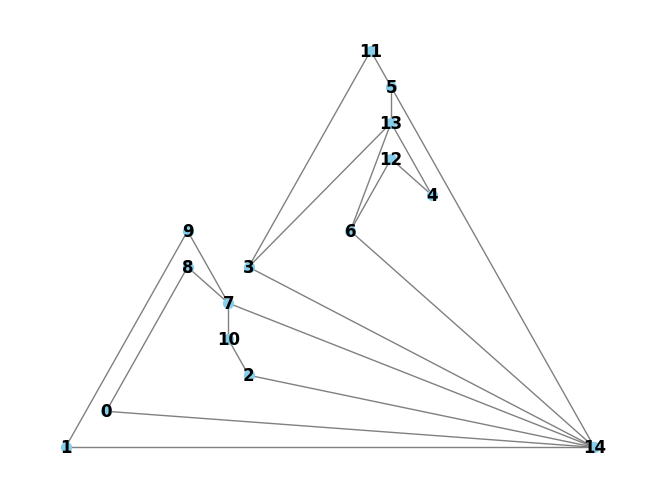

In [70]:

code = planar_codes[0]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


aut_group_generators : ['V1S7', 'V0S7', 'V3S6', 'V2S6', 'V4S5', 'H4H5^(4,5)', 'H1H7^(1,7)', 'H3H6^(3,6)', '(0,1)', '(2,3)']
aut_group_size       : 2304
code_type            : StabSubSystemCode
d                    : 3
index                : 631
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z7', 'X1Z7', 'X2Z6', 'X3Z6', 'X4Z5', 'Z0Z1Z4Y5Y7', 'Z2Z3Z4X5X6Z7']
k                    : 1
logical_ops          : ['Z0Z1Z5X7', 'Z5Z6Z7']
n                    : 8
uuid                 : baa2ddde-c0d7-4913-88c4-f4c3241a2d9a
weight_enumerator    : [1, 0, 7, 0, 15, 8, 33, 56, 8]



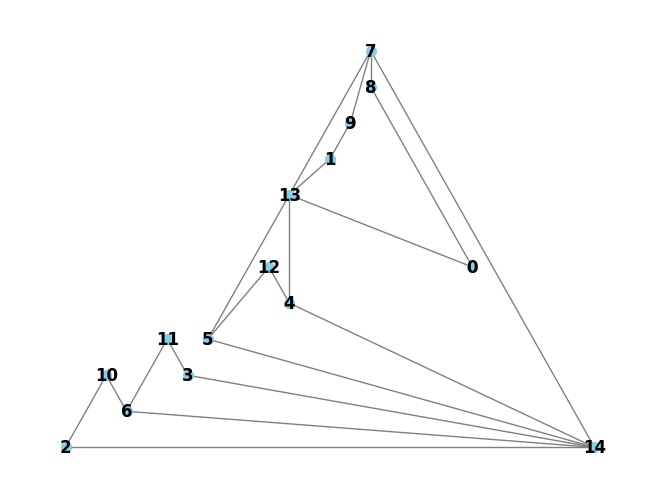

In [71]:
code = planar_codes[1]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


aut_group_generators : ['V0S4', 'V1S5', 'H1H5^(1,5)', 'V3S7', 'H3H7^(3,7)', 'V2S6', '(2,3)(6,7)', '(0,1)(4,5)', '(0,2)(1,3)(4,6)(5,7)']
aut_group_size       : 2048
code_type            : StabSubSystemCode
d                    : 3
index                : 1090
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z4', 'X1Z5', 'X2Z6', 'X3Z7', 'Z0Z1Y4Y5', 'Z2Z3Y6Y7', 'Z0Z2X4Z5X6Z7']
k                    : 1
logical_ops          : ['Z3Z6X7', 'Z4Z5Z6Z7']
n                    : 8
uuid                 : a3da7246-dc61-4d39-b2ff-4bb937216758
weight_enumerator    : [1, 0, 4, 0, 14, 0, 84, 0, 25]



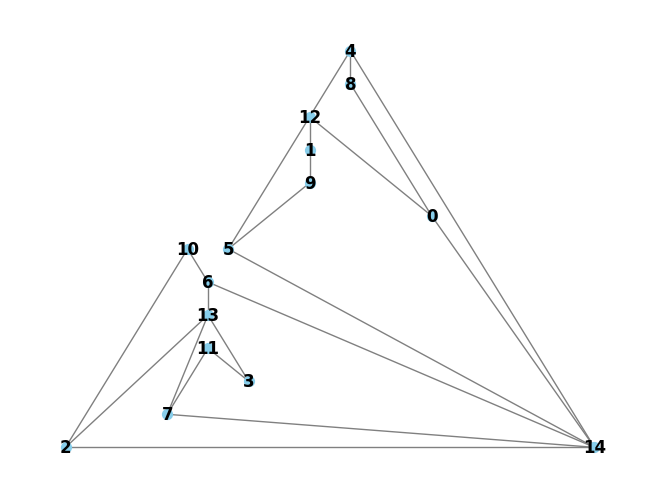

In [72]:
code = planar_codes[2]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


aut_group_generators : ['V0S6', 'V2S5', 'H2H5^(2,5)', 'V1S7', 'H1H7^(1,7)', 'V3V4', '(3,4)', 'H4H5^(0,1)(2,3)(4,5)(6,7)', 'r4S5R6S7^(0,3,1,2)(4,7,5,6)']
aut_group_size       : 1024
code_type            : StabSubSystemCode
d                    : 3
index                : 1094
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z6', 'X1Z7', 'X2Z5', 'X3X4', 'Z0Y3Z4Z5Y6', 'Z0Z2X5X6Z7', 'Z1Z3Z4Z6X7']
k                    : 1
logical_ops          : ['Z0Z3Z4X6Z7', 'Z3Z4Z5Z6']
n                    : 8
uuid                 : eebcc246-7e44-4e80-a401-8632fa112185
weight_enumerator    : [1, 0, 4, 0, 6, 32, 36, 32, 17]



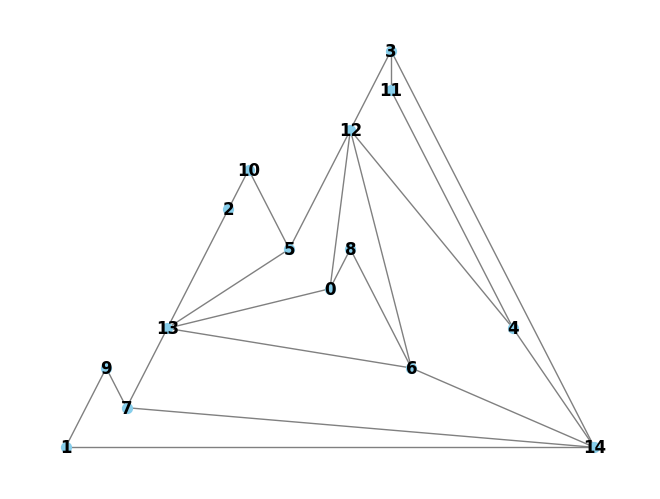

In [73]:
code = planar_codes[3]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


aut_group_generators : ['V3S7', 'H3H7^(3,7)', 'V2S6', 'H2H6^(2,6)', 'V1S5', 'H1H5^(1,5)', 'V0S4', '(0,1)(4,5)']
aut_group_size       : 512
code_type            : StabSubSystemCode
d                    : 3
index                : 346
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z4', 'X1Z5', 'X2Z6', 'X3Z7', 'Z3Z6X7', 'Z0Z1Y4Y5', 'Z0Z2X4Z5X6Z7']
k                    : 1
logical_ops          : ['Z2X6Z7', 'Z4Z5Z6']
n                    : 8
uuid                 : 5aada1a9-a0f1-4f4d-923a-974f71338e7f
weight_enumerator    : [1, 0, 4, 4, 10, 8, 44, 52, 5]



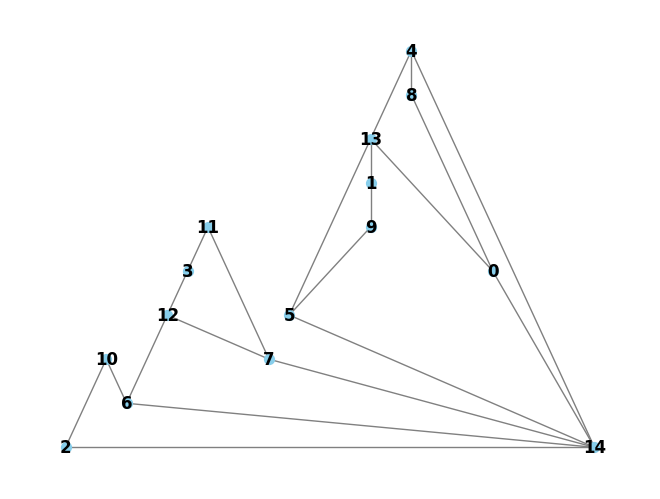

In [74]:
code = planar_codes[4]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


aut_group_generators : ['V1S7', 'H1H7^(1,7)', 'V0S7', '(0,1)', 'V3V4', '(3,4)', 'V2S5', 'H2H5^(2,5)']
aut_group_size       : 384
code_type            : StabSubSystemCode
d                    : 3
index                : 493
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z7', 'X1Z7', 'X2Z5', 'X3X4', 'Z2X5Z6Z7', 'Z3Z4Z5X6', 'Z0Z1X3Y6Y7']
k                    : 1
logical_ops          : ['Z0Z1Z3Z4Z5X7', 'Z3Z4Z7']
n                    : 8
uuid                 : 920cbad7-2530-4541-b9b7-be07bfd1303e
weight_enumerator    : [1, 0, 5, 0, 17, 8, 35, 56, 6]



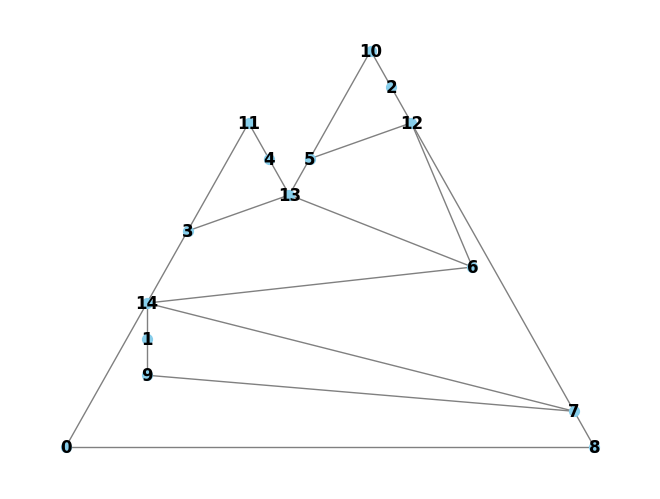

In [75]:
code = planar_codes[5]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


aut_group_generators : ['V2S6', 'H2H6^(2,6)', 'V1S6', '(1,2)', 'V0S7', 'H0H7^(0,7)', 'V3V4', '(3,4)']
aut_group_size       : 384
code_type            : StabSubSystemCode
d                    : 3
index                : 564
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z7', 'X1Z6', 'X2Z6', 'X3X4', 'Z3Z4X5', 'Z0X3Y5Y7', 'Z1Z2X3Z5X6Z7']
k                    : 1
logical_ops          : ['Z0Z3Z4X7', 'Z3Z4Z6Z7']
n                    : 8
uuid                 : b3d314a1-647e-47c0-9e8a-a3c835b99073
weight_enumerator    : [1, 0, 5, 2, 11, 12, 39, 50, 8]



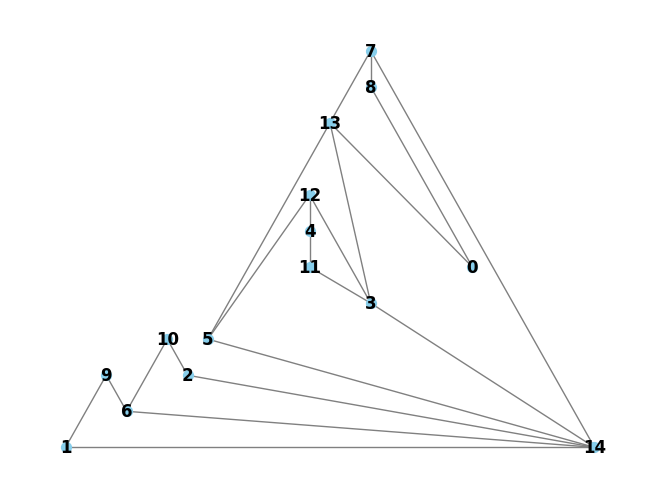

In [76]:
code = planar_codes[6]
print(code)
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


# Note:

The paper states that there are 22 indecomposable [[8,1,3]] codes with planar Tanner graphs. The above only finds 21. Is this a typo of somehthing changed.

## [[8,2,3]] Codes

In [1166]:
codes_823_indcom = cb.all_small_codes(8, 2, d=3, is_decomposable=False, info_only=True, list_only=True)
sorted_codes_823 = sorted(codes_823_indcom, key=lambda x: -x['aut_group_size'])
len(sorted_codes_823)

20

In [1167]:
for code in sorted_codes_823:
    print(f"[[8,2,3]] : {code['index']} : {code['aut_group_size']} : {code['is_degenerate']} : {is_planar(code)}")

[[8,2,3]] : 4947 : 1728 : 0 : False
[[8,2,3]] : 4948 : 48 : 0 : False
[[8,2,3]] : 4519 : 24 : 0 : False
[[8,2,3]] : 3745 : 16 : 0 : False
[[8,2,3]] : 3744 : 12 : 0 : False
[[8,2,3]] : 3310 : 6 : 0 : False
[[8,2,3]] : 4525 : 6 : 0 : False
[[8,2,3]] : 5277 : 4 : 1 : False
[[8,2,3]] : 4149 : 3 : 0 : False
[[8,2,3]] : 3710 : 2 : 0 : False
[[8,2,3]] : 3831 : 2 : 0 : False
[[8,2,3]] : 4091 : 2 : 0 : False
[[8,2,3]] : 4154 : 2 : 0 : False
[[8,2,3]] : 3354 : 1 : 0 : False
[[8,2,3]] : 3829 : 1 : 0 : False
[[8,2,3]] : 3952 : 1 : 0 : False
[[8,2,3]] : 3979 : 1 : 0 : False
[[8,2,3]] : 4337 : 1 : 0 : False
[[8,2,3]] : 4934 : 1 : 0 : False
[[8,2,3]] : 5834 : 1 : 0 : False


In [1211]:
for code in sorted_codes_823:
    aut = code['aut_group_size']
    gen = '$\\langle ' + ', '.join(latex_it(code['isotropic_generators'][:4], dollar=False)) + ',$'
    gen += ' $' + ', '.join(latex_it(code['isotropic_generators'][-4:], dollar=False)) + '\\rangle$'
    w = make_poly(code['weight_enumerator'])
    index = code['index']
    print(f"{index} & {aut} &  {gen} & ${w}$\\\ ")

4947 & 1728 &  $\langle Y_{0}Y_{1}Z_{4}Z_{7}, X_{2}X_{3}Z_{5}Z_{6}, Z_{2}Z_{3}Y_{5}Y_{6}, Z_{0}Z_{1}X_{4}X_{7},$ $Z_{2}Z_{3}Y_{5}Y_{6}, Z_{0}Z_{1}X_{4}X_{7}, Y_{0}Z_{1}Y_{2}Z_{3}Y_{4}Z_{6}, X_{0}Z_{1}X_{2}Z_{3}X_{5}Z_{7}\rangle$ & $1 + 6x^{4} + 48x^{6} + 9x^{8}$\\ 
4948 & 48 &  $\langle Y_{0}Z_{1}Y_{2}Z_{7}, Y_{3}Y_{4}Z_{5}Z_{6}, X_{1}X_{2}X_{4}X_{5}, Z_{0}Y_{1}Z_{4}Y_{6},$ $X_{1}X_{2}X_{4}X_{5}, Z_{0}Y_{1}Z_{4}Y_{6}, Z_{2}Z_{3}Y_{5}Y_{7}, X_{0}Z_{1}Z_{2}X_{3}Z_{4}Z_{5}\rangle$ & $1 + 6x^{4} + 48x^{6} + 9x^{8}$\\ 
4519 & 24 &  $\langle X_{1}X_{2}Z_{4}Z_{5}, Z_{1}Z_{2}X_{4}X_{5}, Y_{0}Y_{3}Z_{6}X_{7}, X_{0}X_{3}Z_{4}Z_{5}Z_{6},$ $Y_{0}Y_{3}Z_{6}X_{7}, X_{0}X_{3}Z_{4}Z_{5}Z_{6}, Y_{1}Z_{3}Y_{4}Z_{6}Z_{7}, Y_{0}Z_{2}Z_{3}X_{4}Y_{6}\rangle$ & $1 + 4x^{4} + 12x^{5} + 24x^{6} + 20x^{7} + 3x^{8}$\\ 
3745 & 16 &  $\langle X_{3}Z_{5}Z_{6}Z_{7}, Y_{0}Y_{1}Z_{2}X_{4}, X_{0}Z_{1}Z_{2}Z_{3}X_{5}, X_{2}Z_{3}Y_{4}Y_{5}Z_{6},$ $X_{0}Z_{1}Z_{2}Z_{3}X_{5}, X_{2}Z_{3}Y_{4}Y_{5}Z_{6}, X_{0}Z_{3}Z_{4}X_{6}

# n = 9 d=3 CSS

In [1282]:
codes_913 = cb.all_small_codes(9, 1, d=3, is_css=True,is_decomposable=False, info_only=True, list_only=True)

In [1283]:
sorted_codes = sorted(codes_913, key=lambda x: -x['aut_group_size'])

In [1284]:
len(sorted_codes)

19

In [1286]:
planar_codes_913 = []
for code in sorted_codes:
    if is_planar(code) is True:
        print(code)
        planar_codes_913 += [code]
        

aut_group_generators : ['S4S8', 'S3S8', 'S5S7', 'S2S7', 'S1S6', 'S0S6', '(1,6)', '(5,7)', '(4,8)', '(3,4)', '(2,3)(4,5)(7,8)', '(0,1)', '(0,2)(1,5)(6,7)']
aut_group_size       : 82944
code_type            : StabSubSystemCode
d                    : 3
index                : 8802
is_css               : 1
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['Z0Z6', 'Z1Z6', 'Z2Z7', 'Z3Z8', 'Z4Z8', 'Z5Z7', 'X0X1X2X5X6X7', 'X0X1X3X4X6X8']
k                    : 1
logical_ops          : ['X3X4X8', 'Z0Z2Z8']
n                    : 9
uuid                 : 120b6d9e-115c-40be-8c17-1d13ef32c190
weight_enumerator    : [1, 0, 9, 0, 27, 0, 75, 0, 144, 0]

aut_group_generators : ['S0S7', 'V3V6', '(3,6)', 'V2V6', '(2,3)', 'S4S5', '(4,5)', 'S1S8', '(1,4)(5,8)', '(0,1)(7,8)']
aut_group_size       : 9216
code_type            : StabSubSystemCode
d                    : 3
index                : 4280
is_css               : 1
is_decomposabl

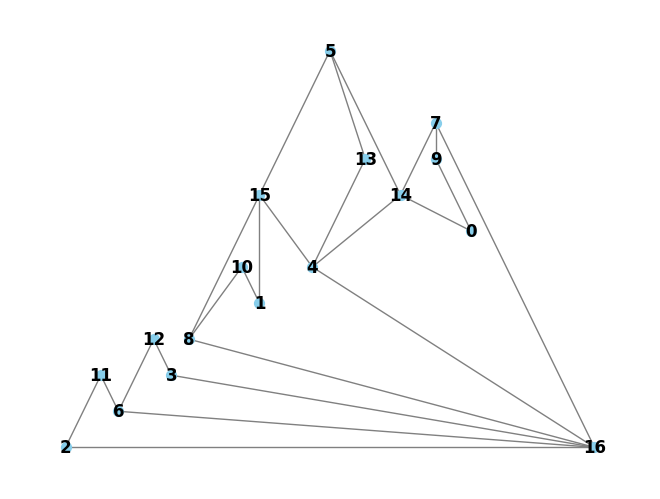

In [1291]:
code = planar_codes_913[1]
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


In [1281]:
code

{aut_group_generators : ['S0S7', 'V3V6', '(3,6)', 'V2V6', '(2,3)', 'S4S5', '(4,5)', 'S1S8', '(1,4)(5,8)', '(0,1)(7,8)'],
aut_group_size       : 9216,
code_type            : StabSubSystemCode,
d                    : 3,
index                : 4280,
is_css               : 1,
is_decomposable      : 0,
is_degenerate        : 1,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['Z0Z7', 'Z1Z8', 'X2X6', 'X3X6', 'Z4Z5', 'X0X4X5X7', 'X1X4X5X8', 'Z2Z3Z4Z6Z7Z8'],
k                    : 1,
logical_ops          : ['X4X5X6', 'Z2Z3Z6'],
n                    : 9,
uuid                 : c0cc3781-0de5-4a74-a039-7f509d1e02e4,
weight_enumerator    : [1, 0, 6, 0, 24, 0, 90, 0, 135, 0],
}

# [[9,1,3]] Codes Table - Table 11

In [12]:
for code in sorted_codes:
    aut = code['aut_group_size']
    gen = '$\\langle ' + ', '.join(latex_it(code['isotropic_generators'][:4], dollar=False)) + ',$'
    gen += ' $' + ', '.join(latex_it(code['isotropic_generators'][-4:], dollar=False)) + '\\rangle$'
    w = make_poly(code['weight_enumerator'])
    index = code['index']
    print(f"{index} & {aut} & ${w}$ & {gen} \\\ ")

8802 & 82944 & $1 + 9x^{2} + 27x^{4} + 75x^{6} + 144x^{8}$ & $\langle Z_{0}Z_{6}, Z_{1}Z_{6}, Z_{2}Z_{7}, Z_{3}Z_{8},$ $Z_{4}Z_{8}, Z_{5}Z_{7}, X_{0}X_{1}X_{2}X_{5}X_{6}X_{7}, X_{0}X_{1}X_{3}X_{4}X_{6}X_{8}\rangle$ \\ 
4280 & 9216 & $1 + 6x^{2} + 24x^{4} + 90x^{6} + 135x^{8}$ & $\langle Z_{0}Z_{7}, Z_{1}Z_{8}, X_{2}X_{6}, X_{3}X_{6},$ $Z_{4}Z_{5}, X_{0}X_{4}X_{5}X_{7}, X_{1}X_{4}X_{5}X_{8}, Z_{2}Z_{3}Z_{4}Z_{6}Z_{7}Z_{8}\rangle$ \\ 
4079 & 3072 & $1 + 6x^{2} + 24x^{4} + 90x^{6} + 135x^{8}$ & $\langle Z_{0}Z_{8}, X_{1}X_{7}, X_{2}X_{7}, X_{3}X_{5},$ $X_{4}X_{6}, Z_{3}Z_{4}Z_{5}Z_{6}, X_{0}X_{5}X_{6}X_{8}, Z_{1}Z_{2}Z_{3}Z_{5}Z_{7}Z_{8}\rangle$ \\ 
4395 & 1152 & $1 + 3x^{2} + 21x^{4} + 105x^{6} + 126x^{8}$ & $\langle Z_{0}Z_{8}, Z_{1}Z_{8}, Z_{2}Z_{3}Z_{6}Z_{7}, Z_{2}Z_{4}Z_{7}Z_{8},$ $Z_{5}Z_{6}Z_{7}Z_{8}, X_{2}X_{4}X_{5}X_{6}, X_{3}X_{4}X_{5}X_{7}, X_{0}X_{1}X_{2}X_{3}X_{5}X_{8}\rangle$ \\ 
8519 & 1024 & $1 + 4x^{2} + 22x^{4} + 100x^{6} + 129x^{8}$ & $\langle Z_{0}Z_{8}, X_{1}X_{7}, Z_

## [[9,2,3]] Codes

In [1287]:
codes_923 = cb.all_small_codes(9, 2, d=3, is_decomposable=False, info_only=True, list_only=True)

In [1288]:
sorted_codes_923 = sorted(codes_923, key=lambda x: -x['aut_group_size'])

In [1309]:
len(sorted_codes_923)

4425

In [1308]:

count = 0
planar_923 = []
for code in sorted_codes_923:
    if is_planar(code) is True:
        print(code)
        planar_923 += [code]
        count += 1
    

aut_group_generators : ['V1S6', 'H1H6^(1,6)', 'V2S7', 'H2H7^(2,7)', 'V3V4', '(3,4)', 'V0S8', 'H4H8^(0,3)(1,2)(4,8)(6,7)']
aut_group_size       : 512
code_type            : StabSubSystemCode
d                    : 3
index                : 53565
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z8', 'X1Z6', 'X2Z7', 'X3X4', 'Z0Y3Z4Z5Y8', 'Z2Z3Z4X5Z6X7', 'Z0Z1X5X6Z7X8']
k                    : 2
logical_ops          : ['Z2Z6X7', 'Z0Z3Z4X8', 'Z5Z6Z7', 'Z3Z4Z6Z8']
n                    : 9
uuid                 : f8f2d94a-8701-4e60-a42c-e88b9a37a2a1
weight_enumerator    : [1, 0, 4, 0, 6, 4, 20, 56, 33, 4]

aut_group_generators : ['V0S5', 'H0H5^(0,5)', 'V2S7', 'H2H7^(2,7)', 'V1S6', 'H1H6^(1,6)']
aut_group_size       : 64
code_type            : StabSubSystemCode
d                    : 3
index                : 3357
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4li

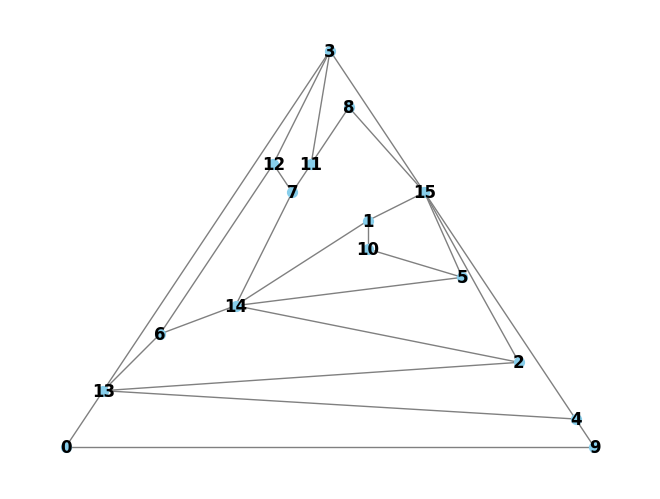

In [1307]:
code = planar_923[2]
G = nx.Graph()
G = make_tanner(code['isotropic_generators'], code['n'])
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)


In [1298]:
code

{aut_group_generators : ['V0S5', 'H0H5^(0,5)', 'V2S7', 'H2H7^(2,7)', 'V1S6', 'H1H6^(1,6)'],
aut_group_size       : 64,
code_type            : StabSubSystemCode,
d                    : 3,
index                : 3357,
is_css               : 0,
is_decomposable      : 0,
is_degenerate        : 1,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['X0Z5', 'X1Z6', 'X2Z7', 'Z1Y3Y6Z8', 'Z3Z4Z5X8', 'Z2X3Y4Z6Y7', 'Z0Z2Z4X5X7Z8'],
k                    : 2,
logical_ops          : ['Z2Z4X7', 'Z1Z3X6', 'Z4Z5Z7', 'Z3Z4Z6'],
n                    : 9,
uuid                 : 1c30ea16-50ec-40cf-aa4b-9e987c693470,
weight_enumerator    : [1, 0, 3, 0, 7, 4, 21, 56, 32, 4],
}

In [1314]:

for code in sorted_codes_923:
    if code['aut_group_size'] >= 512:
        print(code)

    

aut_group_generators : ['V2S7', 'H2H7^(2,7)', 'V1S7', '(1,2)', 'V0S8', 'H0H8^(0,8)', 'R3r5R6^(4,6,5)', '(3,4)(5,6)']
aut_group_size       : 1152
code_type            : StabSubSystemCode
d                    : 3
index                : 15551
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z8', 'X1Z7', 'X2Z7', 'X3X4Z5Z6', 'Z3Z4Y5Y6', 'Z0Z4X5Z6X8', 'Z1Z2Y3Y5Z6X7Z8']
k                    : 2
logical_ops          : ['Z1Z2X7', 'Z0Z3Z4X8', 'Z3Z4Z7', 'Z3Z4Z5Z6Z8']
n                    : 9
uuid                 : 3f463c93-83a8-462b-9e90-1cf4cdea9df7
weight_enumerator    : [1, 0, 4, 0, 6, 8, 12, 56, 41, 0]

aut_group_generators : ['V2H3S6H7S8^(3,7)', 'V0H1V2H3S4H5S6H7^(1,5)(3,7)', 'R2r6R7^(3,7,6)', '(2,3)(6,7)', 'H0H1V2H3V4V5S6H7^(3,7)(4,5)', '(0,1)(4,5)', '(0,2)(1,3)(4,6)(5,7)']
aut_group_size       : 1152
code_type            : StabSubSystemCode
d                    : 3
index                : 

In [1316]:
for code in sorted_codes_923:
    if code['is_css'] == 1:
        print(code)

In [1317]:
len(sorted_codes_923)

4425

# d = 2

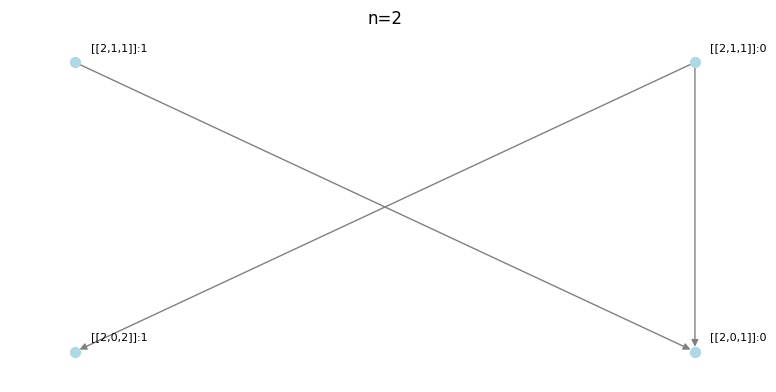

In [148]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (2, 0, 1, 0))
add_attribute(node_attributes, (2, 0, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (2, 1, 1, 0))
add_edge_to_graph(G, (2, 1, 1, 0), (2, 0, 1, 0) )
add_attribute(node_attributes, (2, 1, 1, 0), 'is_decomposable', 0)
add_node_to_graph(G, (2, 1, 1, 1))
add_edge_to_graph(G, (2, 1, 1, 1), (2, 0, 1, 0) )
add_attribute(node_attributes, (2, 1, 1, 1), 'is_decomposable', 1)

add_node_to_graph(G, (2, 0, 2, 1))
add_attribute(node_attributes, (2, 0, 2, 1), 'is_decomposable', 0)
add_node_to_graph(G, (2, 1, 1, 0))
add_edge_to_graph(G, (2, 1, 1, 0), (2, 0, 2, 1) )
add_attribute(node_attributes, (2, 1, 1, 0), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x + 0.05, y+0.1, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=2')
plt.axis('off')
plt.show()

# n = 2 indecomposable

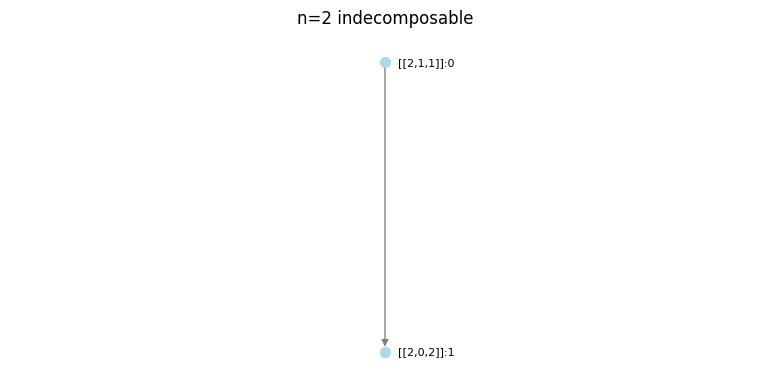

In [172]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (2, 0, 2, 1))
add_attribute(node_attributes, (2, 0, 2, 1), 'is_decomposable', 0)
add_node_to_graph(G, (2, 1, 1, 0))
add_edge_to_graph(G, (2, 1, 1, 0), (2, 0, 2, 1) )
add_attribute(node_attributes, (2, 1, 1, 0), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=8, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.0001, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=2 indecomposable')
plt.axis('off')
plt.show()

# n=3

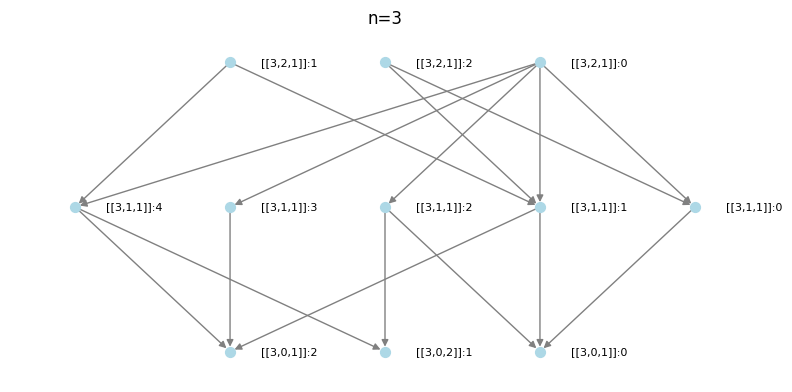

In [175]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (3, 1, 1, 0))
add_attribute(node_attributes, (3, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (3, 2, 1, 0))
add_edge_to_graph(G, (3, 2, 1, 0), (3, 1, 1, 0) )
add_attribute(node_attributes, (3, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (3, 2, 1, 2))
add_edge_to_graph(G, (3, 2, 1, 2), (3, 1, 1, 0) )
add_attribute(node_attributes, (3, 2, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (3, 1, 1, 1))
add_attribute(node_attributes, (3, 1, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (3, 2, 1, 0))
add_edge_to_graph(G, (3, 2, 1, 0), (3, 1, 1, 1) )
add_attribute(node_attributes, (3, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (3, 2, 1, 1))
add_edge_to_graph(G, (3, 2, 1, 1), (3, 1, 1, 1) )
add_attribute(node_attributes, (3, 2, 1, 1), 'is_decomposable', 0)
add_node_to_graph(G, (3, 2, 1, 2))
add_edge_to_graph(G, (3, 2, 1, 2), (3, 1, 1, 1) )
add_attribute(node_attributes, (3, 2, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (3, 1, 1, 2))
add_attribute(node_attributes, (3, 1, 1, 2), 'is_decomposable', 0)
add_node_to_graph(G, (3, 2, 1, 0))
add_edge_to_graph(G, (3, 2, 1, 0), (3, 1, 1, 2) )
add_attribute(node_attributes, (3, 2, 1, 0), 'is_decomposable', 1)

add_node_to_graph(G, (3, 1, 1, 3))
add_attribute(node_attributes, (3, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (3, 2, 1, 0))
add_edge_to_graph(G, (3, 2, 1, 0), (3, 1, 1, 3) )
add_attribute(node_attributes, (3, 2, 1, 0), 'is_decomposable', 1)

add_node_to_graph(G, (3, 1, 1, 4))
add_attribute(node_attributes, (3, 1, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (3, 2, 1, 0))
add_edge_to_graph(G, (3, 2, 1, 0), (3, 1, 1, 4) )
add_attribute(node_attributes, (3, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (3, 2, 1, 1))
add_edge_to_graph(G, (3, 2, 1, 1), (3, 1, 1, 4) )
add_attribute(node_attributes, (3, 2, 1, 1), 'is_decomposable', 0)

add_node_to_graph(G, (3, 0, 1, 0))
add_attribute(node_attributes, (3, 0, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (3, 1, 1, 0))
add_edge_to_graph(G, (3, 1, 1, 0), (3, 0, 1, 0) )
add_attribute(node_attributes, (3, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (3, 1, 1, 1))
add_edge_to_graph(G, (3, 1, 1, 1), (3, 0, 1, 0) )
add_attribute(node_attributes, (3, 1, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (3, 1, 1, 2))
add_edge_to_graph(G, (3, 1, 1, 2), (3, 0, 1, 0) )
add_attribute(node_attributes, (3, 1, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (3, 0, 2, 1))
add_attribute(node_attributes, (3, 0, 2, 1), 'is_decomposable', 0)
add_node_to_graph(G, (3, 1, 1, 2))
add_edge_to_graph(G, (3, 1, 1, 2), (3, 0, 2, 1) )
add_attribute(node_attributes, (3, 1, 1, 2), 'is_decomposable', 0)
add_node_to_graph(G, (3, 1, 1, 4))
add_edge_to_graph(G, (3, 1, 1, 4), (3, 0, 2, 1) )
add_attribute(node_attributes, (3, 1, 1, 4), 'is_decomposable', 0)

add_node_to_graph(G, (3, 0, 1, 2))
add_attribute(node_attributes, (3, 0, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (3, 1, 1, 1))
add_edge_to_graph(G, (3, 1, 1, 1), (3, 0, 1, 2) )
add_attribute(node_attributes, (3, 1, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (3, 1, 1, 3))
add_edge_to_graph(G, (3, 1, 1, 3), (3, 0, 1, 2) )
add_attribute(node_attributes, (3, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (3, 1, 1, 4))
add_edge_to_graph(G, (3, 1, 1, 4), (3, 0, 1, 2) )
add_attribute(node_attributes, (3, 1, 1, 4), 'is_decomposable', 0)


# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=8, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.1, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=3')
plt.axis('off')
plt.show()

# n=3 indecomposable

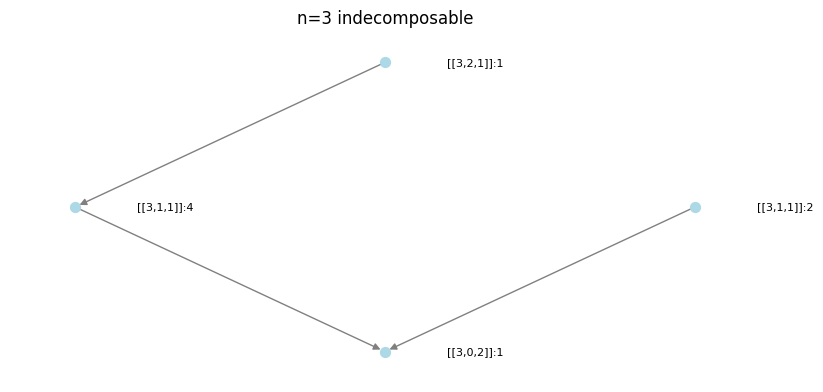

In [176]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (3, 0, 2, 1))
add_attribute(node_attributes, (3, 0, 2, 1), 'is_decomposable', 0)
add_node_to_graph(G, (3, 1, 1, 2))
add_edge_to_graph(G, (3, 1, 1, 2), (3, 0, 2, 1) )
add_attribute(node_attributes, (3, 1, 1, 2), 'is_decomposable', 0)
add_node_to_graph(G, (3, 1, 1, 4))
add_edge_to_graph(G, (3, 1, 1, 4), (3, 0, 2, 1) )
add_attribute(node_attributes, (3, 1, 1, 4), 'is_decomposable', 0)

add_node_to_graph(G, (3, 1, 1, 4))
add_attribute(node_attributes, (3, 1, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (3, 2, 1, 1))
add_edge_to_graph(G, (3, 2, 1, 1), (3, 1, 1, 4) )
add_attribute(node_attributes, (3, 2, 1, 1), 'is_decomposable', 0)


# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=8, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.1, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=3 indecomposable')
plt.axis('off')
plt.show()

# n=4 

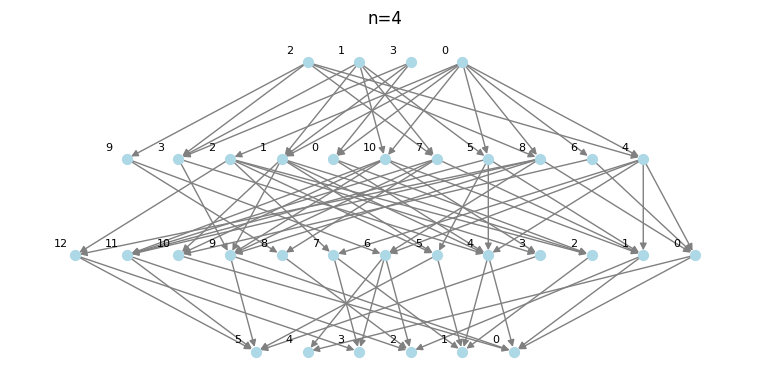

In [177]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'{idd[3]}'

add_node_to_graph(G, (4, 1, 1, 0))
add_attribute(node_attributes, (4, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 4))
add_edge_to_graph(G, (4, 2, 1, 4), (4, 1, 1, 0) )
add_attribute(node_attributes, (4, 2, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 6))
add_edge_to_graph(G, (4, 2, 1, 6), (4, 1, 1, 0) )
add_attribute(node_attributes, (4, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 1, 0) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 1))
add_attribute(node_attributes, (4, 1, 1, 1), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 4))
add_edge_to_graph(G, (4, 2, 1, 4), (4, 1, 1, 1) )
add_attribute(node_attributes, (4, 2, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 5))
add_edge_to_graph(G, (4, 2, 1, 5), (4, 1, 1, 1) )
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 1, 1) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 10))
add_edge_to_graph(G, (4, 2, 1, 10), (4, 1, 1, 1) )
add_attribute(node_attributes, (4, 2, 1, 10), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 1, 2))
add_attribute(node_attributes, (4, 1, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 0))
add_edge_to_graph(G, (4, 2, 1, 0), (4, 1, 1, 2) )
add_attribute(node_attributes, (4, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 1))
add_edge_to_graph(G, (4, 2, 1, 1), (4, 1, 1, 2) )
add_attribute(node_attributes, (4, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 2))
add_edge_to_graph(G, (4, 2, 1, 2), (4, 1, 1, 2) )
add_attribute(node_attributes, (4, 2, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 1, 3))
add_attribute(node_attributes, (4, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 2))
add_edge_to_graph(G, (4, 2, 1, 2), (4, 1, 1, 3) )
add_attribute(node_attributes, (4, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 10))
add_edge_to_graph(G, (4, 2, 1, 10), (4, 1, 1, 3) )
add_attribute(node_attributes, (4, 2, 1, 10), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 1, 4))
add_attribute(node_attributes, (4, 1, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 0))
add_edge_to_graph(G, (4, 2, 1, 0), (4, 1, 1, 4) )
add_attribute(node_attributes, (4, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 1))
add_edge_to_graph(G, (4, 2, 1, 1), (4, 1, 1, 4) )
add_attribute(node_attributes, (4, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 3))
add_edge_to_graph(G, (4, 2, 1, 3), (4, 1, 1, 4) )
add_attribute(node_attributes, (4, 2, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 4))
add_edge_to_graph(G, (4, 2, 1, 4), (4, 1, 1, 4) )
add_attribute(node_attributes, (4, 2, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 5))
add_edge_to_graph(G, (4, 2, 1, 5), (4, 1, 1, 4) )
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 5))
add_attribute(node_attributes, (4, 1, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 1))
add_edge_to_graph(G, (4, 2, 1, 1), (4, 1, 1, 5) )
add_attribute(node_attributes, (4, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 2))
add_edge_to_graph(G, (4, 2, 1, 2), (4, 1, 1, 5) )
add_attribute(node_attributes, (4, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 5))
add_edge_to_graph(G, (4, 2, 1, 5), (4, 1, 1, 5) )
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 2, 6))
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 4))
add_edge_to_graph(G, (4, 2, 1, 4), (4, 1, 2, 6) )
add_attribute(node_attributes, (4, 2, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 2, 6) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 2, 9))
add_edge_to_graph(G, (4, 2, 2, 9), (4, 1, 2, 6) )
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 7))
add_attribute(node_attributes, (4, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 2))
add_edge_to_graph(G, (4, 2, 1, 2), (4, 1, 1, 7) )
add_attribute(node_attributes, (4, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 4))
add_edge_to_graph(G, (4, 2, 1, 4), (4, 1, 1, 7) )
add_attribute(node_attributes, (4, 2, 1, 4), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 2, 8))
add_attribute(node_attributes, (4, 1, 2, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 2, 8) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 2, 9))
add_edge_to_graph(G, (4, 2, 2, 9), (4, 1, 2, 8) )
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 9))
add_attribute(node_attributes, (4, 1, 1, 9), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 1))
add_edge_to_graph(G, (4, 2, 1, 1), (4, 1, 1, 9) )
add_attribute(node_attributes, (4, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 3))
add_edge_to_graph(G, (4, 2, 1, 3), (4, 1, 1, 9) )
add_attribute(node_attributes, (4, 2, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 1, 9) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 1, 9) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 10))
add_edge_to_graph(G, (4, 2, 1, 10), (4, 1, 1, 9) )
add_attribute(node_attributes, (4, 2, 1, 10), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 1, 10))
add_attribute(node_attributes, (4, 1, 1, 10), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 1))
add_edge_to_graph(G, (4, 2, 1, 1), (4, 1, 1, 10) )
add_attribute(node_attributes, (4, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 6))
add_edge_to_graph(G, (4, 2, 1, 6), (4, 1, 1, 10) )
add_attribute(node_attributes, (4, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 10))
add_edge_to_graph(G, (4, 2, 1, 10), (4, 1, 1, 10) )
add_attribute(node_attributes, (4, 2, 1, 10), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 1, 11))
add_attribute(node_attributes, (4, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 5))
add_edge_to_graph(G, (4, 2, 1, 5), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 10))
add_edge_to_graph(G, (4, 2, 1, 10), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 10), 'is_decomposable', 1)

add_node_to_graph(G, (4, 1, 1, 12))
add_attribute(node_attributes, (4, 1, 1, 12), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 2))
add_edge_to_graph(G, (4, 2, 1, 2), (4, 1, 1, 12) )
add_attribute(node_attributes, (4, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 1, 12) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 1, 0))
add_attribute(node_attributes, (4, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 0) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 3))
add_edge_to_graph(G, (4, 3, 1, 3), (4, 2, 1, 0) )
add_attribute(node_attributes, (4, 3, 1, 3), 'is_decomposable', 1)

add_node_to_graph(G, (4, 2, 1, 1))
add_attribute(node_attributes, (4, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 1) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 1))
add_edge_to_graph(G, (4, 3, 1, 1), (4, 2, 1, 1) )
add_attribute(node_attributes, (4, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 3))
add_edge_to_graph(G, (4, 3, 1, 3), (4, 2, 1, 1) )
add_attribute(node_attributes, (4, 3, 1, 3), 'is_decomposable', 1)

add_node_to_graph(G, (4, 2, 1, 2))
add_attribute(node_attributes, (4, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 2) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)

add_node_to_graph(G, (4, 2, 1, 3))
add_attribute(node_attributes, (4, 2, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 1))
add_edge_to_graph(G, (4, 3, 1, 1), (4, 2, 1, 3) )
add_attribute(node_attributes, (4, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 1, 3) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 3))
add_edge_to_graph(G, (4, 3, 1, 3), (4, 2, 1, 3) )
add_attribute(node_attributes, (4, 3, 1, 3), 'is_decomposable', 1)

add_node_to_graph(G, (4, 2, 1, 4))
add_attribute(node_attributes, (4, 2, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 4) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 1, 4) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 1, 5))
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 5) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 1))
add_edge_to_graph(G, (4, 3, 1, 1), (4, 2, 1, 5) )
add_attribute(node_attributes, (4, 3, 1, 1), 'is_decomposable', 1)

add_node_to_graph(G, (4, 2, 1, 6))
add_attribute(node_attributes, (4, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 6) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)

add_node_to_graph(G, (4, 2, 1, 7))
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 1))
add_edge_to_graph(G, (4, 3, 1, 1), (4, 2, 1, 7) )
add_attribute(node_attributes, (4, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 1, 7) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 1, 8))
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 8) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 1, 8) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 2, 9))
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 2, 9) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 1, 10))
add_attribute(node_attributes, (4, 2, 1, 10), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 0))
add_edge_to_graph(G, (4, 3, 1, 0), (4, 2, 1, 10) )
add_attribute(node_attributes, (4, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 3, 1, 1))
add_edge_to_graph(G, (4, 3, 1, 1), (4, 2, 1, 10) )
add_attribute(node_attributes, (4, 3, 1, 1), 'is_decomposable', 1)

add_node_to_graph(G, (4, 0, 1, 0))
add_attribute(node_attributes, (4, 0, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 0))
add_edge_to_graph(G, (4, 1, 1, 0), (4, 0, 1, 0) )
add_attribute(node_attributes, (4, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 1))
add_edge_to_graph(G, (4, 1, 1, 1), (4, 0, 1, 0) )
add_attribute(node_attributes, (4, 1, 1, 1), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 4))
add_edge_to_graph(G, (4, 1, 1, 4), (4, 0, 1, 0) )
add_attribute(node_attributes, (4, 1, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 9))
add_edge_to_graph(G, (4, 1, 1, 9), (4, 0, 1, 0) )
add_attribute(node_attributes, (4, 1, 1, 9), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 10))
add_edge_to_graph(G, (4, 1, 1, 10), (4, 0, 1, 0) )
add_attribute(node_attributes, (4, 1, 1, 10), 'is_decomposable', 1)

add_node_to_graph(G, (4, 0, 1, 1))
add_attribute(node_attributes, (4, 0, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 2))
add_edge_to_graph(G, (4, 1, 1, 2), (4, 0, 1, 1) )
add_attribute(node_attributes, (4, 1, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 4))
add_edge_to_graph(G, (4, 1, 1, 4), (4, 0, 1, 1) )
add_attribute(node_attributes, (4, 1, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 5))
add_edge_to_graph(G, (4, 1, 1, 5), (4, 0, 1, 1) )
add_attribute(node_attributes, (4, 1, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 7))
add_edge_to_graph(G, (4, 1, 1, 7), (4, 0, 1, 1) )
add_attribute(node_attributes, (4, 1, 1, 7), 'is_decomposable', 0)

add_node_to_graph(G, (4, 0, 2, 2))
add_attribute(node_attributes, (4, 0, 2, 2), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 1))
add_edge_to_graph(G, (4, 1, 1, 1), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 1, 1), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 8))
add_edge_to_graph(G, (4, 1, 2, 8), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 2, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 11))
add_edge_to_graph(G, (4, 1, 1, 11), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 1, 11), 'is_decomposable', 0)

add_node_to_graph(G, (4, 0, 2, 3))
add_attribute(node_attributes, (4, 0, 2, 3), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 7))
add_edge_to_graph(G, (4, 1, 1, 7), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 12))
add_edge_to_graph(G, (4, 1, 1, 12), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 1, 12), 'is_decomposable', 0)

add_node_to_graph(G, (4, 0, 2, 4))
add_attribute(node_attributes, (4, 0, 2, 4), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 0))
add_edge_to_graph(G, (4, 1, 1, 0), (4, 0, 2, 4) )
add_attribute(node_attributes, (4, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 4) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)

add_node_to_graph(G, (4, 0, 1, 5))
add_attribute(node_attributes, (4, 0, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 3))
add_edge_to_graph(G, (4, 1, 1, 3), (4, 0, 1, 5) )
add_attribute(node_attributes, (4, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 5))
add_edge_to_graph(G, (4, 1, 1, 5), (4, 0, 1, 5) )
add_attribute(node_attributes, (4, 1, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 9))
add_edge_to_graph(G, (4, 1, 1, 9), (4, 0, 1, 5) )
add_attribute(node_attributes, (4, 1, 1, 9), 'is_decomposable', 1)
add_node_to_graph(G, (4, 1, 1, 11))
add_edge_to_graph(G, (4, 1, 1, 11), (4, 0, 1, 5) )
add_attribute(node_attributes, (4, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 12))
add_edge_to_graph(G, (4, 1, 1, 12), (4, 0, 1, 5) )
add_attribute(node_attributes, (4, 1, 1, 12), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x - 0.07, y + 0.02, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=4')
plt.axis('off')
plt.show()

# Indecomposable n=4

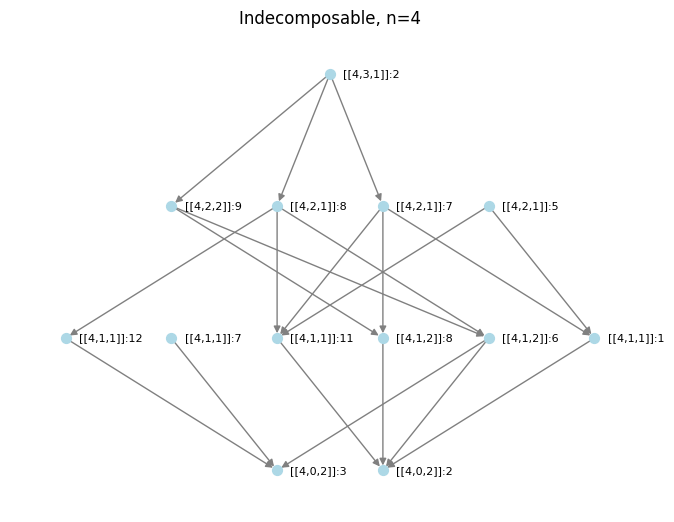

In [875]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (4, 0, 2, 2))
add_attribute(node_attributes, (4, 0, 2, 2), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 1))
add_edge_to_graph(G, (4, 1, 1, 1), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 1, 1), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 8))
add_edge_to_graph(G, (4, 1, 2, 8), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 2, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 11))
add_edge_to_graph(G, (4, 1, 1, 11), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 1, 11), 'is_decomposable', 0)

add_node_to_graph(G, (4, 0, 2, 3))
add_attribute(node_attributes, (4, 0, 2, 3), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 7))
add_edge_to_graph(G, (4, 1, 1, 7), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 1, 12))
add_edge_to_graph(G, (4, 1, 1, 12), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 1, 12), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 1))
add_attribute(node_attributes, (4, 1, 1, 1), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 5))
add_edge_to_graph(G, (4, 2, 1, 5), (4, 1, 1, 1) )
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 1, 1) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 2, 6))
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 2, 6) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 2, 9))
add_edge_to_graph(G, (4, 2, 2, 9), (4, 1, 2, 6) )
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)


add_node_to_graph(G, (4, 1, 2, 8))
add_attribute(node_attributes, (4, 1, 2, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 2, 8) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 2, 9))
add_edge_to_graph(G, (4, 2, 2, 9), (4, 1, 2, 8) )
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 11))
add_attribute(node_attributes, (4, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 5))
add_edge_to_graph(G, (4, 2, 1, 5), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 5), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 7))
add_edge_to_graph(G, (4, 2, 1, 7), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 1, 11) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 1, 12))
add_attribute(node_attributes, (4, 1, 1, 12), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 1, 8))
add_edge_to_graph(G, (4, 2, 1, 8), (4, 1, 1, 12) )
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 1, 7))
add_attribute(node_attributes, (4, 2, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 1, 7) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 1, 8))
add_attribute(node_attributes, (4, 2, 1, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 1, 8) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

add_node_to_graph(G, (4, 2, 2, 9))
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (4, 3, 1, 2))
add_edge_to_graph(G, (4, 3, 1, 2), (4, 2, 2, 9) )
add_attribute(node_attributes, (4, 3, 1, 2), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.05, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('Indecomposable, n=4')
plt.axis('off')
plt.show()


In [876]:
plt.savefig('pccode4ind.png')

<Figure size 640x480 with 0 Axes>

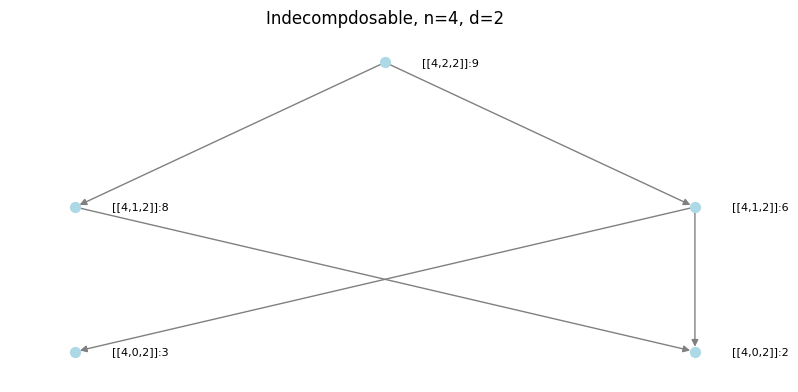

In [180]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (4, 0, 2, 2))
add_attribute(node_attributes, (4, 0, 2, 2), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 8))
add_edge_to_graph(G, (4, 1, 2, 8), (4, 0, 2, 2) )
add_attribute(node_attributes, (4, 1, 2, 8), 'is_decomposable', 0)

add_node_to_graph(G, (4, 0, 2, 3))
add_attribute(node_attributes, (4, 0, 2, 3), 'is_decomposable', 0)
add_node_to_graph(G, (4, 1, 2, 6))
add_edge_to_graph(G, (4, 1, 2, 6), (4, 0, 2, 3) )
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 2, 6))
add_attribute(node_attributes, (4, 1, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 2, 9))
add_edge_to_graph(G, (4, 2, 2, 9), (4, 1, 2, 6) )
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)

add_node_to_graph(G, (4, 1, 2, 8))
add_attribute(node_attributes, (4, 1, 2, 8), 'is_decomposable', 0)
add_node_to_graph(G, (4, 2, 2, 9))
add_edge_to_graph(G, (4, 2, 2, 9), (4, 1, 2, 8) )
add_attribute(node_attributes, (4, 2, 2, 9), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.05, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('Indecompdosable, n=4, d=2')
plt.axis('off')
plt.show()


# n=5

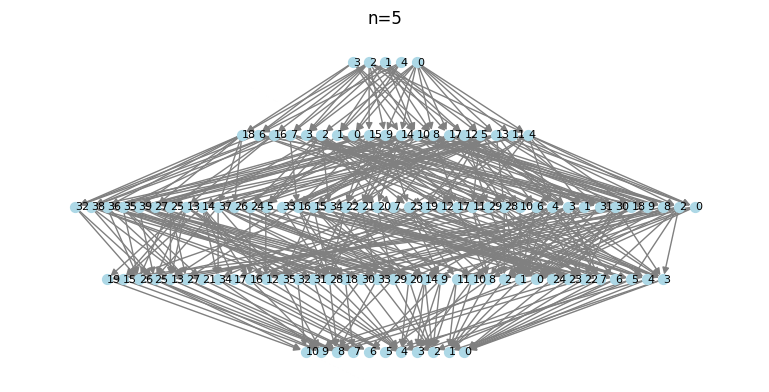

In [186]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'{idd[3]}'

add_node_to_graph(G, (5, 0, 1, 0))
add_attribute(node_attributes, (5, 0, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 3))
add_edge_to_graph(G, (5, 1, 1, 3), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 4))
add_edge_to_graph(G, (5, 1, 1, 4), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 5))
add_edge_to_graph(G, (5, 1, 1, 5), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 6))
add_edge_to_graph(G, (5, 1, 1, 6), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 7))
add_edge_to_graph(G, (5, 1, 1, 7), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 22))
add_edge_to_graph(G, (5, 1, 1, 22), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 22), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 23))
add_edge_to_graph(G, (5, 1, 1, 23), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 24))
add_edge_to_graph(G, (5, 1, 1, 24), (5, 0, 1, 0) )
add_attribute(node_attributes, (5, 1, 1, 24), 'is_decomposable', 1)

add_node_to_graph(G, (5, 0, 1, 1))
add_attribute(node_attributes, (5, 0, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 0))
add_edge_to_graph(G, (5, 1, 1, 0), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 1))
add_edge_to_graph(G, (5, 1, 1, 1), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 2))
add_edge_to_graph(G, (5, 1, 1, 2), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 3))
add_edge_to_graph(G, (5, 1, 1, 3), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 8))
add_edge_to_graph(G, (5, 1, 1, 8), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 10))
add_edge_to_graph(G, (5, 1, 1, 10), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 10), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 11))
add_edge_to_graph(G, (5, 1, 1, 11), (5, 0, 1, 1) )
add_attribute(node_attributes, (5, 1, 1, 11), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 2))
add_attribute(node_attributes, (5, 0, 2, 2), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 6))
add_edge_to_graph(G, (5, 1, 1, 6), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 11))
add_edge_to_graph(G, (5, 1, 1, 11), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 20))
add_edge_to_graph(G, (5, 1, 2, 20), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 29))
add_edge_to_graph(G, (5, 1, 1, 29), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 29), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 33))
add_edge_to_graph(G, (5, 1, 1, 33), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 33), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 3))
add_attribute(node_attributes, (5, 0, 2, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 5))
add_edge_to_graph(G, (5, 1, 1, 5), (5, 0, 2, 3) )
add_attribute(node_attributes, (5, 1, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 3) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 10))
add_edge_to_graph(G, (5, 1, 1, 10), (5, 0, 2, 3) )
add_attribute(node_attributes, (5, 1, 1, 10), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 3) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 30))
add_edge_to_graph(G, (5, 1, 1, 30), (5, 0, 2, 3) )
add_attribute(node_attributes, (5, 1, 1, 30), 'is_decomposable', 1)

add_node_to_graph(G, (5, 0, 2, 4))
add_attribute(node_attributes, (5, 0, 2, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 7))
add_edge_to_graph(G, (5, 1, 1, 7), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 18))
add_edge_to_graph(G, (5, 1, 2, 18), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 20))
add_edge_to_graph(G, (5, 1, 2, 20), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 28))
add_edge_to_graph(G, (5, 1, 1, 28), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 28), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 31))
add_edge_to_graph(G, (5, 1, 1, 31), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 31), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 32))
add_edge_to_graph(G, (5, 1, 1, 32), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 32), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 35))
add_edge_to_graph(G, (5, 1, 1, 35), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 1, 5))
add_attribute(node_attributes, (5, 0, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 4))
add_edge_to_graph(G, (5, 1, 1, 4), (5, 0, 1, 5) )
add_attribute(node_attributes, (5, 1, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 8))
add_edge_to_graph(G, (5, 1, 1, 8), (5, 0, 1, 5) )
add_attribute(node_attributes, (5, 1, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 12))
add_edge_to_graph(G, (5, 1, 1, 12), (5, 0, 1, 5) )
add_attribute(node_attributes, (5, 1, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 16))
add_edge_to_graph(G, (5, 1, 1, 16), (5, 0, 1, 5) )
add_attribute(node_attributes, (5, 1, 1, 16), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 17))
add_edge_to_graph(G, (5, 1, 1, 17), (5, 0, 1, 5) )
add_attribute(node_attributes, (5, 1, 1, 17), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 6))
add_attribute(node_attributes, (5, 0, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 17))
add_edge_to_graph(G, (5, 1, 1, 17), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 1, 17), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 34))
add_edge_to_graph(G, (5, 1, 1, 34), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 1, 34), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 3, 7))
add_attribute(node_attributes, (5, 0, 3, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 18))
add_edge_to_graph(G, (5, 1, 2, 18), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 3, 21))
add_edge_to_graph(G, (5, 1, 3, 21), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 3, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 27))
add_edge_to_graph(G, (5, 1, 1, 27), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 1, 27), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 1, 8))
add_attribute(node_attributes, (5, 0, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 1))
add_edge_to_graph(G, (5, 1, 1, 1), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 13))
add_edge_to_graph(G, (5, 1, 1, 13), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 22))
add_edge_to_graph(G, (5, 1, 1, 22), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 22), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 2, 25))
add_edge_to_graph(G, (5, 1, 2, 25), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 2, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 2, 26))
add_edge_to_graph(G, (5, 1, 2, 26), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 2, 26), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 27))
add_edge_to_graph(G, (5, 1, 1, 27), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 28))
add_edge_to_graph(G, (5, 1, 1, 28), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 28), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 31))
add_edge_to_graph(G, (5, 1, 1, 31), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 31), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 33))
add_edge_to_graph(G, (5, 1, 1, 33), (5, 0, 1, 8) )
add_attribute(node_attributes, (5, 1, 1, 33), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 1, 9))
add_attribute(node_attributes, (5, 0, 1, 9), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 15))
add_edge_to_graph(G, (5, 1, 1, 15), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 1, 15), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 16))
add_edge_to_graph(G, (5, 1, 1, 16), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 1, 16), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 23))
add_edge_to_graph(G, (5, 1, 1, 23), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 2, 25))
add_edge_to_graph(G, (5, 1, 2, 25), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 2, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 29))
add_edge_to_graph(G, (5, 1, 1, 29), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 1, 29), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 34))
add_edge_to_graph(G, (5, 1, 1, 34), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 1, 34), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 35))
add_edge_to_graph(G, (5, 1, 1, 35), (5, 0, 1, 9) )
add_attribute(node_attributes, (5, 1, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 1, 10))
add_attribute(node_attributes, (5, 0, 1, 10), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 0))
add_edge_to_graph(G, (5, 1, 1, 0), (5, 0, 1, 10) )
add_attribute(node_attributes, (5, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 19))
add_edge_to_graph(G, (5, 1, 1, 19), (5, 0, 1, 10) )
add_attribute(node_attributes, (5, 1, 1, 19), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 2, 25))
add_edge_to_graph(G, (5, 1, 2, 25), (5, 0, 1, 10) )
add_attribute(node_attributes, (5, 1, 2, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 30))
add_edge_to_graph(G, (5, 1, 1, 30), (5, 0, 1, 10) )
add_attribute(node_attributes, (5, 1, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 1, 1, 32))
add_edge_to_graph(G, (5, 1, 1, 32), (5, 0, 1, 10) )
add_attribute(node_attributes, (5, 1, 1, 32), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 0))
add_attribute(node_attributes, (5, 1, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 0))
add_edge_to_graph(G, (5, 2, 1, 0), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 8))
add_edge_to_graph(G, (5, 2, 1, 8), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 18))
add_edge_to_graph(G, (5, 2, 1, 18), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 18), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 30))
add_edge_to_graph(G, (5, 2, 1, 30), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 31))
add_edge_to_graph(G, (5, 2, 1, 31), (5, 1, 1, 0) )
add_attribute(node_attributes, (5, 2, 1, 31), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 1))
add_attribute(node_attributes, (5, 1, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 1))
add_edge_to_graph(G, (5, 2, 1, 1), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 6))
add_edge_to_graph(G, (5, 2, 1, 6), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 10))
add_edge_to_graph(G, (5, 2, 1, 10), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 18))
add_edge_to_graph(G, (5, 2, 1, 18), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 18), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 28))
add_edge_to_graph(G, (5, 2, 1, 28), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 28), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 29))
add_edge_to_graph(G, (5, 2, 1, 29), (5, 1, 1, 1) )
add_attribute(node_attributes, (5, 2, 1, 29), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 2))
add_attribute(node_attributes, (5, 1, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 0))
add_edge_to_graph(G, (5, 2, 1, 0), (5, 1, 1, 2) )
add_attribute(node_attributes, (5, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 1))
add_edge_to_graph(G, (5, 2, 1, 1), (5, 1, 1, 2) )
add_attribute(node_attributes, (5, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 11))
add_edge_to_graph(G, (5, 2, 1, 11), (5, 1, 1, 2) )
add_attribute(node_attributes, (5, 2, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 28))
add_edge_to_graph(G, (5, 2, 1, 28), (5, 1, 1, 2) )
add_attribute(node_attributes, (5, 2, 1, 28), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 31))
add_edge_to_graph(G, (5, 2, 1, 31), (5, 1, 1, 2) )
add_attribute(node_attributes, (5, 2, 1, 31), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 3))
add_attribute(node_attributes, (5, 1, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 11))
add_edge_to_graph(G, (5, 2, 1, 11), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 17))
add_edge_to_graph(G, (5, 2, 1, 17), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 17), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 28))
add_edge_to_graph(G, (5, 2, 1, 28), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 28), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 29))
add_edge_to_graph(G, (5, 2, 1, 29), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 29), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 30))
add_edge_to_graph(G, (5, 2, 1, 30), (5, 1, 1, 3) )
add_attribute(node_attributes, (5, 2, 1, 30), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 4))
add_attribute(node_attributes, (5, 1, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 6))
add_edge_to_graph(G, (5, 2, 1, 6), (5, 1, 1, 4) )
add_attribute(node_attributes, (5, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 11))
add_edge_to_graph(G, (5, 2, 1, 11), (5, 1, 1, 4) )
add_attribute(node_attributes, (5, 2, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 12))
add_edge_to_graph(G, (5, 2, 1, 12), (5, 1, 1, 4) )
add_attribute(node_attributes, (5, 2, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 4) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 4) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 5))
add_attribute(node_attributes, (5, 1, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 5) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 7))
add_edge_to_graph(G, (5, 2, 1, 7), (5, 1, 1, 5) )
add_attribute(node_attributes, (5, 2, 1, 7), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 5) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 5) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 5) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 6))
add_attribute(node_attributes, (5, 1, 1, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 34))
add_edge_to_graph(G, (5, 2, 1, 34), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 34), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 7))
add_attribute(node_attributes, (5, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 33))
add_edge_to_graph(G, (5, 2, 1, 33), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 33), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 8))
add_attribute(node_attributes, (5, 1, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 5))
add_edge_to_graph(G, (5, 2, 1, 5), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 6))
add_edge_to_graph(G, (5, 2, 1, 6), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 11))
add_edge_to_graph(G, (5, 2, 1, 11), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 17))
add_edge_to_graph(G, (5, 2, 1, 17), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 17), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 18))
add_edge_to_graph(G, (5, 2, 1, 18), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 18), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 8) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 9))
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 10))
add_attribute(node_attributes, (5, 1, 1, 10), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 0))
add_edge_to_graph(G, (5, 2, 1, 0), (5, 1, 1, 10) )
add_attribute(node_attributes, (5, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 10) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 10) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 11))
add_attribute(node_attributes, (5, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 1))
add_edge_to_graph(G, (5, 2, 1, 1), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 12))
add_attribute(node_attributes, (5, 1, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 5))
add_edge_to_graph(G, (5, 2, 1, 5), (5, 1, 1, 12) )
add_attribute(node_attributes, (5, 2, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 11))
add_edge_to_graph(G, (5, 2, 1, 11), (5, 1, 1, 12) )
add_attribute(node_attributes, (5, 2, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 12))
add_edge_to_graph(G, (5, 2, 1, 12), (5, 1, 1, 12) )
add_attribute(node_attributes, (5, 2, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 14))
add_edge_to_graph(G, (5, 2, 1, 14), (5, 1, 1, 12) )
add_attribute(node_attributes, (5, 2, 1, 14), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 13))
add_attribute(node_attributes, (5, 1, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 1))
add_edge_to_graph(G, (5, 2, 1, 1), (5, 1, 1, 13) )
add_attribute(node_attributes, (5, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 1, 13) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 25))
add_edge_to_graph(G, (5, 2, 1, 25), (5, 1, 1, 13) )
add_attribute(node_attributes, (5, 2, 1, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 33))
add_edge_to_graph(G, (5, 2, 1, 33), (5, 1, 1, 13) )
add_attribute(node_attributes, (5, 2, 1, 33), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 2, 14))
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 15))
add_attribute(node_attributes, (5, 1, 1, 15), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 1, 15) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 14))
add_edge_to_graph(G, (5, 2, 1, 14), (5, 1, 1, 15) )
add_attribute(node_attributes, (5, 2, 1, 14), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 34))
add_edge_to_graph(G, (5, 2, 1, 34), (5, 1, 1, 15) )
add_attribute(node_attributes, (5, 2, 1, 34), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 16))
add_attribute(node_attributes, (5, 1, 1, 16), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 12))
add_edge_to_graph(G, (5, 2, 1, 12), (5, 1, 1, 16) )
add_attribute(node_attributes, (5, 2, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 14))
add_edge_to_graph(G, (5, 2, 1, 14), (5, 1, 1, 16) )
add_attribute(node_attributes, (5, 2, 1, 14), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 18))
add_edge_to_graph(G, (5, 2, 1, 18), (5, 1, 1, 16) )
add_attribute(node_attributes, (5, 2, 1, 18), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 16) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 16) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 17))
add_attribute(node_attributes, (5, 1, 1, 17), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 14))
add_edge_to_graph(G, (5, 2, 1, 14), (5, 1, 1, 17) )
add_attribute(node_attributes, (5, 2, 1, 14), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 23))
add_edge_to_graph(G, (5, 2, 1, 23), (5, 1, 1, 17) )
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 2, 18))
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 19))
add_attribute(node_attributes, (5, 1, 1, 19), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 0))
add_edge_to_graph(G, (5, 2, 1, 0), (5, 1, 1, 19) )
add_attribute(node_attributes, (5, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 1, 19) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 2, 20))
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 3, 21))
add_attribute(node_attributes, (5, 1, 3, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 3, 21) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 22))
add_attribute(node_attributes, (5, 1, 1, 22), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 6))
add_edge_to_graph(G, (5, 2, 1, 6), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 28))
add_edge_to_graph(G, (5, 2, 1, 28), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 28), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 29))
add_edge_to_graph(G, (5, 2, 1, 29), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 29), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 30))
add_edge_to_graph(G, (5, 2, 1, 30), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 33))
add_edge_to_graph(G, (5, 2, 1, 33), (5, 1, 1, 22) )
add_attribute(node_attributes, (5, 2, 1, 33), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 23))
add_attribute(node_attributes, (5, 1, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 12))
add_edge_to_graph(G, (5, 2, 1, 12), (5, 1, 1, 23) )
add_attribute(node_attributes, (5, 2, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 23) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 23) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 30))
add_edge_to_graph(G, (5, 2, 1, 30), (5, 1, 1, 23) )
add_attribute(node_attributes, (5, 2, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 34))
add_edge_to_graph(G, (5, 2, 1, 34), (5, 1, 1, 23) )
add_attribute(node_attributes, (5, 2, 1, 34), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 1, 24))
add_attribute(node_attributes, (5, 1, 1, 24), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 7))
add_edge_to_graph(G, (5, 2, 1, 7), (5, 1, 1, 24) )
add_attribute(node_attributes, (5, 2, 1, 7), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 12))
add_edge_to_graph(G, (5, 2, 1, 12), (5, 1, 1, 24) )
add_attribute(node_attributes, (5, 2, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 28))
add_edge_to_graph(G, (5, 2, 1, 28), (5, 1, 1, 24) )
add_attribute(node_attributes, (5, 2, 1, 28), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 33))
add_edge_to_graph(G, (5, 2, 1, 33), (5, 1, 1, 24) )
add_attribute(node_attributes, (5, 2, 1, 33), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 34))
add_edge_to_graph(G, (5, 2, 1, 34), (5, 1, 1, 24) )
add_attribute(node_attributes, (5, 2, 1, 34), 'is_decomposable', 1)

add_node_to_graph(G, (5, 1, 2, 25))
add_attribute(node_attributes, (5, 1, 2, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 18))
add_edge_to_graph(G, (5, 2, 1, 18), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 1, 18), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 30))
add_edge_to_graph(G, (5, 2, 1, 30), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 2, 32))
add_edge_to_graph(G, (5, 2, 2, 32), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 2, 32), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 2, 25) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 26))
add_attribute(node_attributes, (5, 1, 2, 26), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 25))
add_edge_to_graph(G, (5, 2, 1, 25), (5, 1, 2, 26) )
add_attribute(node_attributes, (5, 2, 1, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 29))
add_edge_to_graph(G, (5, 2, 1, 29), (5, 1, 2, 26) )
add_attribute(node_attributes, (5, 2, 1, 29), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 2, 32))
add_edge_to_graph(G, (5, 2, 2, 32), (5, 1, 2, 26) )
add_attribute(node_attributes, (5, 2, 2, 32), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 2, 26) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 2, 26) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 27))
add_attribute(node_attributes, (5, 1, 1, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 10))
add_edge_to_graph(G, (5, 2, 1, 10), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 25))
add_edge_to_graph(G, (5, 2, 1, 25), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 28))
add_attribute(node_attributes, (5, 1, 1, 28), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 33))
add_edge_to_graph(G, (5, 2, 1, 33), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 33), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 29))
add_attribute(node_attributes, (5, 1, 1, 29), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 34))
add_edge_to_graph(G, (5, 2, 1, 34), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 34), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 30))
add_attribute(node_attributes, (5, 1, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 0))
add_edge_to_graph(G, (5, 2, 1, 0), (5, 1, 1, 30) )
add_attribute(node_attributes, (5, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 30) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 8))
add_edge_to_graph(G, (5, 2, 1, 8), (5, 1, 1, 30) )
add_attribute(node_attributes, (5, 2, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 30) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 30) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 31))
add_attribute(node_attributes, (5, 1, 1, 31), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 32))
add_attribute(node_attributes, (5, 1, 1, 32), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 2))
add_edge_to_graph(G, (5, 2, 1, 2), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 33))
add_attribute(node_attributes, (5, 1, 1, 33), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 1))
add_edge_to_graph(G, (5, 2, 1, 1), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 34))
add_attribute(node_attributes, (5, 1, 1, 34), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 14))
add_edge_to_graph(G, (5, 2, 1, 14), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 14), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 35))
add_attribute(node_attributes, (5, 1, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 13))
add_edge_to_graph(G, (5, 2, 1, 13), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 0))
add_attribute(node_attributes, (5, 2, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 0) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 11))
add_edge_to_graph(G, (5, 3, 1, 11), (5, 2, 1, 0) )
add_attribute(node_attributes, (5, 3, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 0) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 1))
add_attribute(node_attributes, (5, 2, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 1) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 1) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 1) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 1) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 2))
add_attribute(node_attributes, (5, 2, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 2) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 2) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 2) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 2) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 2) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 3))
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 4))
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 5))
add_attribute(node_attributes, (5, 2, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 0))
add_edge_to_graph(G, (5, 3, 1, 0), (5, 2, 1, 5) )
add_attribute(node_attributes, (5, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 5) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 5) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 6))
add_attribute(node_attributes, (5, 2, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 6) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 3))
add_edge_to_graph(G, (5, 3, 1, 3), (5, 2, 1, 6) )
add_attribute(node_attributes, (5, 3, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 6) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 6) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 6) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 7))
add_attribute(node_attributes, (5, 2, 1, 7), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 7) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 7) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 8))
add_attribute(node_attributes, (5, 2, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 8) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 11))
add_edge_to_graph(G, (5, 3, 1, 11), (5, 2, 1, 8) )
add_attribute(node_attributes, (5, 3, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 8) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 9))
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 10))
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 11))
add_attribute(node_attributes, (5, 2, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 0))
add_edge_to_graph(G, (5, 3, 1, 0), (5, 2, 1, 11) )
add_attribute(node_attributes, (5, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 11) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 3))
add_edge_to_graph(G, (5, 3, 1, 3), (5, 2, 1, 11) )
add_attribute(node_attributes, (5, 3, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 11) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 11) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 12))
add_attribute(node_attributes, (5, 2, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 12) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 12) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 12) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 13))
add_attribute(node_attributes, (5, 2, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 13) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 13) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 16))
add_edge_to_graph(G, (5, 3, 1, 16), (5, 2, 1, 13) )
add_attribute(node_attributes, (5, 3, 1, 16), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 14))
add_attribute(node_attributes, (5, 2, 1, 14), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 14) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 14) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 15))
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 16))
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 17))
add_attribute(node_attributes, (5, 2, 1, 17), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 0))
add_edge_to_graph(G, (5, 3, 1, 0), (5, 2, 1, 17) )
add_attribute(node_attributes, (5, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 3))
add_edge_to_graph(G, (5, 3, 1, 3), (5, 2, 1, 17) )
add_attribute(node_attributes, (5, 3, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 6))
add_edge_to_graph(G, (5, 3, 1, 6), (5, 2, 1, 17) )
add_attribute(node_attributes, (5, 3, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 17) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 17) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 18))
add_attribute(node_attributes, (5, 2, 1, 18), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 18) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 18) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 6))
add_edge_to_graph(G, (5, 3, 1, 6), (5, 2, 1, 18) )
add_attribute(node_attributes, (5, 3, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 18) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 18) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 19))
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 19) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 19) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 19) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 20))
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 20) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 20) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 21))
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 22))
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 23))
add_attribute(node_attributes, (5, 2, 1, 23), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 23) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 23) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 23) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 24))
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 24) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 24) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 24) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 25))
add_attribute(node_attributes, (5, 2, 1, 25), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 25) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 16))
add_edge_to_graph(G, (5, 3, 1, 16), (5, 2, 1, 25) )
add_attribute(node_attributes, (5, 3, 1, 16), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 2, 26))
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 2, 26) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 2, 26) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 2, 26) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 2, 27))
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 2, 27) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 2, 27) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 2, 27) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 28))
add_attribute(node_attributes, (5, 2, 1, 28), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 28) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 3))
add_edge_to_graph(G, (5, 3, 1, 3), (5, 2, 1, 28) )
add_attribute(node_attributes, (5, 3, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 28) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 28) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 28) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 29))
add_attribute(node_attributes, (5, 2, 1, 29), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 3))
add_edge_to_graph(G, (5, 3, 1, 3), (5, 2, 1, 29) )
add_attribute(node_attributes, (5, 3, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 6))
add_edge_to_graph(G, (5, 3, 1, 6), (5, 2, 1, 29) )
add_attribute(node_attributes, (5, 3, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 29) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 29) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 29) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 30))
add_attribute(node_attributes, (5, 2, 1, 30), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 30) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 6))
add_edge_to_graph(G, (5, 3, 1, 6), (5, 2, 1, 30) )
add_attribute(node_attributes, (5, 3, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 30) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 30) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 30) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 31))
add_attribute(node_attributes, (5, 2, 1, 31), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 1))
add_edge_to_graph(G, (5, 3, 1, 1), (5, 2, 1, 31) )
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 11))
add_edge_to_graph(G, (5, 3, 1, 11), (5, 2, 1, 31) )
add_attribute(node_attributes, (5, 3, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 31) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 2, 32))
add_attribute(node_attributes, (5, 2, 2, 32), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 6))
add_edge_to_graph(G, (5, 3, 1, 6), (5, 2, 2, 32) )
add_attribute(node_attributes, (5, 3, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 16))
add_edge_to_graph(G, (5, 3, 1, 16), (5, 2, 2, 32) )
add_attribute(node_attributes, (5, 3, 1, 16), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 2, 32) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 33))
add_attribute(node_attributes, (5, 2, 1, 33), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 5))
add_edge_to_graph(G, (5, 3, 1, 5), (5, 2, 1, 33) )
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 33) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 33) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 17))
add_edge_to_graph(G, (5, 3, 1, 17), (5, 2, 1, 33) )
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 34))
add_attribute(node_attributes, (5, 2, 1, 34), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 2))
add_edge_to_graph(G, (5, 3, 1, 2), (5, 2, 1, 34) )
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 34) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 35))
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 35) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 16))
add_edge_to_graph(G, (5, 3, 1, 16), (5, 2, 1, 35) )
add_attribute(node_attributes, (5, 3, 1, 16), 'is_decomposable', 1)

add_node_to_graph(G, (5, 2, 1, 36))
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 12))
add_edge_to_graph(G, (5, 3, 1, 12), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 37))
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 4))
add_edge_to_graph(G, (5, 3, 1, 4), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 38))
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 16))
add_edge_to_graph(G, (5, 3, 1, 16), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 16), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 39))
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 8))
add_edge_to_graph(G, (5, 3, 1, 8), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 13))
add_edge_to_graph(G, (5, 3, 1, 13), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 0))
add_attribute(node_attributes, (5, 3, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 0) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 4))
add_edge_to_graph(G, (5, 4, 1, 4), (5, 3, 1, 0) )
add_attribute(node_attributes, (5, 4, 1, 4), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 1))
add_attribute(node_attributes, (5, 3, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 1) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 1) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 4))
add_edge_to_graph(G, (5, 4, 1, 4), (5, 3, 1, 1) )
add_attribute(node_attributes, (5, 4, 1, 4), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 2))
add_attribute(node_attributes, (5, 3, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 2) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 3))
add_attribute(node_attributes, (5, 3, 1, 3), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 3) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 3) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 4))
add_edge_to_graph(G, (5, 4, 1, 4), (5, 3, 1, 3) )
add_attribute(node_attributes, (5, 4, 1, 4), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 4))
add_attribute(node_attributes, (5, 3, 1, 4), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 4) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 4) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 5))
add_attribute(node_attributes, (5, 3, 1, 5), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 5) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 5) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 6))
add_attribute(node_attributes, (5, 3, 1, 6), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 6) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 6) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 4))
add_edge_to_graph(G, (5, 4, 1, 4), (5, 3, 1, 6) )
add_attribute(node_attributes, (5, 4, 1, 4), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 7))
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 7) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 7) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 8))
add_attribute(node_attributes, (5, 3, 1, 8), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 8) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 8) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 8) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 9))
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 9) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 9) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 10))
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 10) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 10) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 10) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 11))
add_attribute(node_attributes, (5, 3, 1, 11), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 11) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 12))
add_attribute(node_attributes, (5, 3, 1, 12), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 12) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 12) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 13))
add_attribute(node_attributes, (5, 3, 1, 13), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 13) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 13) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 14))
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 14) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 14) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 15))
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 15) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 16))
add_attribute(node_attributes, (5, 3, 1, 16), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 16) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 17))
add_attribute(node_attributes, (5, 3, 1, 17), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 0))
add_edge_to_graph(G, (5, 4, 1, 0), (5, 3, 1, 17) )
add_attribute(node_attributes, (5, 4, 1, 0), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 1))
add_edge_to_graph(G, (5, 4, 1, 1), (5, 3, 1, 17) )
add_attribute(node_attributes, (5, 4, 1, 1), 'is_decomposable', 1)

add_node_to_graph(G, (5, 3, 1, 18))
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 2))
add_edge_to_graph(G, (5, 4, 1, 2), (5, 3, 1, 18) )
add_attribute(node_attributes, (5, 4, 1, 2), 'is_decomposable', 1)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 18) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)


# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=5')
plt.axis('off')
plt.show()

# n=5 decomposable

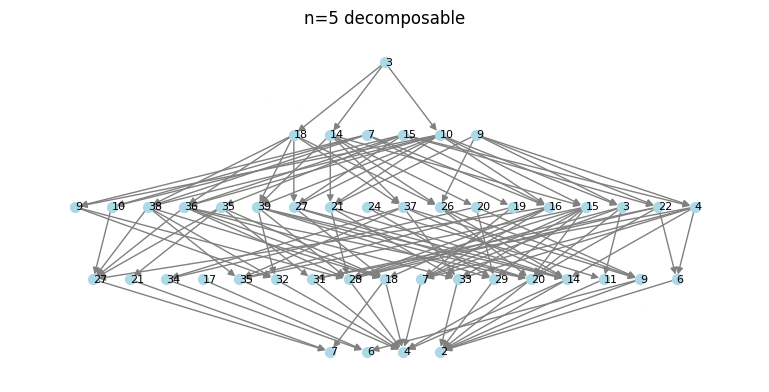

In [192]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'{idd[3]}'

add_node_to_graph(G, (5, 0, 2, 2))
add_attribute(node_attributes, (5, 0, 2, 2), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 6))
add_edge_to_graph(G, (5, 1, 1, 6), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 11))
add_edge_to_graph(G, (5, 1, 1, 11), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 20))
add_edge_to_graph(G, (5, 1, 2, 20), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 29))
add_edge_to_graph(G, (5, 1, 1, 29), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 29), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 33))
add_edge_to_graph(G, (5, 1, 1, 33), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 1, 33), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 4))
add_attribute(node_attributes, (5, 0, 2, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 7))
add_edge_to_graph(G, (5, 1, 1, 7), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 18))
add_edge_to_graph(G, (5, 1, 2, 18), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 20))
add_edge_to_graph(G, (5, 1, 2, 20), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 28))
add_edge_to_graph(G, (5, 1, 1, 28), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 28), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 31))
add_edge_to_graph(G, (5, 1, 1, 31), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 31), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 32))
add_edge_to_graph(G, (5, 1, 1, 32), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 32), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 35))
add_edge_to_graph(G, (5, 1, 1, 35), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 6))
add_attribute(node_attributes, (5, 0, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 17))
add_edge_to_graph(G, (5, 1, 1, 17), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 1, 17), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 34))
add_edge_to_graph(G, (5, 1, 1, 34), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 1, 34), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 3, 7))
add_attribute(node_attributes, (5, 0, 3, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 18))
add_edge_to_graph(G, (5, 1, 2, 18), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 3, 21))
add_edge_to_graph(G, (5, 1, 3, 21), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 3, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 1, 27))
add_edge_to_graph(G, (5, 1, 1, 27), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 1, 27), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 6))
add_attribute(node_attributes, (5, 1, 1, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 7))
add_attribute(node_attributes, (5, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 9))
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 11))
add_attribute(node_attributes, (5, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 14))
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)


add_node_to_graph(G, (5, 1, 2, 18))
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 20))
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 3, 21))
add_attribute(node_attributes, (5, 1, 3, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 3, 21) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 27))
add_attribute(node_attributes, (5, 1, 1, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 10))
add_edge_to_graph(G, (5, 2, 1, 10), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 28))
add_attribute(node_attributes, (5, 1, 1, 28), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 29))
add_attribute(node_attributes, (5, 1, 1, 29), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 31))
add_attribute(node_attributes, (5, 1, 1, 31), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 32))
add_attribute(node_attributes, (5, 1, 1, 32), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 33))
add_attribute(node_attributes, (5, 1, 1, 33), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 34))
add_attribute(node_attributes, (5, 1, 1, 34), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 35))
add_attribute(node_attributes, (5, 1, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)


add_node_to_graph(G, (5, 2, 1, 3))
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 4))
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 9))
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 10))
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 15))
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 16))
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 19))
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 19) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 20))
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 20) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 21))
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 22))
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)


add_node_to_graph(G, (5, 2, 2, 26))
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 2, 26) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 2, 26) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 2, 26) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 2, 27))
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 2, 27) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 2, 27) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 2, 27) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 35))
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 35) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 36))
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 37))
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 38))
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 39))
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)


add_node_to_graph(G, (5, 3, 1, 10))
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 10) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 14))
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 14) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)


add_node_to_graph(G, (5, 3, 1, 18))
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 18) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)




# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=5 decomposable')
plt.axis('off')
plt.show()

# n=5 indecomposable d=1

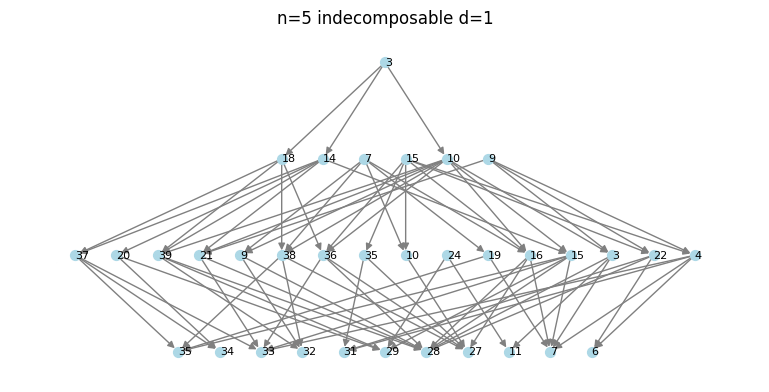

In [207]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'{idd[3]}'

add_node_to_graph(G, (5, 1, 1, 6))
add_attribute(node_attributes, (5, 1, 1, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 6) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 7))
add_attribute(node_attributes, (5, 1, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 7) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 11))
add_attribute(node_attributes, (5, 1, 1, 11), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 11) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)


add_node_to_graph(G, (5, 1, 1, 27))
add_attribute(node_attributes, (5, 1, 1, 27), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 10))
add_edge_to_graph(G, (5, 2, 1, 10), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 27) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 28))
add_attribute(node_attributes, (5, 1, 1, 28), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 3))
add_edge_to_graph(G, (5, 2, 1, 3), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 16))
add_edge_to_graph(G, (5, 2, 1, 16), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 28) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 29))
add_attribute(node_attributes, (5, 1, 1, 29), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 24))
add_edge_to_graph(G, (5, 2, 1, 24), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 24), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 29) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 31))
add_attribute(node_attributes, (5, 1, 1, 31), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 22))
add_edge_to_graph(G, (5, 2, 1, 22), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 35))
add_edge_to_graph(G, (5, 2, 1, 35), (5, 1, 1, 31) )
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 32))
add_attribute(node_attributes, (5, 1, 1, 32), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 9))
add_edge_to_graph(G, (5, 2, 1, 9), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 39))
add_edge_to_graph(G, (5, 2, 1, 39), (5, 1, 1, 32) )
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 33))
add_attribute(node_attributes, (5, 1, 1, 33), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 4))
add_edge_to_graph(G, (5, 2, 1, 4), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 21))
add_edge_to_graph(G, (5, 2, 1, 21), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 36))
add_edge_to_graph(G, (5, 2, 1, 36), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 33) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 34))
add_attribute(node_attributes, (5, 1, 1, 34), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 20))
add_edge_to_graph(G, (5, 2, 1, 20), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 34) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 1, 35))
add_attribute(node_attributes, (5, 1, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 15))
add_edge_to_graph(G, (5, 2, 1, 15), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 19))
add_edge_to_graph(G, (5, 2, 1, 19), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 37))
add_edge_to_graph(G, (5, 2, 1, 37), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 1, 38))
add_edge_to_graph(G, (5, 2, 1, 38), (5, 1, 1, 35) )
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 3))
add_attribute(node_attributes, (5, 2, 1, 3), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 3) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 4))
add_attribute(node_attributes, (5, 2, 1, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 4) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 9))
add_attribute(node_attributes, (5, 2, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 9) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 10))
add_attribute(node_attributes, (5, 2, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 10) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 15))
add_attribute(node_attributes, (5, 2, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 15) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 16))
add_attribute(node_attributes, (5, 2, 1, 16), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 16) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 19))
add_attribute(node_attributes, (5, 2, 1, 19), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 19) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 20))
add_attribute(node_attributes, (5, 2, 1, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 20) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 21))
add_attribute(node_attributes, (5, 2, 1, 21), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 21) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 22))
add_attribute(node_attributes, (5, 2, 1, 22), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 9))
add_edge_to_graph(G, (5, 3, 1, 9), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 22) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)


add_node_to_graph(G, (5, 2, 1, 35))
add_attribute(node_attributes, (5, 2, 1, 35), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 35) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 36))
add_attribute(node_attributes, (5, 2, 1, 36), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 15))
add_edge_to_graph(G, (5, 3, 1, 15), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 15), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 36) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 37))
add_attribute(node_attributes, (5, 2, 1, 37), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 37) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 38))
add_attribute(node_attributes, (5, 2, 1, 38), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 7))
add_edge_to_graph(G, (5, 3, 1, 7), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 38) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 2, 1, 39))
add_attribute(node_attributes, (5, 2, 1, 39), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 10))
add_edge_to_graph(G, (5, 3, 1, 10), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 14))
add_edge_to_graph(G, (5, 3, 1, 14), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 3, 1, 18))
add_edge_to_graph(G, (5, 3, 1, 18), (5, 2, 1, 39) )
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 10))
add_attribute(node_attributes, (5, 3, 1, 10), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 10) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)

add_node_to_graph(G, (5, 3, 1, 14))
add_attribute(node_attributes, (5, 3, 1, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 14) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)


add_node_to_graph(G, (5, 3, 1, 18))
add_attribute(node_attributes, (5, 3, 1, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 4, 1, 3))
add_edge_to_graph(G, (5, 4, 1, 3), (5, 3, 1, 18) )
add_attribute(node_attributes, (5, 4, 1, 3), 'is_decomposable', 0)



# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=5 indecomposable d=1')
plt.axis('off')
plt.show()

# n=5 indecomposable d=2

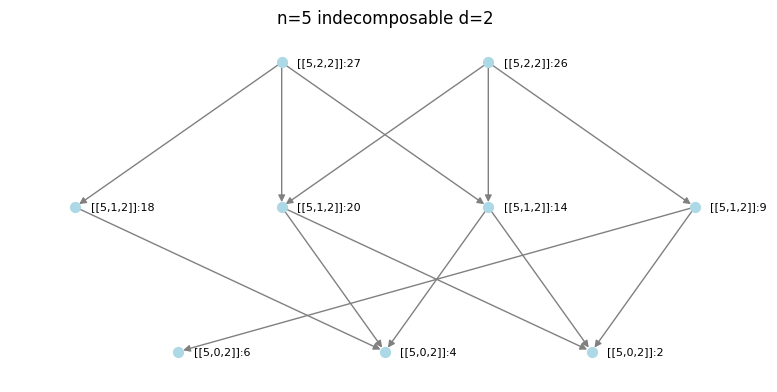

In [206]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (5, 0, 2, 2))
add_attribute(node_attributes, (5, 0, 2, 2), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 20))
add_edge_to_graph(G, (5, 1, 2, 20), (5, 0, 2, 2) )
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 4))
add_attribute(node_attributes, (5, 0, 2, 4), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 14))
add_edge_to_graph(G, (5, 1, 2, 14), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 18))
add_edge_to_graph(G, (5, 1, 2, 18), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 20))
add_edge_to_graph(G, (5, 1, 2, 20), (5, 0, 2, 4) )
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)

add_node_to_graph(G, (5, 0, 2, 6))
add_attribute(node_attributes, (5, 0, 2, 6), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 2, 9))
add_edge_to_graph(G, (5, 1, 2, 9), (5, 0, 2, 6) )
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 9))
add_attribute(node_attributes, (5, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 9) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 14))
add_attribute(node_attributes, (5, 1, 2, 14), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 14) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 18))
add_attribute(node_attributes, (5, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 18) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)

add_node_to_graph(G, (5, 1, 2, 20))
add_attribute(node_attributes, (5, 1, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 26))
add_edge_to_graph(G, (5, 2, 2, 26), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 2, 26), 'is_decomposable', 0)
add_node_to_graph(G, (5, 2, 2, 27))
add_edge_to_graph(G, (5, 2, 2, 27), (5, 1, 2, 20) )
add_attribute(node_attributes, (5, 2, 2, 27), 'is_decomposable', 0)



# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.05, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=5 indecomposable d=2')
plt.axis('off')
plt.show()

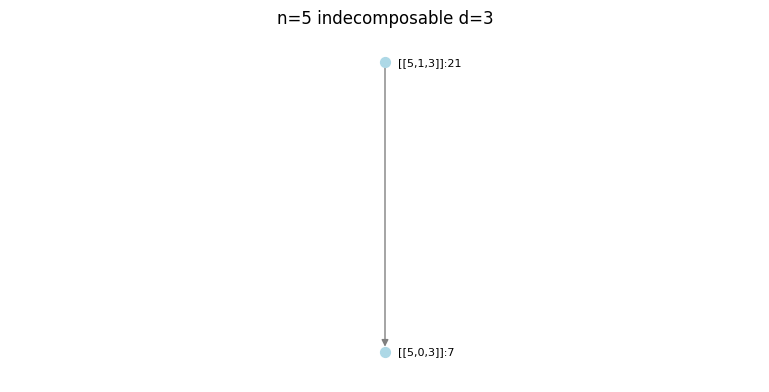

In [205]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (5, 0, 3, 7))
add_attribute(node_attributes, (5, 0, 3, 7), 'is_decomposable', 0)
add_node_to_graph(G, (5, 1, 3, 21))
add_edge_to_graph(G, (5, 1, 3, 21), (5, 0, 3, 7) )
add_attribute(node_attributes, (5, 1, 3, 21), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.0001, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=5 indecomposable d=3')
plt.axis('off')
plt.show()

# n=6 indecomposable d=2

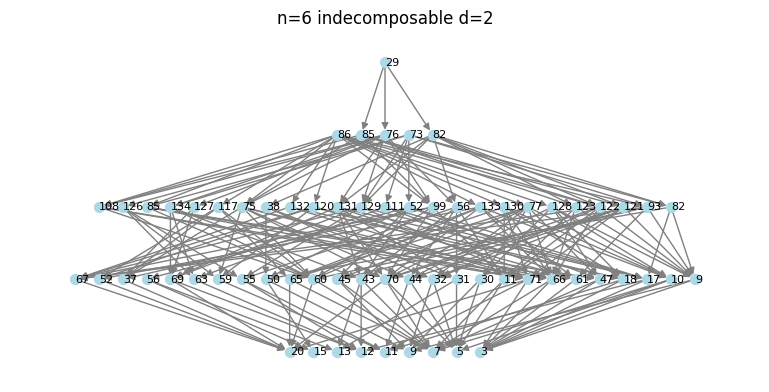

In [215]:
G = nx.DiGraph()
node_attributes = {}


def label_fmt(idd):
    return f'{idd[3]}'
    
add_node_to_graph(G, (6, 0, 2, 3))
add_attribute(node_attributes, (6, 0, 2, 3), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 9))
add_edge_to_graph(G, (6, 1, 2, 9), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 10))
add_edge_to_graph(G, (6, 1, 2, 10), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 10), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 17))
add_edge_to_graph(G, (6, 1, 2, 17), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 17), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 18))
add_edge_to_graph(G, (6, 1, 2, 18), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 47))
add_edge_to_graph(G, (6, 1, 2, 47), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 47), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 61))
add_edge_to_graph(G, (6, 1, 2, 61), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 61), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 66))
add_edge_to_graph(G, (6, 1, 2, 66), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 66), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 71))
add_edge_to_graph(G, (6, 1, 2, 71), (6, 0, 2, 3) )
add_attribute(node_attributes, (6, 1, 2, 71), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 5))
add_attribute(node_attributes, (6, 0, 2, 5), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 10))
add_edge_to_graph(G, (6, 1, 2, 10), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 10), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 11))
add_edge_to_graph(G, (6, 1, 2, 11), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 11), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 30))
add_edge_to_graph(G, (6, 1, 2, 30), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 30), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 31))
add_edge_to_graph(G, (6, 1, 2, 31), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 31), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 32))
add_edge_to_graph(G, (6, 1, 2, 32), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 32), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 44))
add_edge_to_graph(G, (6, 1, 2, 44), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 44), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 70))
add_edge_to_graph(G, (6, 1, 2, 70), (6, 0, 2, 5) )
add_attribute(node_attributes, (6, 1, 2, 70), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 7))
add_attribute(node_attributes, (6, 0, 2, 7), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 10))
add_edge_to_graph(G, (6, 1, 2, 10), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 10), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 11))
add_edge_to_graph(G, (6, 1, 2, 11), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 11), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 43))
add_edge_to_graph(G, (6, 1, 2, 43), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 43), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 45))
add_edge_to_graph(G, (6, 1, 2, 45), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 45), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 47))
add_edge_to_graph(G, (6, 1, 2, 47), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 47), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 60))
add_edge_to_graph(G, (6, 1, 2, 60), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 60), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 65))
add_edge_to_graph(G, (6, 1, 2, 65), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 65), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 66))
add_edge_to_graph(G, (6, 1, 2, 66), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 66), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 70))
add_edge_to_graph(G, (6, 1, 2, 70), (6, 0, 2, 7) )
add_attribute(node_attributes, (6, 1, 2, 70), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 9))
add_attribute(node_attributes, (6, 0, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 9))
add_edge_to_graph(G, (6, 1, 2, 9), (6, 0, 2, 9) )
add_attribute(node_attributes, (6, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 30))
add_edge_to_graph(G, (6, 1, 2, 30), (6, 0, 2, 9) )
add_attribute(node_attributes, (6, 1, 2, 30), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 32))
add_edge_to_graph(G, (6, 1, 2, 32), (6, 0, 2, 9) )
add_attribute(node_attributes, (6, 1, 2, 32), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 45))
add_edge_to_graph(G, (6, 1, 2, 45), (6, 0, 2, 9) )
add_attribute(node_attributes, (6, 1, 2, 45), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 50))
add_edge_to_graph(G, (6, 1, 2, 50), (6, 0, 2, 9) )
add_attribute(node_attributes, (6, 1, 2, 50), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 11))
add_attribute(node_attributes, (6, 0, 2, 11), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 18))
add_edge_to_graph(G, (6, 1, 2, 18), (6, 0, 2, 11) )
add_attribute(node_attributes, (6, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 44))
add_edge_to_graph(G, (6, 1, 2, 44), (6, 0, 2, 11) )
add_attribute(node_attributes, (6, 1, 2, 44), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 55))
add_edge_to_graph(G, (6, 1, 2, 55), (6, 0, 2, 11) )
add_attribute(node_attributes, (6, 1, 2, 55), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 59))
add_edge_to_graph(G, (6, 1, 2, 59), (6, 0, 2, 11) )
add_attribute(node_attributes, (6, 1, 2, 59), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 71))
add_edge_to_graph(G, (6, 1, 2, 71), (6, 0, 2, 11) )
add_attribute(node_attributes, (6, 1, 2, 71), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 12))
add_attribute(node_attributes, (6, 0, 2, 12), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 17))
add_edge_to_graph(G, (6, 1, 2, 17), (6, 0, 2, 12) )
add_attribute(node_attributes, (6, 1, 2, 17), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 43))
add_edge_to_graph(G, (6, 1, 2, 43), (6, 0, 2, 12) )
add_attribute(node_attributes, (6, 1, 2, 43), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 55))
add_edge_to_graph(G, (6, 1, 2, 55), (6, 0, 2, 12) )
add_attribute(node_attributes, (6, 1, 2, 55), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 63))
add_edge_to_graph(G, (6, 1, 2, 63), (6, 0, 2, 12) )
add_attribute(node_attributes, (6, 1, 2, 63), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 69))
add_edge_to_graph(G, (6, 1, 2, 69), (6, 0, 2, 12) )
add_attribute(node_attributes, (6, 1, 2, 69), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 13))
add_attribute(node_attributes, (6, 0, 2, 13), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 31))
add_edge_to_graph(G, (6, 1, 2, 31), (6, 0, 2, 13) )
add_attribute(node_attributes, (6, 1, 2, 31), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 43))
add_edge_to_graph(G, (6, 1, 2, 43), (6, 0, 2, 13) )
add_attribute(node_attributes, (6, 1, 2, 43), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 56))
add_edge_to_graph(G, (6, 1, 2, 56), (6, 0, 2, 13) )
add_attribute(node_attributes, (6, 1, 2, 56), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 15))
add_attribute(node_attributes, (6, 0, 2, 15), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 50))
add_edge_to_graph(G, (6, 1, 2, 50), (6, 0, 2, 15) )
add_attribute(node_attributes, (6, 1, 2, 50), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 56))
add_edge_to_graph(G, (6, 1, 2, 56), (6, 0, 2, 15) )
add_attribute(node_attributes, (6, 1, 2, 56), 'is_decomposable', 0)

add_node_to_graph(G, (6, 0, 2, 20))
add_attribute(node_attributes, (6, 0, 2, 20), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 37))
add_edge_to_graph(G, (6, 1, 2, 37), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 37), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 52))
add_edge_to_graph(G, (6, 1, 2, 52), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 60))
add_edge_to_graph(G, (6, 1, 2, 60), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 60), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 65))
add_edge_to_graph(G, (6, 1, 2, 65), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 65), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 67))
add_edge_to_graph(G, (6, 1, 2, 67), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 67), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 69))
add_edge_to_graph(G, (6, 1, 2, 69), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 69), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 70))
add_edge_to_graph(G, (6, 1, 2, 70), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 70), 'is_decomposable', 0)
add_node_to_graph(G, (6, 1, 2, 71))
add_edge_to_graph(G, (6, 1, 2, 71), (6, 0, 2, 20) )
add_attribute(node_attributes, (6, 1, 2, 71), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 9))
add_attribute(node_attributes, (6, 1, 2, 9), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 82))
add_edge_to_graph(G, (6, 2, 2, 82), (6, 1, 2, 9) )
add_attribute(node_attributes, (6, 2, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 93))
add_edge_to_graph(G, (6, 2, 2, 93), (6, 1, 2, 9) )
add_attribute(node_attributes, (6, 2, 2, 93), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 121))
add_edge_to_graph(G, (6, 2, 2, 121), (6, 1, 2, 9) )
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 122))
add_edge_to_graph(G, (6, 2, 2, 122), (6, 1, 2, 9) )
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 123))
add_edge_to_graph(G, (6, 2, 2, 123), (6, 1, 2, 9) )
add_attribute(node_attributes, (6, 2, 2, 123), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 128))
add_edge_to_graph(G, (6, 2, 2, 128), (6, 1, 2, 9) )
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 10))
add_attribute(node_attributes, (6, 1, 2, 10), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 10) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 128))
add_edge_to_graph(G, (6, 2, 2, 128), (6, 1, 2, 10) )
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 130))
add_edge_to_graph(G, (6, 2, 2, 130), (6, 1, 2, 10) )
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 10) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 11))
add_attribute(node_attributes, (6, 1, 2, 11), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 56))
add_edge_to_graph(G, (6, 2, 2, 56), (6, 1, 2, 11) )
add_attribute(node_attributes, (6, 2, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 99))
add_edge_to_graph(G, (6, 2, 2, 99), (6, 1, 2, 11) )
add_attribute(node_attributes, (6, 2, 2, 99), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 121))
add_edge_to_graph(G, (6, 2, 2, 121), (6, 1, 2, 11) )
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 122))
add_edge_to_graph(G, (6, 2, 2, 122), (6, 1, 2, 11) )
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 123))
add_edge_to_graph(G, (6, 2, 2, 123), (6, 1, 2, 11) )
add_attribute(node_attributes, (6, 2, 2, 123), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 130))
add_edge_to_graph(G, (6, 2, 2, 130), (6, 1, 2, 11) )
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 17))
add_attribute(node_attributes, (6, 1, 2, 17), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 52))
add_edge_to_graph(G, (6, 2, 2, 52), (6, 1, 2, 17) )
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 82))
add_edge_to_graph(G, (6, 2, 2, 82), (6, 1, 2, 17) )
add_attribute(node_attributes, (6, 2, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 111))
add_edge_to_graph(G, (6, 2, 2, 111), (6, 1, 2, 17) )
add_attribute(node_attributes, (6, 2, 2, 111), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 129))
add_edge_to_graph(G, (6, 2, 2, 129), (6, 1, 2, 17) )
add_attribute(node_attributes, (6, 2, 2, 129), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 131))
add_edge_to_graph(G, (6, 2, 2, 131), (6, 1, 2, 17) )
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 18))
add_attribute(node_attributes, (6, 1, 2, 18), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 120))
add_edge_to_graph(G, (6, 2, 2, 120), (6, 1, 2, 18) )
add_attribute(node_attributes, (6, 2, 2, 120), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 128))
add_edge_to_graph(G, (6, 2, 2, 128), (6, 1, 2, 18) )
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 130))
add_edge_to_graph(G, (6, 2, 2, 130), (6, 1, 2, 18) )
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 132))
add_edge_to_graph(G, (6, 2, 2, 132), (6, 1, 2, 18) )
add_attribute(node_attributes, (6, 2, 2, 132), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 30))
add_attribute(node_attributes, (6, 1, 2, 30), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 30) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 128))
add_edge_to_graph(G, (6, 2, 2, 128), (6, 1, 2, 30) )
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 31))
add_attribute(node_attributes, (6, 1, 2, 31), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 38))
add_edge_to_graph(G, (6, 2, 2, 38), (6, 1, 2, 31) )
add_attribute(node_attributes, (6, 2, 2, 38), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 56))
add_edge_to_graph(G, (6, 2, 2, 56), (6, 1, 2, 31) )
add_attribute(node_attributes, (6, 2, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 131))
add_edge_to_graph(G, (6, 2, 2, 131), (6, 1, 2, 31) )
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 32))
add_attribute(node_attributes, (6, 1, 2, 32), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 38))
add_edge_to_graph(G, (6, 2, 2, 38), (6, 1, 2, 32) )
add_attribute(node_attributes, (6, 2, 2, 38), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 32) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 121))
add_edge_to_graph(G, (6, 2, 2, 121), (6, 1, 2, 32) )
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 122))
add_edge_to_graph(G, (6, 2, 2, 122), (6, 1, 2, 32) )
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 37))
add_attribute(node_attributes, (6, 1, 2, 37), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 37) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 99))
add_edge_to_graph(G, (6, 2, 2, 99), (6, 1, 2, 37) )
add_attribute(node_attributes, (6, 2, 2, 99), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 117))
add_edge_to_graph(G, (6, 2, 2, 117), (6, 1, 2, 37) )
add_attribute(node_attributes, (6, 2, 2, 117), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 127))
add_edge_to_graph(G, (6, 2, 2, 127), (6, 1, 2, 37) )
add_attribute(node_attributes, (6, 2, 2, 127), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 43))
add_attribute(node_attributes, (6, 1, 2, 43), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 52))
add_edge_to_graph(G, (6, 2, 2, 52), (6, 1, 2, 43) )
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 56))
add_edge_to_graph(G, (6, 2, 2, 56), (6, 1, 2, 43) )
add_attribute(node_attributes, (6, 2, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 131))
add_edge_to_graph(G, (6, 2, 2, 131), (6, 1, 2, 43) )
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 134))
add_edge_to_graph(G, (6, 2, 2, 134), (6, 1, 2, 43) )
add_attribute(node_attributes, (6, 2, 2, 134), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 44))
add_attribute(node_attributes, (6, 1, 2, 44), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 56))
add_edge_to_graph(G, (6, 2, 2, 56), (6, 1, 2, 44) )
add_attribute(node_attributes, (6, 2, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 44) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 121))
add_edge_to_graph(G, (6, 2, 2, 121), (6, 1, 2, 44) )
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 128))
add_edge_to_graph(G, (6, 2, 2, 128), (6, 1, 2, 44) )
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 45))
add_attribute(node_attributes, (6, 1, 2, 45), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 52))
add_edge_to_graph(G, (6, 2, 2, 52), (6, 1, 2, 45) )
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 45) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 93))
add_edge_to_graph(G, (6, 2, 2, 93), (6, 1, 2, 45) )
add_attribute(node_attributes, (6, 2, 2, 93), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 47))
add_attribute(node_attributes, (6, 1, 2, 47), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 52))
add_edge_to_graph(G, (6, 2, 2, 52), (6, 1, 2, 47) )
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 47) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 85))
add_edge_to_graph(G, (6, 2, 2, 85), (6, 1, 2, 47) )
add_attribute(node_attributes, (6, 2, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 128))
add_edge_to_graph(G, (6, 2, 2, 128), (6, 1, 2, 47) )
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 50))
add_attribute(node_attributes, (6, 1, 2, 50), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 38))
add_edge_to_graph(G, (6, 2, 2, 38), (6, 1, 2, 50) )
add_attribute(node_attributes, (6, 2, 2, 38), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 52))
add_edge_to_graph(G, (6, 2, 2, 52), (6, 1, 2, 50) )
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 82))
add_edge_to_graph(G, (6, 2, 2, 82), (6, 1, 2, 50) )
add_attribute(node_attributes, (6, 2, 2, 82), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 52))
add_attribute(node_attributes, (6, 1, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 117))
add_edge_to_graph(G, (6, 2, 2, 117), (6, 1, 2, 52) )
add_attribute(node_attributes, (6, 2, 2, 117), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 120))
add_edge_to_graph(G, (6, 2, 2, 120), (6, 1, 2, 52) )
add_attribute(node_attributes, (6, 2, 2, 120), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 52) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 55))
add_attribute(node_attributes, (6, 1, 2, 55), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 56))
add_edge_to_graph(G, (6, 2, 2, 56), (6, 1, 2, 55) )
add_attribute(node_attributes, (6, 2, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 126))
add_edge_to_graph(G, (6, 2, 2, 126), (6, 1, 2, 55) )
add_attribute(node_attributes, (6, 2, 2, 126), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 129))
add_edge_to_graph(G, (6, 2, 2, 129), (6, 1, 2, 55) )
add_attribute(node_attributes, (6, 2, 2, 129), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 56))
add_attribute(node_attributes, (6, 1, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 52))
add_edge_to_graph(G, (6, 2, 2, 52), (6, 1, 2, 56) )
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 59))
add_attribute(node_attributes, (6, 1, 2, 59), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 59) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 120))
add_edge_to_graph(G, (6, 2, 2, 120), (6, 1, 2, 59) )
add_attribute(node_attributes, (6, 2, 2, 120), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 126))
add_edge_to_graph(G, (6, 2, 2, 126), (6, 1, 2, 59) )
add_attribute(node_attributes, (6, 2, 2, 126), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 60))
add_attribute(node_attributes, (6, 1, 2, 60), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 85))
add_edge_to_graph(G, (6, 2, 2, 85), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 93))
add_edge_to_graph(G, (6, 2, 2, 93), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 93), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 99))
add_edge_to_graph(G, (6, 2, 2, 99), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 99), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 108))
add_edge_to_graph(G, (6, 2, 2, 108), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 108), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 117))
add_edge_to_graph(G, (6, 2, 2, 117), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 117), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 134))
add_edge_to_graph(G, (6, 2, 2, 134), (6, 1, 2, 60) )
add_attribute(node_attributes, (6, 2, 2, 134), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 61))
add_attribute(node_attributes, (6, 1, 2, 61), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 85))
add_edge_to_graph(G, (6, 2, 2, 85), (6, 1, 2, 61) )
add_attribute(node_attributes, (6, 2, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 93))
add_edge_to_graph(G, (6, 2, 2, 93), (6, 1, 2, 61) )
add_attribute(node_attributes, (6, 2, 2, 93), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 111))
add_edge_to_graph(G, (6, 2, 2, 111), (6, 1, 2, 61) )
add_attribute(node_attributes, (6, 2, 2, 111), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 120))
add_edge_to_graph(G, (6, 2, 2, 120), (6, 1, 2, 61) )
add_attribute(node_attributes, (6, 2, 2, 120), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 61) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 63))
add_attribute(node_attributes, (6, 1, 2, 63), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 111))
add_edge_to_graph(G, (6, 2, 2, 111), (6, 1, 2, 63) )
add_attribute(node_attributes, (6, 2, 2, 111), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 126))
add_edge_to_graph(G, (6, 2, 2, 126), (6, 1, 2, 63) )
add_attribute(node_attributes, (6, 2, 2, 126), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 134))
add_edge_to_graph(G, (6, 2, 2, 134), (6, 1, 2, 63) )
add_attribute(node_attributes, (6, 2, 2, 134), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 65))
add_attribute(node_attributes, (6, 1, 2, 65), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 65) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 117))
add_edge_to_graph(G, (6, 2, 2, 117), (6, 1, 2, 65) )
add_attribute(node_attributes, (6, 2, 2, 117), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 130))
add_edge_to_graph(G, (6, 2, 2, 130), (6, 1, 2, 65) )
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 65) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 66))
add_attribute(node_attributes, (6, 1, 2, 66), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 108))
add_edge_to_graph(G, (6, 2, 2, 108), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 108), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 122))
add_edge_to_graph(G, (6, 2, 2, 122), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 123))
add_edge_to_graph(G, (6, 2, 2, 123), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 123), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 130))
add_edge_to_graph(G, (6, 2, 2, 130), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 131))
add_edge_to_graph(G, (6, 2, 2, 131), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 66) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 67))
add_attribute(node_attributes, (6, 1, 2, 67), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 93))
add_edge_to_graph(G, (6, 2, 2, 93), (6, 1, 2, 67) )
add_attribute(node_attributes, (6, 2, 2, 93), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 99))
add_edge_to_graph(G, (6, 2, 2, 99), (6, 1, 2, 67) )
add_attribute(node_attributes, (6, 2, 2, 99), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 120))
add_edge_to_graph(G, (6, 2, 2, 120), (6, 1, 2, 67) )
add_attribute(node_attributes, (6, 2, 2, 120), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 122))
add_edge_to_graph(G, (6, 2, 2, 122), (6, 1, 2, 67) )
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 129))
add_edge_to_graph(G, (6, 2, 2, 129), (6, 1, 2, 67) )
add_attribute(node_attributes, (6, 2, 2, 129), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 132))
add_edge_to_graph(G, (6, 2, 2, 132), (6, 1, 2, 67) )
add_attribute(node_attributes, (6, 2, 2, 132), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 69))
add_attribute(node_attributes, (6, 1, 2, 69), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 127))
add_edge_to_graph(G, (6, 2, 2, 127), (6, 1, 2, 69) )
add_attribute(node_attributes, (6, 2, 2, 127), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 129))
add_edge_to_graph(G, (6, 2, 2, 129), (6, 1, 2, 69) )
add_attribute(node_attributes, (6, 2, 2, 129), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 131))
add_edge_to_graph(G, (6, 2, 2, 131), (6, 1, 2, 69) )
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 134))
add_edge_to_graph(G, (6, 2, 2, 134), (6, 1, 2, 69) )
add_attribute(node_attributes, (6, 2, 2, 134), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 70))
add_attribute(node_attributes, (6, 1, 2, 70), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 77))
add_edge_to_graph(G, (6, 2, 2, 77), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 99))
add_edge_to_graph(G, (6, 2, 2, 99), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 99), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 121))
add_edge_to_graph(G, (6, 2, 2, 121), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 122))
add_edge_to_graph(G, (6, 2, 2, 122), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 131))
add_edge_to_graph(G, (6, 2, 2, 131), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 133))
add_edge_to_graph(G, (6, 2, 2, 133), (6, 1, 2, 70) )
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)

add_node_to_graph(G, (6, 1, 2, 71))
add_attribute(node_attributes, (6, 1, 2, 71), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 75))
add_edge_to_graph(G, (6, 2, 2, 75), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 85))
add_edge_to_graph(G, (6, 2, 2, 85), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 108))
add_edge_to_graph(G, (6, 2, 2, 108), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 108), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 121))
add_edge_to_graph(G, (6, 2, 2, 121), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 129))
add_edge_to_graph(G, (6, 2, 2, 129), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 129), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 130))
add_edge_to_graph(G, (6, 2, 2, 130), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)
add_node_to_graph(G, (6, 2, 2, 132))
add_edge_to_graph(G, (6, 2, 2, 132), (6, 1, 2, 71) )
add_attribute(node_attributes, (6, 2, 2, 132), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 38))
add_attribute(node_attributes, (6, 2, 2, 38), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 38) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 52))
add_attribute(node_attributes, (6, 2, 2, 52), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 52) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 56))
add_attribute(node_attributes, (6, 2, 2, 56), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 56) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 56) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 75))
add_attribute(node_attributes, (6, 2, 2, 75), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 75) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 85))
add_edge_to_graph(G, (6, 3, 2, 85), (6, 2, 2, 75) )
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 75) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 77))
add_attribute(node_attributes, (6, 2, 2, 77), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 77) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 82))
add_attribute(node_attributes, (6, 2, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 82) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 82) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 85))
add_attribute(node_attributes, (6, 2, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 85) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 85) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 93))
add_attribute(node_attributes, (6, 2, 2, 93), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 93) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 93) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 99))
add_attribute(node_attributes, (6, 2, 2, 99), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 99) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 85))
add_edge_to_graph(G, (6, 3, 2, 85), (6, 2, 2, 99) )
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 99) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 108))
add_attribute(node_attributes, (6, 2, 2, 108), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 108) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 85))
add_edge_to_graph(G, (6, 3, 2, 85), (6, 2, 2, 108) )
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 108) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 111))
add_attribute(node_attributes, (6, 2, 2, 111), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 111) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 117))
add_attribute(node_attributes, (6, 2, 2, 117), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 117) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 120))
add_attribute(node_attributes, (6, 2, 2, 120), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 120) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 121))
add_attribute(node_attributes, (6, 2, 2, 121), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 121) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 85))
add_edge_to_graph(G, (6, 3, 2, 85), (6, 2, 2, 121) )
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 122))
add_attribute(node_attributes, (6, 2, 2, 122), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 122) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 85))
add_edge_to_graph(G, (6, 3, 2, 85), (6, 2, 2, 122) )
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 122) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 123))
add_attribute(node_attributes, (6, 2, 2, 123), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 123) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 85))
add_edge_to_graph(G, (6, 3, 2, 85), (6, 2, 2, 123) )
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 126))
add_attribute(node_attributes, (6, 2, 2, 126), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 126) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 127))
add_attribute(node_attributes, (6, 2, 2, 127), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 127) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 128))
add_attribute(node_attributes, (6, 2, 2, 128), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 128) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 129))
add_attribute(node_attributes, (6, 2, 2, 129), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 129) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 129) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 129) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 130))
add_attribute(node_attributes, (6, 2, 2, 130), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 130) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 131))
add_attribute(node_attributes, (6, 2, 2, 131), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 131) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 82))
add_edge_to_graph(G, (6, 3, 2, 82), (6, 2, 2, 131) )
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 132))
add_attribute(node_attributes, (6, 2, 2, 132), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 132) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 133))
add_attribute(node_attributes, (6, 2, 2, 133), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 86))
add_edge_to_graph(G, (6, 3, 2, 86), (6, 2, 2, 133) )
add_attribute(node_attributes, (6, 3, 2, 86), 'is_decomposable', 0)

add_node_to_graph(G, (6, 2, 2, 134))
add_attribute(node_attributes, (6, 2, 2, 134), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 73))
add_edge_to_graph(G, (6, 3, 2, 73), (6, 2, 2, 134) )
add_attribute(node_attributes, (6, 3, 2, 73), 'is_decomposable', 0)
add_node_to_graph(G, (6, 3, 2, 76))
add_edge_to_graph(G, (6, 3, 2, 76), (6, 2, 2, 134) )
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)

add_node_to_graph(G, (6, 3, 2, 76))
add_attribute(node_attributes, (6, 3, 2, 76), 'is_decomposable', 0)
add_node_to_graph(G, (6, 4, 2, 29))
add_edge_to_graph(G, (6, 4, 2, 29), (6, 3, 2, 76) )
add_attribute(node_attributes, (6, 4, 2, 29), 'is_decomposable', 0)

add_node_to_graph(G, (6, 3, 2, 82))
add_attribute(node_attributes, (6, 3, 2, 82), 'is_decomposable', 0)
add_node_to_graph(G, (6, 4, 2, 29))
add_edge_to_graph(G, (6, 4, 2, 29), (6, 3, 2, 82) )
add_attribute(node_attributes, (6, 4, 2, 29), 'is_decomposable', 0)

add_node_to_graph(G, (6, 3, 2, 85))
add_attribute(node_attributes, (6, 3, 2, 85), 'is_decomposable', 0)
add_node_to_graph(G, (6, 4, 2, 29))
add_edge_to_graph(G, (6, 4, 2, 29), (6, 3, 2, 85) )
add_attribute(node_attributes, (6, 4, 2, 29), 'is_decomposable', 0)

# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.0001, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=6 indecomposable d=2')
plt.axis('off')
plt.show()

# n=7 indecomposable d=3

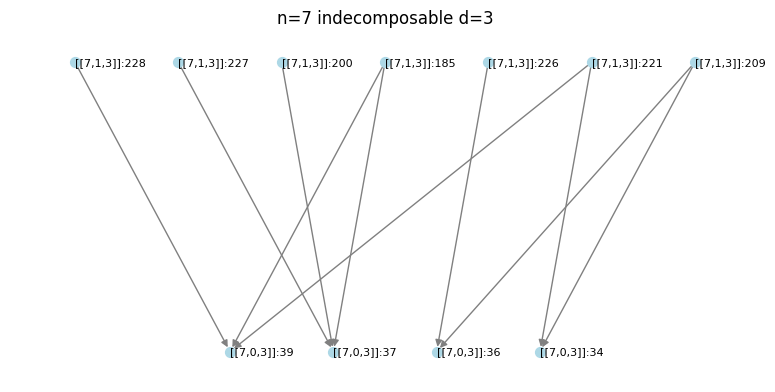

In [216]:
G = nx.DiGraph()
node_attributes = {}

def label_fmt(idd):
    return f'[[{idd[0]},{idd[1]},{idd[2]}]]:{idd[3]}'

add_node_to_graph(G, (7, 0, 3, 34))
add_attribute(node_attributes, (7, 0, 3, 34), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 209))
add_edge_to_graph(G, (7, 1, 3, 209), (7, 0, 3, 34) )
add_attribute(node_attributes, (7, 1, 3, 209), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 221))
add_edge_to_graph(G, (7, 1, 3, 221), (7, 0, 3, 34) )
add_attribute(node_attributes, (7, 1, 3, 221), 'is_decomposable', 0)

add_node_to_graph(G, (7, 0, 3, 36))
add_attribute(node_attributes, (7, 0, 3, 36), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 209))
add_edge_to_graph(G, (7, 1, 3, 209), (7, 0, 3, 36) )
add_attribute(node_attributes, (7, 1, 3, 209), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 226))
add_edge_to_graph(G, (7, 1, 3, 226), (7, 0, 3, 36) )
add_attribute(node_attributes, (7, 1, 3, 226), 'is_decomposable', 0)

add_node_to_graph(G, (7, 0, 3, 37))
add_attribute(node_attributes, (7, 0, 3, 37), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 185))
add_edge_to_graph(G, (7, 1, 3, 185), (7, 0, 3, 37) )
add_attribute(node_attributes, (7, 1, 3, 185), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 200))
add_edge_to_graph(G, (7, 1, 3, 200), (7, 0, 3, 37) )
add_attribute(node_attributes, (7, 1, 3, 200), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 227))
add_edge_to_graph(G, (7, 1, 3, 227), (7, 0, 3, 37) )
add_attribute(node_attributes, (7, 1, 3, 227), 'is_decomposable', 0)

add_node_to_graph(G, (7, 0, 3, 39))
add_attribute(node_attributes, (7, 0, 3, 39), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 185))
add_edge_to_graph(G, (7, 1, 3, 185), (7, 0, 3, 39) )
add_attribute(node_attributes, (7, 1, 3, 185), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 221))
add_edge_to_graph(G, (7, 1, 3, 221), (7, 0, 3, 39) )
add_attribute(node_attributes, (7, 1, 3, 221), 'is_decomposable', 0)
add_node_to_graph(G, (7, 1, 3, 228))
add_edge_to_graph(G, (7, 1, 3, 228), (7, 0, 3, 39) )
add_attribute(node_attributes, (7, 1, 3, 228), 'is_decomposable', 0)





# Define node positions using multipartite_layout
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=True)

# Add node labels next to the nodes without box borders
node_labels = nx.get_node_attributes(G, 'label')
for node, label in node_labels.items():
    x, y = pos[node]
    plt.text(x+0.0001, y, label, verticalalignment='center', horizontalalignment='left', fontsize=8, bbox=dict(facecolor='none', edgecolor='none'))

# Show the plot
plt.title('n=7 indecomposable d=3')
plt.axis('off')
plt.show()

In [46]:
code = cb.small_code(8, 1, 894, info_only=True)
code.info

[[8,1]]-894 of type StabSubSystemCode
-------------------------------------------------------------------------------
aut_group_generators : ['V2S7', 'V1S7', 'V0S7', 'H2H7^(2,7)', 'V3H4S5H6S7^(4,6)', '(1,2)', '(0,1)', 'H3H4V5V6S7^(5,6)', '(3,4)(5,6)']
aut_group_size       : 4608
code_type            : StabSubSystemCode
d                    : 3
index                : 894
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z7', 'X1Z7', 'X2Z7', 'X3X4Z5Z6', 'Y3Y5Z6Z7', 'X3Z4X6Z7', 'Z0Z1Z2Y3Z4Z5Y7']
k                    : 1
logical_ops          : ['Z0Z1Z2Z3Z4X7', 'Z3Z4Z5Z6Z7']
n                    : 8
uuid                 : 9d566873-fcd3-49df-8569-dd377e45776b
weight_enumerator    : [1, 0, 6, 0, 20, 0, 34, 64, 3]



In [679]:
def parse_string(input_str):
    tuples_list = []
    i = 0
    while i < len(input_str):
        letter = input_str[i]
        i += 1
        num_str = ""
        while i < len(input_str) and input_str[i].isdigit():
            num_str += input_str[i]
            i += 1
        if num_str:
            tuples_list.append((letter, int(num_str)))
        else:
            raise ValueError("Invalid input format")
    return tuples_list

In [680]:
def make_tanner(gen, n):
    G = nx.Graph()
    nodes = range(n+len(gen))
    G.add_nodes_from(nodes)
    offset = n
    for stab in gen:
        p_string = parse_string(stab)
        connections = [item[1] for item in p_string]
        edges = [(offset, connection) for connection in connections]
        G.add_edges_from(edges)
        offset += 1
    return G
    

In [ ]:
G = make_tanner(code['isotropic_generators'], 8)

nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

In [45]:
nx.is_planar(G)

False

In [676]:
def is_planar(code):
    G = make_tanner(code['isotropic_generators'], code['n'])
    return nx.is_planar(G)

In [677]:
def make_stabilizer_graph(gen, n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    for stab in gen:
        p_string = parse_string(stab)
        connections = [item[1] for item in p_string]
        edges = [(connections[i],connections[(i+1)%len(connections)]) for i in range(len(connections))]
        G.add_edges_from(edges)
    return G

In [78]:
code

{aut_group_generators : ['V2S6', 'H2H6^(2,6)', 'V1S6', '(1,2)', 'V0S7', 'H0H7^(0,7)', 'V3V4', '(3,4)'],
aut_group_size       : 384,
code_type            : StabSubSystemCode,
d                    : 3,
index                : 564,
is_css               : 0,
is_decomposable      : 0,
is_degenerate        : 1,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['X0Z7', 'X1Z6', 'X2Z6', 'X3X4', 'Z3Z4X5', 'Z0X3Y5Y7', 'Z1Z2X3Z5X6Z7'],
k                    : 1,
logical_ops          : ['Z0Z3Z4X7', 'Z3Z4Z6Z7'],
n                    : 8,
uuid                 : b3d314a1-647e-47c0-9e8a-a3c835b99073,
weight_enumerator    : [1, 0, 5, 2, 11, 12, 39, 50, 8],
}

In [79]:
codes = cb.all_small_codes(4, 1, d=2, is_decomposable=False, info_only=True, list_only=True)

In [80]:
codes

[{aut_group_generators : ['V2V3', '(2,3)', 'V0V1', '(0,1)', '(0,2)(1,3)'],
 aut_group_size       : 32,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 6,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0X1', 'X2X3', 'Z0Z1Z2Z3'],
 k                    : 1,
 logical_ops          : ['X1X3', 'Z2Z3'],
 n                    : 4,
 uuid                 : c49160c8-795e-4558-9978-08b491cdd091,
 weight_enumerator    : [1, 0, 2, 0, 5],
 },
 {aut_group_generators : ['V0H1S2H3^(1,3)', 'H0S1S2V3^(1,2)', '(0,1)(2,3)'],
 aut_group_size       : 24,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 8,
 is_css               : 0,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['Z0X2Z3', 'Y0X1Y2', 'Z1Z2X3'],
 k             

In [ ]:
G = make_stabilizer_graph(codes[1]['isotropic_generators'],codes[1]['n'])
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

In [695]:
codes = cb.all_small_codes(4, 0, d=2, is_decomposable=False, info_only=True, list_only=True) \
    + cb.all_small_codes(4, 1, d=2, is_decomposable=False, info_only=True, list_only=True) \
    + cb.all_small_codes(4, 2, d=2, is_decomposable=False, info_only=True, list_only=True)

In [696]:
codes

[{aut_group_generators : ['S1S3', '(1,3)', 'V0V2', 'H0H1H2H3^(0,1)(2,3)'],
 aut_group_size       : 32,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 2,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0X2', 'Z1Z3', 'Z0Z2Z3', 'X1X2X3'],
 k                    : 0,
 logical_ops          : [],
 n                    : 4,
 uuid                 : db5c4282-0f38-4540-951d-42382b281621,
 weight_enumerator    : [1, 0, 2, 8, 5],
 },
 {aut_group_generators : ['S2S3', '(2,3)', 'S1S3', '(1,2)', 'S0S3', '(0,1)'],
 aut_group_size       : 192,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 3,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['Z0Z3', 'Z1Z3', 'Z2Z3', 'X0X1X2X3'],
 k           

In [110]:
codes[0]

{aut_group_generators : ['S1S3', '(1,3)', 'V0V2', 'H0H1H2H3^(0,1)(2,3)'],
aut_group_size       : 32,
code_type            : StabSubSystemCode,
d                    : 2,
index                : 2,
is_css               : 1,
is_decomposable      : 0,
is_degenerate        : 0,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['X0X2', 'Z1Z3', 'Z0Z2Z3', 'X1X2X3'],
k                    : 0,
logical_ops          : [],
n                    : 4,
uuid                 : db5c4282-0f38-4540-951d-42382b281621,
weight_enumerator    : [1, 0, 2, 8, 5],
}

In [697]:
G = make_stabilizer_graph(codes[0]['isotropic_generators'],codes[0]['n'])

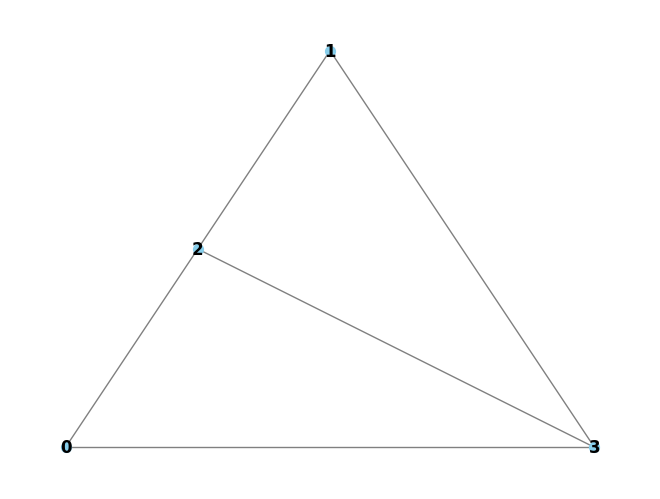

In [698]:
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

In [ ]:
H = make_tanner(codes[0]['isotropic_generators'],codes[0]['n'])

pos = nx.planar_layout(H)
nx.draw(H, with_labels=True, pos=pos, node_color='skyblue', 
        node_size=50, font_size=12, font_color='black', 
        font_weight='bold', edge_color='gray', arrows=False)

In [113]:
codes[1]

{aut_group_generators : ['S2S3', '(2,3)', 'S1S3', '(1,2)', 'S0S3', '(0,1)'],
aut_group_size       : 192,
code_type            : StabSubSystemCode,
d                    : 2,
index                : 3,
is_css               : 1,
is_decomposable      : 0,
is_degenerate        : 0,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['Z0Z3', 'Z1Z3', 'Z2Z3', 'X0X1X2X3'],
k                    : 0,
logical_ops          : [],
n                    : 4,
uuid                 : 30ab98d9-54a2-4c10-8646-16b074ec7960,
weight_enumerator    : [1, 0, 6, 0, 9],
}

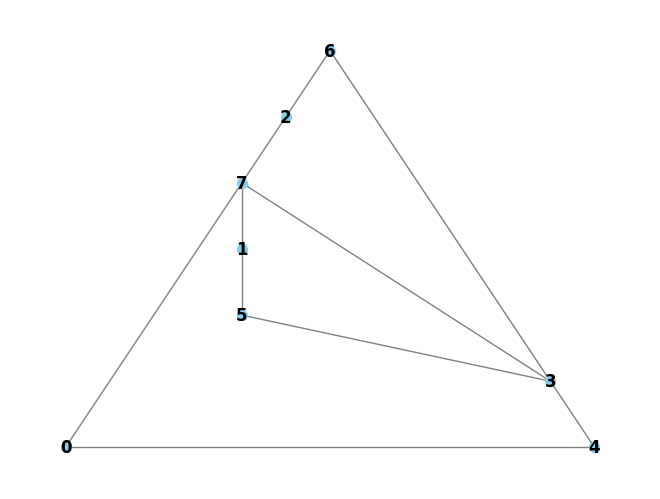

In [699]:
H = make_tanner(codes[1]['isotropic_generators'],codes[1]['n'])

pos = nx.planar_layout(H)
nx.draw(H, with_labels=True, pos=pos, node_color='skyblue', 
        node_size=50, font_size=12, font_color='black', 
        font_weight='bold', edge_color='gray', arrows=False)

In [116]:
G = make_stabilizer_graph(codes[1]['isotropic_generators'],codes[1]['n'])

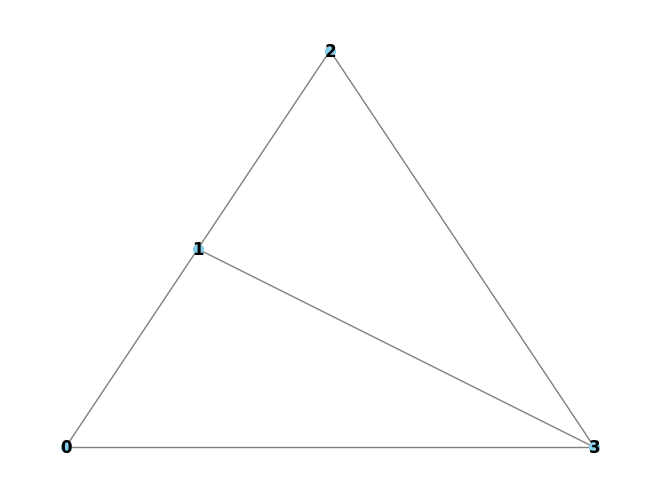

In [117]:
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

In [118]:
codes[2]

{aut_group_generators : ['V2V3', '(2,3)', 'V0V1', '(0,1)', '(0,2)(1,3)'],
aut_group_size       : 32,
code_type            : StabSubSystemCode,
d                    : 2,
index                : 6,
is_css               : 1,
is_decomposable      : 0,
is_degenerate        : 0,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['X0X1', 'X2X3', 'Z0Z1Z2Z3'],
k                    : 1,
logical_ops          : ['X1X3', 'Z2Z3'],
n                    : 4,
uuid                 : c49160c8-795e-4558-9978-08b491cdd091,
weight_enumerator    : [1, 0, 2, 0, 5],
}

In [130]:
G = make_stabilizer_graph(codes[2]['isotropic_generators'],codes[2]['n'])

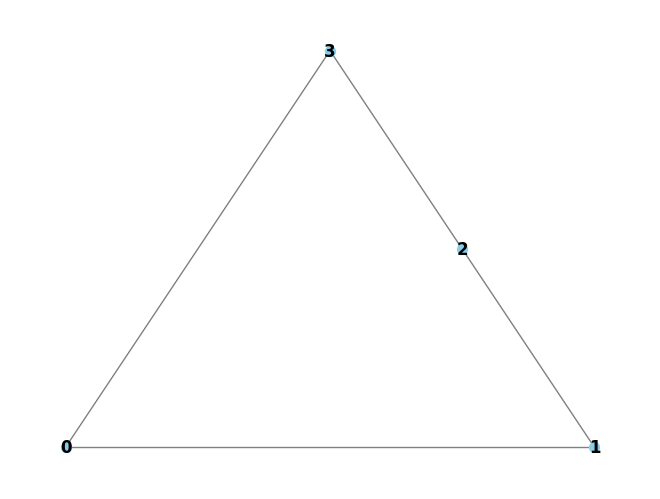

In [131]:
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

In [134]:
codes[3]

{aut_group_generators : ['V0H1S2H3^(1,3)', 'H0S1S2V3^(1,2)', '(0,1)(2,3)'],
aut_group_size       : 24,
code_type            : StabSubSystemCode,
d                    : 2,
index                : 8,
is_css               : 0,
is_decomposable      : 0,
is_degenerate        : 0,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['Z0X2Z3', 'Y0X1Y2', 'Z1Z2X3'],
k                    : 1,
logical_ops          : ['X1Z3', 'Z0Z1'],
n                    : 4,
uuid                 : 51fc14fb-8309-4ff6-a51e-8801d0066f87,
weight_enumerator    : [1, 0, 0, 4, 3],
}

In [694]:
G = make_stabilizer_graph(codes[3]['isotropic_generators'],codes[3]['n'])

IndexError: list index out of range

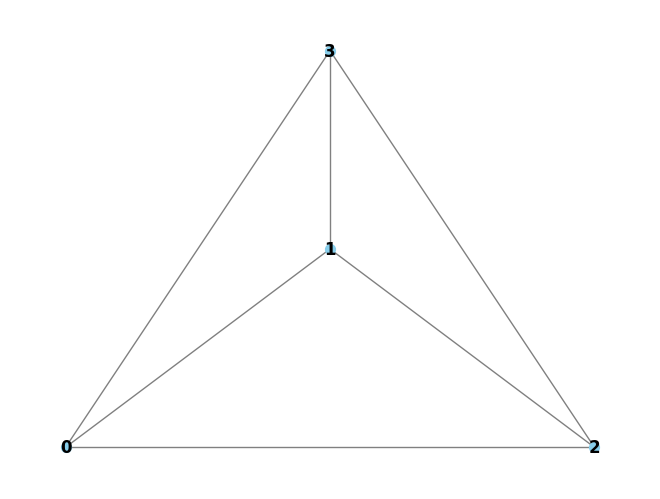

In [133]:
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', 
        node_size=50, font_size=12, font_color='black', 
        font_weight='bold', edge_color='gray', arrows=False)

In [135]:
codes[4]

{aut_group_generators : ['(2,3)', '(1,2)', 'S0S1S2S3', '(0,1)', 'H0H1H2H3'],
aut_group_size       : 144,
code_type            : StabSubSystemCode,
d                    : 2,
index                : 9,
is_css               : 1,
is_decomposable      : 0,
is_degenerate        : 0,
is_gf4linear         : 1,
is_subsystem         : 1,
isotropic_generators : ['Z0Z1Z2Z3', 'X0X1X2X3'],
k                    : 2,
logical_ops          : ['X1X2', 'X1X3', 'Z0Z2', 'Z0Z3'],
n                    : 4,
uuid                 : 373b856e-a5af-4e9f-8524-997f1ccfe77e,
weight_enumerator    : [1, 0, 0, 0, 3],
}

In [136]:
G = make_stabilizer_graph(codes[4]['isotropic_generators'],codes[4]['n'])

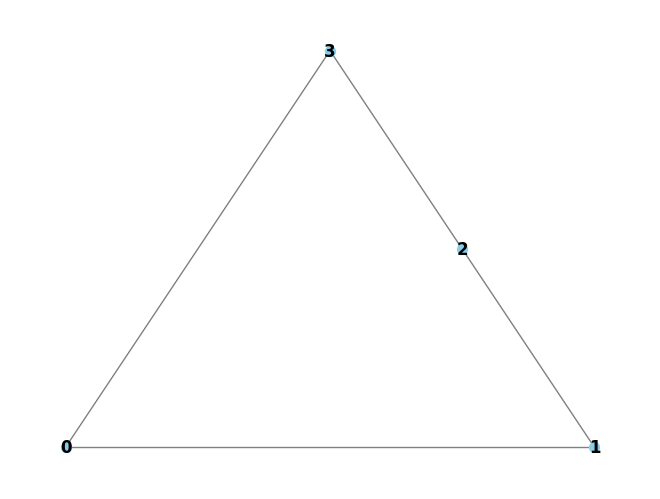

In [137]:
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', 
        node_size=50, font_size=12, font_color='black', 
        font_weight='bold', edge_color='gray', arrows=False)

In [148]:
codes = cb.all_small_codes(4, 0, d=2, info_only=True, list_only=True) 

In [149]:
codes

[{aut_group_generators : ['S1S3', '(1,3)', 'V0V2', 'H0H1H2H3^(0,1)(2,3)'],
 aut_group_size       : 32,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 2,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0X2', 'Z1Z3', 'Z0Z2Z3', 'X1X2X3'],
 k                    : 0,
 logical_ops          : [],
 n                    : 4,
 uuid                 : db5c4282-0f38-4540-951d-42382b281621,
 weight_enumerator    : [1, 0, 2, 8, 5],
 },
 {aut_group_generators : ['S2S3', '(2,3)', 'S1S3', '(1,2)', 'S0S3', '(0,1)'],
 aut_group_size       : 192,
 code_type            : StabSubSystemCode,
 d                    : 2,
 index                : 3,
 is_css               : 1,
 is_decomposable      : 0,
 is_degenerate        : 0,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['Z0Z3', 'Z1Z3', 'Z2Z3', 'X0X1X2X3'],
 k           

In [5]:
code = cb.small_code(9,1,8519, info_only=True)

In [6]:
code.info

[[9,1]]-8519 of type StabSubSystemCode
-------------------------------------------------------------------------------
aut_group_generators : ['S0S8', 'V3V4', '(3,4)', 'S2S6', '(2,6)', 'V1V7', '(1,7)', 'H0H1H2H3H4H5H6H7H8^(0,3,2,1)(4,6,7,8)']
aut_group_size       : 1024
code_type            : StabSubSystemCode
d                    : 3
index                : 8519
is_css               : 1
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['Z0Z8', 'X1X7', 'Z2Z6', 'X3X4', 'Z3Z4Z5Z6', 'X2X5X6X7', 'Z1Z5Z7Z8', 'X0X3X5X8']
k                    : 1
logical_ops          : ['X4X5X7', 'Z1Z2Z7']
n                    : 9
uuid                 : 753d20ad-5cde-4541-8513-becbacb0f9e8
weight_enumerator    : [1, 0, 4, 0, 22, 0, 100, 0, 129, 0]



In [23]:
import json

def save_dict_to_json(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)


def make_trivials(val):
    uuids = ["9a1aa443-f00d-43da-8ee6-afc98036dd9c",
         "ac86a85a-dce3-45da-b5f9-6ba51709df70",
         "1e334ccc-1d59-4d7d-a6c5-ffeaf20c5a1d",
         "f8ed642d-e010-4b53-bd6c-ced2add1fc20",
         "5985113d-2c37-4f21-a8bd-a02afae6bcac",
         "a27ee9b6-6964-4c78-ad28-512dc5f5eea3",
         "ae525d70-70e6-4184-aea4-c01529f06adf",
         "9a4ba787-2e08-43ca-927f-eda8a306da9f",
         "703a36d1-7090-4357-9274-1658ac6abbdb",
         "bc9898de-4ec7-4370-adff-5a5bbfd4a4f3"]

    def aut_gen(n):
        gen = []
        for i in range(n):
            gen += ["R"+str(i),"S"+str(i)]
        if n > 1:
            gen += ['(0, 1)']
        if n > 2:
            gen += [str(tuple(range(n)))]
        return gen
    
    def decomp(n):
        if n == 1: 
            return 0
        return 1

    def logical(n):
        logicals = []
        for i in range(n):
            logicals += ['X'+str(i), 'Z'+str(i)]
        return logicals
        
    for n in range(1,val):
        data_dict = {}
        val_dict = {}
        val_dict["aut_group_generators"] = aut_gen(n)
        val_dict["aut_group_size"] = 6
        val_dict["code_type"] = "StabSubSystemCode"
        val_dict["d"] = 1
        val_dict["index"] = 0
        val_dict["is_css"] = 1
        val_dict["is_decomposable"] = decomp(n)
        val_dict["is_degenerate"] = 0
        val_dict["is_gf4linear"] = 0
        val_dict["is_subsystem"] = 1
        val_dict["isotropic_generators"] = ["I"*n]
        val_dict["k"] = 1
        val_dict["logical_ops"] = logical(n)
        val_dict["n"] = 1
        val_dict["uuid"] = uuids[n]
        val_dict["weight_enumerator"] = [1]
        data_dict["0"] = val_dict
        print(f"[[{n},{n},1]]")
        pprint(data_dict)
        filename = f"codes_n_{n}_k_{n}.json"
        save_dict_to_json(filename, data_dict)
    
    

In [27]:
make_trivials(10)

[[1,1,1]]
{'0': {'aut_group_generators': ['R0', 'S0'],
       'aut_group_size': 6,
       'code_type': 'StabSubSystemCode',
       'd': 1,
       'index': 0,
       'is_css': 1,
       'is_decomposable': 0,
       'is_degenerate': 0,
       'is_gf4linear': 0,
       'is_subsystem': 1,
       'isotropic_generators': ['I'],
       'k': 1,
       'logical_ops': ['X0', 'Z0'],
       'n': 1,
       'uuid': 'ac86a85a-dce3-45da-b5f9-6ba51709df70',
       'weight_enumerator': [1]}}
[[2,2,1]]
{'0': {'aut_group_generators': ['R0', 'S0', 'R1', 'S1', '(0, 1)'],
       'aut_group_size': 6,
       'code_type': 'StabSubSystemCode',
       'd': 1,
       'index': 0,
       'is_css': 1,
       'is_decomposable': 1,
       'is_degenerate': 0,
       'is_gf4linear': 0,
       'is_subsystem': 1,
       'isotropic_generators': ['II'],
       'k': 1,
       'logical_ops': ['X0', 'Z0', 'X1', 'Z1'],
       'n': 1,
       'uuid': '1e334ccc-1d59-4d7d-a6c5-ffeaf20c5a1d',
       'weight_enumerator': [1]}}
[[3,3,1

In [25]:
from pprint import pprint

In [650]:
found_codes = []
for n in range(10):
    for k in range(10):
        for d in range(5):
            title = f"[[{n},{k},{d}]]"
            first_found = False
            codes = cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)
            for code in codes:
                if is_even_gen_set(code['isotropic_generators']) is True:
                    if first_found is False:
                        #print(title)
                        first_found = True
                    #print(f"{code['index']} : {code['isotropic_generators']}")
                    code['max_weight'] = max_weight(code['isotropic_generators'])
                    found_codes += [code]

In [1318]:
len(found_codes)

21273

So there are 21,273 out of the 686,904 codes that have even weight generating sets. So 3%

In [1319]:
sorted_codes = sorted(found_codes, key=lambda x: x['max_weight'])

In [1083]:
count_even = np.zeros((10,10,5),dtype=int)
for code in sorted_codes:
    count_even[code['n']][code['k']][code['d']] +=1

In [1088]:
for i in range(1,5):
    lprint(count_even[:,:,i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1090]:
i = 0
special_codes_d3_css = []
for code in sorted_codes:
    if code['d'] == 3 and code['k'] > 0 and code['is_css']==1:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_d3_css += [code]

4 :: 226: [[7,1, 3]] : 1008 :['Z0Z1Z3Z6', 'Z0Z2Z3Z5', 'Y1Y2Y3Y4', 'Z3Z4Z5Z6', 'Y0Y1Y4Y5', 'Y0Y2Y4Y6'] : False
4 :: 5784: [[9,1, 3]] : 128 :['Z0Z8', 'X1X5', 'Z2Z3Z6Z8', 'Z2Z4Z7Z8', 'Z1Z5Z6Z7', 'X2X4X5X6', 'X2X3X5X7', 'X0X3X4X8'] : False
4 :: 7419: [[9,1, 3]] : 384 :['Z0Z8', 'Z1Z6', 'Z2Z7', 'Z3Z4Z6Z8', 'Z3Z5Z7Z8', 'X1X3X5X6', 'X2X3X4X7', 'X0X4X5X8'] : False
4 :: 8519: [[9,1, 3]] : 1024 :['Z0Z8', 'X1X7', 'Z2Z6', 'X3X4', 'Z3Z4Z5Z6', 'X2X5X6X7', 'Z1Z5Z7Z8', 'X0X3X5X8'] : True
4 :: 9897: [[9,1, 3]] : 144 :['Z0Z1Z4Z8', 'Z0Z2Z5Z7', 'Z1Z3Z5Z7', 'X1X2X4X5', 'Z0Z4Z5Z6', 'X1X3X4X6', 'X0X3X4X7', 'X0X3X5X8'] : False
6 :: 4079: [[9,1, 3]] : 3072 :['Z0Z8', 'X1X7', 'X2X7', 'X3X5', 'X4X6', 'Z3Z4Z5Z6', 'X0X5X6X8', 'Z1Z2Z3Z5Z7Z8'] : True
6 :: 4280: [[9,1, 3]] : 9216 :['Z0Z7', 'Z1Z8', 'X2X6', 'X3X6', 'Z4Z5', 'X0X4X5X7', 'X1X4X5X8', 'Z2Z3Z4Z6Z7Z8'] : True
6 :: 4395: [[9,1, 3]] : 1152 :['Z0Z8', 'Z1Z8', 'Z2Z3Z6Z7', 'Z2Z4Z7Z8', 'Z5Z6Z7Z8', 'X2X4X5X6', 'X3X4X5X7', 'X0X1X2X3X5X8'] : False
6 :: 8802: [[9,1, 3]] :

In [1320]:
i = 0
special_codes_d3_923 = []
for code in sorted_codes:
    if code['d'] == 3 and code['k'] == 2:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_d3_923 += [code]

4 :: 4525: [[8,2, 3]] : 6 :['Y0Z1Y2Z7', 'Z0X1X3Z4', 'Y3Y4Z6Z7', 'Z0X2X5Z6', 'Z1Z3Z5X6', 'Z2Z4Z5X7'] : False
6 :: 4947: [[8,2, 3]] : 1728 :['Y0Y1Z4Z7', 'X2X3Z5Z6', 'Z2Z3Y5Y6', 'Z0Z1X4X7', 'Y0Z1Y2Z3Y4Z6', 'X0Z1X2Z3X5Z7'] : False
6 :: 4948: [[8,2, 3]] : 48 :['Y0Z1Y2Z7', 'Y3Y4Z5Z6', 'X1X2X4X5', 'Z0Y1Z4Y6', 'Z2Z3Y5Y7', 'X0Z1Z2X3Z4Z5'] : False
6 :: 5267: [[9,2, 3]] : 16 :['X0Z8', 'X1Z5', 'X2Y3Y6Z8', 'Z2Z4Z6X7', 'X3X4Z5Z6Z7Z8', 'Z1X2Z4X5Z7Z8', 'Z0Y2Z3Z6Z7Y8'] : False
6 :: 24508: [[9,2, 3]] : 64 :['X0Z7', 'X1X2', 'X3X4Z5Z6', 'X3Z4X6Z8', 'X1Z3X5Z6Z7Z8', 'Z0Y1Z2X3Z5Y7', 'Z1Z2Y3Z4Z5Y8'] : False
6 :: 25670: [[9,2, 3]] : 128 :['X0Z7', 'X1X2', 'X3X4Z5Z6', 'Z3Z4Y5Y6', 'X1Z3X5Z6Z7Z8', 'Z0Y1Z2X3Z5Y7', 'Y1Z2Z3Z4Z7Y8'] : False
6 :: 31962: [[9,2, 3]] : 2 :['X2Z5Z6Z8', 'X0Z3X4Z6', 'X0Z2Z3X5', 'Y1Z2Y7X8', 'Y1Y3Z4Z5Z7Z8', 'X1Z2Z3Z4X6Z8', 'Z0Z1Z4Z5Z6X7'] : False
6 :: 32087: [[9,2, 3]] : 8 :['Z0X2Z7Z8', 'Z3X4Z6Z8', 'Z3X5Z7Z8', 'Y0Y2Z4X6', 'Z0X1X3Z4Z5Z6', 'X0Z1Z5Z6X7Z8', 'Y1Y2Z3Z4Z5X8'] : False
6 :: 32103: [[9,

In [1076]:
i = 0
special_codes_d3 = []
for code in sorted_codes:
    if code['d'] > 2 and code['k'] > 0:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_d3 += [code]

4 :: 21: [[5,1, 3]] : 360 :['Y0Y1Z2Z3', 'Y0Z1Y2Z4', 'X0Z2X3Z4', 'X0Z1Z3X4'] : False
4 :: 166: [[7,1, 3]] : 64 :['X0Z6', 'X1Z3', 'Z3X4Z5Z6', 'Z1X2Y3Y4', 'Z2Z4X5Z6', 'Z0Y2Z4Y6'] : False
4 :: 190: [[7,1, 3]] : 192 :['X0Z6', 'X1Z5', 'X2Z4', 'Z2X3X4Z5', 'Z1Y3Y5Z6', 'Z0Z3Z4X6'] : True
4 :: 226: [[7,1, 3]] : 1008 :['Z0Z1Z3Z6', 'Z0Z2Z3Z5', 'Y1Y2Y3Y4', 'Z3Z4Z5Z6', 'Y0Y1Y4Y5', 'Y0Y2Y4Y6'] : False
4 :: 227: [[7,1, 3]] : 42 :['Y0Y1Z2Z5', 'Y0Z1Y2Z6', 'Z0X1X3Z4', 'Z0X2Z3X4', 'X0Z2Z3X5', 'X0Z1Z4X6'] : False
4 :: 228: [[7,1, 3]] : 144 :['Y0Y1Z5Z6', 'Z0X1X2Z3', 'X0Z1Z2X3', 'X0Z1X4Z6', 'Z0Z3Z4X5', 'Z1Z2Z4X6'] : False
4 :: 257: [[7,1, 3]] : 32 :['X0Z6', 'X1X2Z4Z5', 'X1X3Z5Z6', 'Y1Z3Y4Z6', 'Y2Z3Y5Z6', 'Z0Z1Z2X6'] : False
4 :: 975: [[8,1, 3]] : 12 :['Y0Y1Z2Z6', 'Y0Z1Y2Z7', 'Z0X1X3Z4', 'Z0X2Z3X4', 'Z0X1X5Z7', 'Z1Z3Z5X6', 'Z2Z4Z5X7'] : False
4 :: 1198: [[8,1, 3]] : 192 :['Y0Y1Z4Z7', 'Y2Y3Z5Z6', 'Z0X4Z5Z6', 'Z2Z4X5Z7', 'X1X3Y4Y5', 'Z3Z4X6Z7', 'Z1Z5Z6X7'] : False
4 :: 1201: [[8,1, 3]] : 16 :['Y0Y1Z2Z6', 'Y0Z1Y

In [1079]:
len(special_codes_d3)

232

In [1091]:
i = 0
special_codes_d2_css = []
for code in sorted_codes:
    if code['d'] == 2 and code['k'] > 0 and code['is_css']==1:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_d2_css += [code]

4 :: 6: [[4,1, 2]] : 32 :['X0X1', 'X2X3', 'Z0Z1Z2Z3'] : True
4 :: 9: [[4,2, 2]] : 144 :['Z0Z1Z2Z3', 'X0X1X2X3'] : True
4 :: 17: [[6,1, 2]] : 128 :['Z0Z1', 'Z2Z5', 'X3X4', 'Z0Z3Z4Z5', 'X0X1X2X5'] : True
4 :: 31: [[6,1, 2]] : 96 :['Z1Z5', 'Z2Z5', 'X3X4', 'Z0Z3Z4Z5', 'X0X1X2X5'] : True
4 :: 55: [[6,1, 2]] : 384 :['X0X1', 'X2X3', 'X4X5', 'Z0Z1Z2Z3', 'Z0Z1Z4Z5'] : True
4 :: 56: [[6,2, 2]] : 64 :['X0X1', 'Z3Z5', 'Z0Z1Z2Z4', 'X2Y3X4Y5'] : True
4 :: 126: [[6,2, 2]] : 288 :['Z0Z1Z2Z3', 'X0X1X2X3', 'Z0Z1Z4Z5', 'X0X1X4X5'] : True
4 :: 129: [[6,2, 2]] : 64 :['X0X1', 'Z0Z1Z2Z4', 'Z0Z1Z3Z5', 'Y2Y3Y4Y5'] : True
4 :: 329: [[8,1, 2]] : 128 :['X0X4', 'X1X5', 'Z2Z3', 'Z0Z2Z4Z7', 'Z1Z2Z5Z6', 'X2X3X4X6', 'X2X3X5X7'] : False
4 :: 497: [[8,1, 2]] : 384 :['Z0Z1', 'Z3Z7', 'Z4Z7', 'X5X6', 'X0X1X2X6', 'Z2Z5Z6Z7', 'X3X4X6X7'] : True
4 :: 498: [[8,1, 2]] : 384 :['X0X1', 'X2X6', 'Z3Z4', 'X5X6', 'Z0Z1Z3Z7', 'Z2Z5Z6Z7', 'X3X4X6X7'] : True
4 :: 549: [[8,1, 2]] : 768 :['Z1Z2', 'Z3Z7', 'Z4Z6', 'Z5Z6', 'Z0Z1Z6Z7', 'X0X4X

In [1077]:

special_codes_d2 = []
for code in sorted_codes:
    if code['d'] ==2 and code['k'] > 0:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_d2 += [code]

4 :: 6: [[4,1, 2]] : 32 :['X0X1', 'X2X3', 'Z0Z1Z2Z3'] : True
4 :: 9: [[4,2, 2]] : 144 :['Z0Z1Z2Z3', 'X0X1X2X3'] : True
4 :: 17: [[6,1, 2]] : 128 :['Z0Z1', 'Z2Z5', 'X3X4', 'Z0Z3Z4Z5', 'X0X1X2X5'] : True
4 :: 31: [[6,1, 2]] : 96 :['Z1Z5', 'Z2Z5', 'X3X4', 'Z0Z3Z4Z5', 'X0X1X2X5'] : True
4 :: 43: [[6,1, 2]] : 32 :['X0Z4', 'X1Z5', 'Y2Y3Z4Z5', 'Z0Z2X4Z5', 'Z1Z3Z4X5'] : True
4 :: 55: [[6,1, 2]] : 384 :['X0X1', 'X2X3', 'X4X5', 'Z0Z1Z2Z3', 'Z0Z1Z4Z5'] : True
4 :: 63: [[6,1, 2]] : 48 :['X0X1Z3Z4', 'X0X2Z3Z5', 'Z0X3Z4Z5', 'Z1Z3X4Z5', 'Z2Z3Z4X5'] : False
4 :: 69: [[6,1, 2]] : 32 :['X0Z5', 'X1X2Z3Z4', 'Y1Y3Z4Z5', 'X1Z2X4Z5', 'Z0Z1Z2X5'] : False
4 :: 56: [[6,2, 2]] : 64 :['X0X1', 'Z3Z5', 'Z0Z1Z2Z4', 'X2Y3X4Y5'] : True
4 :: 111: [[6,2, 2]] : 96 :['X0X1X2Z5', 'X1X3Z4Z5', 'X0X1Z3X4', 'Z0Z1Z2X5'] : False
4 :: 126: [[6,2, 2]] : 288 :['Z0Z1Z2Z3', 'X0X1X2X3', 'Z0Z1Z4Z5', 'X0X1X4X5'] : True
4 :: 127: [[6,2, 2]] : 72 :['X1X2Z3Z4', 'X0Y1Y3Z4', 'X1Z2X4Z5', 'Z0Z1Z2X5'] : False
4 :: 129: [[6,2, 2]] : 64 :['X0X1',

In [1078]:
len(special_codes_d2)

5121

In [1093]:

special_codes_n5 = []
for code in sorted_codes:
    if code['n'] ==5 and code['k'] > 0 and code['is_css']==1:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_n5 += [code]

2 :: 17: [[5,1, 1]] : 3840 :['Z0Z4', 'Z1Z4', 'Z2Z4', 'Z3Z4'] : True
4 :: 6: [[5,1, 1]] : 192 :['Z0Z4', 'Z1Z4', 'X2X3', 'X0X1X3X4'] : True
4 :: 4: [[5,2, 1]] : 64 :['Z1Z4', 'X2X3', 'Z0Z2Z3Z4'] : True
4 :: 9: [[5,3, 1]] : 384 :['Z1Z4', 'Z0Z2Z3Z4'] : True


In [1094]:
special_codes_n4 = []
for code in sorted_codes:
    if code['n'] ==4 and code['k'] > 0 and code['is_css']==1:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_n4 += [code]

2 :: 7: [[4,1, 1]] : 384 :['Z0Z3', 'Z1Z3', 'Z2Z3'] : True
4 :: 12: [[4,1, 1]] : 48 :['Z1Z3', 'Z2Z3', 'X0X1X2X3'] : True
4 :: 6: [[4,1, 2]] : 32 :['X0X1', 'X2X3', 'Z0Z1Z2Z3'] : True
4 :: 8: [[4,2, 1]] : 32 :['X2X3', 'Z0Z1Z2Z3'] : True
4 :: 9: [[4,2, 2]] : 144 :['Z0Z1Z2Z3', 'X0X1X2X3'] : True
4 :: 2: [[4,3, 1]] : 384 :['X0X1X2X3'] : True


In [1096]:
special_codes_n6 = []
for code in sorted_codes:
    if code['n'] ==6 and code['k'] > 0 and code['d'] > 1:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_n6 += [code]

4 :: 17: [[6,1, 2]] : 128 :['Z0Z1', 'Z2Z5', 'X3X4', 'Z0Z3Z4Z5', 'X0X1X2X5'] : True
4 :: 31: [[6,1, 2]] : 96 :['Z1Z5', 'Z2Z5', 'X3X4', 'Z0Z3Z4Z5', 'X0X1X2X5'] : True
4 :: 43: [[6,1, 2]] : 32 :['X0Z4', 'X1Z5', 'Y2Y3Z4Z5', 'Z0Z2X4Z5', 'Z1Z3Z4X5'] : True
4 :: 55: [[6,1, 2]] : 384 :['X0X1', 'X2X3', 'X4X5', 'Z0Z1Z2Z3', 'Z0Z1Z4Z5'] : True
4 :: 63: [[6,1, 2]] : 48 :['X0X1Z3Z4', 'X0X2Z3Z5', 'Z0X3Z4Z5', 'Z1Z3X4Z5', 'Z2Z3Z4X5'] : False
4 :: 69: [[6,1, 2]] : 32 :['X0Z5', 'X1X2Z3Z4', 'Y1Y3Z4Z5', 'X1Z2X4Z5', 'Z0Z1Z2X5'] : False
4 :: 56: [[6,2, 2]] : 64 :['X0X1', 'Z3Z5', 'Z0Z1Z2Z4', 'X2Y3X4Y5'] : True
4 :: 111: [[6,2, 2]] : 96 :['X0X1X2Z5', 'X1X3Z4Z5', 'X0X1Z3X4', 'Z0Z1Z2X5'] : False
4 :: 126: [[6,2, 2]] : 288 :['Z0Z1Z2Z3', 'X0X1X2X3', 'Z0Z1Z4Z5', 'X0X1X4X5'] : True
4 :: 127: [[6,2, 2]] : 72 :['X1X2Z3Z4', 'X0Y1Y3Z4', 'X1Z2X4Z5', 'Z0Z1Z2X5'] : False
4 :: 129: [[6,2, 2]] : 64 :['X0X1', 'Z0Z1Z2Z4', 'Z0Z1Z3Z5', 'Y2Y3Y4Y5'] : True
4 :: 131: [[6,2, 2]] : 16 :['X2Z5', 'X0X3Z4Z5', 'X1Z3X4Z5', 'Z0Z1Z2X5'] : T

In [1097]:
special_codes_n7 = []
for code in sorted_codes:
    if code['n'] ==7 and code['k'] > 0 and code['d'] > 2:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_n7 += [code]

4 :: 166: [[7,1, 3]] : 64 :['X0Z6', 'X1Z3', 'Z3X4Z5Z6', 'Z1X2Y3Y4', 'Z2Z4X5Z6', 'Z0Y2Z4Y6'] : False
4 :: 190: [[7,1, 3]] : 192 :['X0Z6', 'X1Z5', 'X2Z4', 'Z2X3X4Z5', 'Z1Y3Y5Z6', 'Z0Z3Z4X6'] : True
4 :: 226: [[7,1, 3]] : 1008 :['Z0Z1Z3Z6', 'Z0Z2Z3Z5', 'Y1Y2Y3Y4', 'Z3Z4Z5Z6', 'Y0Y1Y4Y5', 'Y0Y2Y4Y6'] : False
4 :: 227: [[7,1, 3]] : 42 :['Y0Y1Z2Z5', 'Y0Z1Y2Z6', 'Z0X1X3Z4', 'Z0X2Z3X4', 'X0Z2Z3X5', 'X0Z1Z4X6'] : False
4 :: 228: [[7,1, 3]] : 144 :['Y0Y1Z5Z6', 'Z0X1X2Z3', 'X0Z1Z2X3', 'X0Z1X4Z6', 'Z0Z3Z4X5', 'Z1Z2Z4X6'] : False
4 :: 257: [[7,1, 3]] : 32 :['X0Z6', 'X1X2Z4Z5', 'X1X3Z5Z6', 'Y1Z3Y4Z6', 'Y2Z3Y5Z6', 'Z0Z1Z2X6'] : False
6 :: 108: [[7,1, 3]] : 768 :['X0Z4', 'X1Z4', 'X2Z5', 'X3Z6', 'Z2Z3Y5Y6', 'Z0Z1Z2X4X5Z6'] : True
6 :: 115: [[7,1, 3]] : 576 :['X0Z6', 'X1Z6', 'X2X3Z4Z5', 'Y2Y4Z5Z6', 'X2Z3X5Z6', 'Z0Z1Y2Z3Z4Y6'] : False


In [1098]:
special_codes_n7_css = []
for code in sorted_codes:
    if code['n'] ==7 and code['k'] > 0 and code['d'] > 2 and code['is_css']==1:
        print(f"{code['max_weight']} :: {code['index']}: [[{code['n']},{code['k']}, {code['d']}]] : {code['aut_group_size']} :{code['isotropic_generators']} : {is_planar(code)}")
        special_codes_n7_css += [code]

4 :: 226: [[7,1, 3]] : 1008 :['Z0Z1Z3Z6', 'Z0Z2Z3Z5', 'Y1Y2Y3Y4', 'Z3Z4Z5Z6', 'Y0Y1Y4Y5', 'Y0Y2Y4Y6'] : False


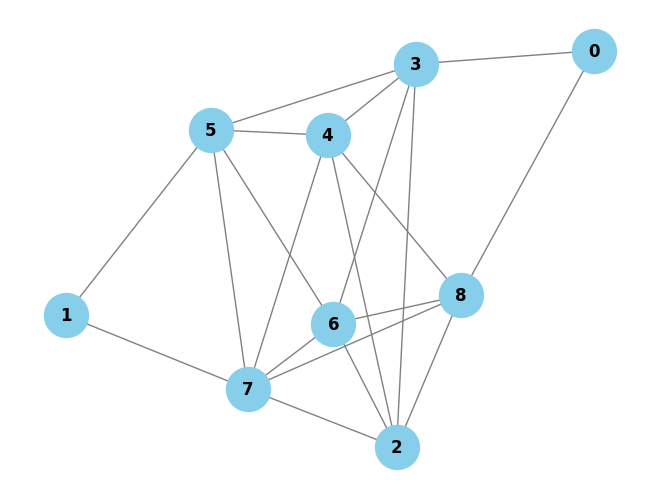

In [704]:
G = make_stabilizer_graph(special_codes[1]['isotropic_generators'],special_codes[1]['n'])
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

#pos = nx.planar_layout(G)
#nx.draw(G, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

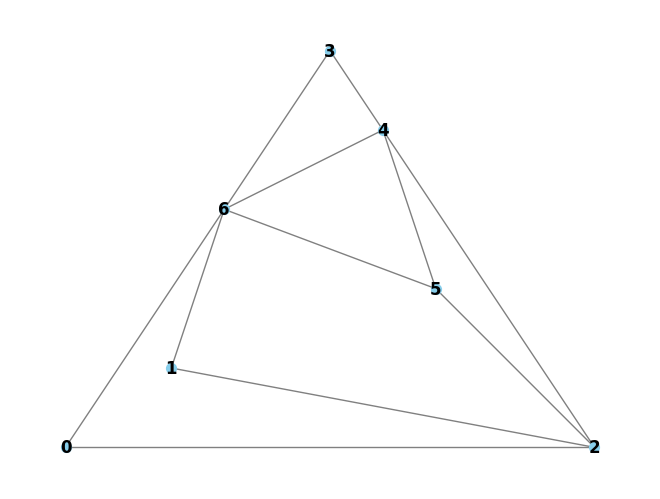

In [701]:
gen = ['X3X4X5X6', 'X1X2X5X6', 'X0X2X4X6', 'Z3Z4Z5Z6', 'Z1Z2Z5Z6', 'Z0Z2Z4Z6']
J = make_stabilizer_graph(gen,7)

pos = nx.planar_layout(J)
nx.draw(J, with_labels=True, pos=pos, node_color='skyblue', node_size=50, font_size=12, font_color='black', font_weight='bold', edge_color='gray', arrows=False)

In [1070]:
import numpy as np
from itertools import combinations

def rank(matrix):
    """Compute the rank of a matrix."""
    return np.linalg.matrix_rank(matrix)

def generate_all_matrices(m, n):
    """Generate all possible m x n matrices over GF(2)."""
    num_matrices = 2 ** (m * n)
    matrices = []
    for i in range(num_matrices):
        matrix = np.array([list(map(int, bin(i)[2:].zfill(m * n)))]).reshape((m, n))
        matrices.append(matrix)
    return matrices

def filter_matrices_by_rank(matrices, k):
    """Filter matrices to include only those with rank k."""
    result = []
    for matrix in matrices:
        if rank(matrix) == k:
            result.append(matrix)
    return result

def generate_rank_k_matrices(m, n, k):
    """Generate all rank k matrices of size m x n over GF(2)."""
    all_matrices = generate_all_matrices(m, n)
    rank_k_matrices = filter_matrices_by_rank(all_matrices, k)
    return rank_k_matrices

def print_matrices(matrices):
    """Print matrices in a readable format."""
    for i, matrix in enumerate(matrices):
        print(f"Matrix {i + 1}:")
        print(matrix)
        print()

# Example usage:
m, n, k = 3, 3, 3  # Dimensions and rank
#rank_k_matrices = generate_rank_k_matrices(m, n, k)
#print_matrices(rank_k_matrices)

def np_weight(data, n, k):
    weights = []
    for j in range(n-k):
        weights += [int(np.sum(np.logical_or(data[j][0:n],data[j][n:2*n]).astype(int)))]
    return max(weights)

def np_weight_list(data, n, k):
    weights = []
    for j in range(n-k):
        weights += [int(np.sum(np.logical_or(data[j][0:n],data[j][n:2*n]).astype(int)))]
    return sum(weights), max(weights)

def find_smallest_weight(gen, n, k):
    gen = PauliList(gen)
    init_weight = np_weight(gen.matrix, n, k)
    weight = init_weight
    sym_matrix = gen.matrix.astype(int)
    t = n-k
    num_matrices = 2 ** (t*t)
    start = 2**(t*t - t)
    found_reduced = False
    mod_trans = np.eye(t, dtype=int)
    for i in range(start, num_matrices):
        trans = np.array([list(map(int, bin(i)[2:].zfill(t * t)))]).reshape((t, t))
        if np.linalg.matrix_rank(trans) == t:
            new_matrix = trans @ sym_matrix
            new_matrix = new_matrix % 2
            less_weight = np_weight(new_matrix.astype(bool), n, k)
            if less_weight < weight:
                found_reduced = True
                mod_trans = trans
                print(f"Found a lower weight generating set: {less_weight} < {weight}")
                weight = less_weight
    if found_reduced is True:
        print(f" Initial weight : {init_weight}  -> Minimal Weight : {weight} with transform \n {mod_trans}")
        mod_matrix = mod_trans @ sym_matrix
        mod_matrix = mod_matrix %2
        print(PauliList(mod_matrix))
                
def find_smallest_weight_list(gen, n, k):
    gen = PauliList(gen)
    init_sum, init_weight_max = np_weight_list(gen.matrix, n, k)
    weight = init_weight_max
    weight_sum = init_sum
    sym_matrix = gen.matrix.astype(int)
    t = n-k
    num_matrices = 2 ** (t*t)
    start = 2**(t*t - t)
    found_reduced = False
    mod_trans = np.eye(t, dtype=int)
    for i in range(start, num_matrices):
        trans = np.array([list(map(int, bin(i)[2:].zfill(t * t)))]).reshape((t, t))
        if np.linalg.matrix_rank(trans) == t:
            new_matrix = trans @ sym_matrix
            new_matrix = new_matrix % 2
            less_sum, less_weight = np_weight_list(new_matrix.astype(bool), n, k)
            if less_weight < weight or (less_weight <= weight and less_sum < weight_sum):
                found_reduced = True
                mod_trans = trans
                print(f"Found a lower weight generating set: max {less_weight} ? {weight} and sum {less_sum} : {weight_sum}")
                weight = less_weight
                weight_sum = less_sum
    if found_reduced is True:
        print(f" Initial weight : {init_weight}  -> Minimal Weight : {weight}: {weight_sum} with transform \n {mod_trans}")
        mod_matrix = mod_trans @ sym_matrix
        mod_matrix = mod_matrix %2
        print(PauliList(mod_matrix))  

In [1065]:
A = [1,2,3,4]
sum(A)

10

In [1032]:
test_trans = np.array([[1,0,0],[1,1,0],[1,0,1]])

In [1033]:
new_mat = test_trans @ 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [936]:
PauliList(['X3X4X5X6', 'X1X2X5X6', 'X0X2X4X6', 'Z3Z4Z5Z6', 'Z1Z2Z5Z6', 'Z0Z2Z4Z6']).matrix.astype(int)

array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]])

In [1073]:
find_smallest_weight_list(['Y0Y1Z5Z6', 'Z0X1X2Z3', 'X0Z1Z2X3', 'X0Z1X4Z6', 'Z0Z3Z4X5', 'Z1Z2Z4X6'], 7, 1)

KeyboardInterrupt: 

In [1041]:
test_trans = np.array([[1,0,0],[1,1,0],[1,0,1]])
n=4
k=1
gen = ['X0', 'X1X2X3', 'Z1Z2Z3']
gen = PauliList(gen)
init_weight = np_weight(gen.matrix, n, k)

new_mat = (test_trans @ gen.matrix.astype(int))

[[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1]]
[1, 4, 4] 4


In [1040]:
new_mat

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1]])

In [1043]:
np_weight(new_mat.astype(bool),n,k)

[[1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 0 0 0 0 1 1 1]]
[1, 4, 4] 4


4

In [1045]:
gen.matrix.astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1]])

In [1049]:
np_weight(gen.matrix, n, k)

[[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1]]


ValueError: max() arg is an empty sequence

In [960]:
sym_matrix[0][5:10]

array([ True,  True,  True,  True, False])

In [964]:
int(np.sum(np.logical_or(sym_matrix[0][0:5],sym_matrix[0][5:10]).astype(int)))

4

In [966]:
weight = []
for j in range(4):
    weight += [int(np.sum(np.logical_or(sym_matrix[j][0:5],sym_matrix[j][5:10]).astype(int)))]
print(max(weight))

4


In [970]:
np.eye(k, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [1113]:
A = ['YYZIZZZ','ZYYZIII','IZYYZII','ZIZYYII','ZIIIIXI','ZIIIIIX']
B = [item.lower() for item in A]

In [1114]:
B

['yyzizzz', 'zyyziii', 'izyyzii', 'zizyyii', 'ziiiixi', 'ziiiiix']

In [1130]:
for item in B:
    print(f"\'{item}\' ", end='')

'yyzizzz' 'zyyziii' 'izyyzii' 'zizyyii' 'ziiiixi' 'ziiiiix' 

In [1132]:
A = ['YYZIZ', 'ZYYZI', 'IZYYZ', 'ZIZYY']

In [1134]:
B = [item.lower() for item in A]
for item in B:
    print(f"\'{item}\' ", end='')

'yyziz' 'zyyzi' 'izyyz' 'zizyy' 

In [1135]:
A = ['YYZIZZ','ZYYZII','IZYYZI','ZIZYYI','ZIIIIX']
B = [item.lower() for item in A]
for item in B:
    print(f"\'{item}\' ", end='')

'yyzizz' 'zyyzii' 'izyyzi' 'zizyyi' 'ziiiix' 

In [1136]:
A =['YYZIZZZZ','ZYYZIIIZ','IZYYZIII','ZIZYYIII','ZIIIIXII','ZIIIIIXI','IZIIIIIX']
B = [item.lower() for item in A]
for item in B:
    print(f"\'{item}\' ", end='')

'yyzizzzz' 'zyyziiiz' 'izyyziii' 'zizyyiii' 'ziiiixii' 'ziiiiixi' 'iziiiiix' 

In [1153]:
codes_813 = cb.all_small_codes(8, 1 ,d = 3, is_decomposable=False, info_only=True, list_only=True)

In [1154]:
len(codes_813)

157

In [1156]:
count  = 0
for code in codes_813:
    if is_planar(code):
        count += 1
        print(code)
print(count)

aut_group_generators : ['V4V5', '(4,5)', 'V0S7', 'H0H7^(0,7)', 'V2S3', 'H2H3^(2,3)', 'V1S6', 'H1H6^(1,6)']
aut_group_size       : 256
code_type            : StabSubSystemCode
d                    : 3
index                : 140
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z7', 'X1Z6', 'X2Z3', 'X4X5', 'Z2X3X4Z6', 'Z1Y4Z5Y6Z7', 'Z0Z3Z4Z5X7']
k                    : 1
logical_ops          : ['Z1Z4Z5X6', 'Z3Z4Z5Z6']
n                    : 8
uuid                 : f7d59a3a-c13d-495d-a70d-95605decc53e
weight_enumerator    : [1, 0, 4, 0, 14, 16, 36, 48, 9]

aut_group_generators : ['V0S7', 'H0H7^(0,7)', 'V2S4', 'H2H4^(2,4)', 'V1S6', 'H1H6^(1,6)']
aut_group_size       : 64
code_type            : StabSubSystemCode
d                    : 3
index                : 152
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isot

In [1140]:
codes_813[0]

{aut_group_generators : ['V7', 'V6', '(6,7)', 'V0S5', 'H0H5^(0,5)', 'V1H2S3H4S5^(2,4)', 'H1H2V3V4S5^(3,4)', '(1,2)(3,4)'],
aut_group_size       : 768,
code_type            : StabSubSystemCode,
d                    : 3,
index                : 40,
is_css               : 0,
is_decomposable      : 1,
is_degenerate        : 1,
is_gf4linear         : 0,
is_subsystem         : 1,
isotropic_generators : ['X6', 'X7', 'X0Z5', 'X1X2Z3Z4', 'Y1Y3Z4Z5', 'X1Z2X4Z5', 'Z0Y1Z2Z3Y5'],
k                    : 1,
logical_ops          : ['Z0Z1Z2X5', 'Z1Z2Z3Z4Z5'],
n                    : 8,
uuid                 : f3888e35-a9a4-4938-976c-5a88c325acc6,
weight_enumerator    : [1, 2, 2, 2, 12, 38, 46, 22, 3],
}

In [ ]:
'XIXZIIZI','IZXIXIZI','ZXZIIIIZ','IIZXZIIZ','IIIIIXII','ZIIIZIXZ','IZIZIIZX'

In [1150]:
A=['XIXZIIZI','IZXIXIZI','ZXZIIIIZ','IIZXZIIZ','IIIIIXII','ZIIIZIXZ','IZIZIIZX']
B = [item.lower() for item in A]
for item in B:
    print(f"\'{item}\' ", end='')

'xixziizi' 'izxixizi' 'zxziiiiz' 'iizxziiz' 'iiiiixii' 'ziiizixz' 'iziziizx' 

In [1144]:
codes_913 = cb.all_small_codes(9, 1 ,d = 3, info_only=True, is_decomposable=False, list_only=True)

In [1145]:
len(codes_913)

3411

In [1147]:
f_codes = []
for code in codes_913:
    if code['aut_group_size'] == 384:
        f_codes += [code]

In [1148]:
len(f_codes)

37

In [1149]:
f_codes

[{aut_group_generators : ['V0S8', 'H0H8^(0,8)', 'V3H4S6H7S8^(4,7)', 'V1S5', 'H1H5^(1,5)', 'H3H4V6V7S8^(6,7)', '(3,4)(6,7)'],
 aut_group_size       : 384,
 code_type            : StabSubSystemCode,
 d                    : 3,
 index                : 525,
 is_css               : 0,
 is_decomposable      : 0,
 is_degenerate        : 1,
 is_gf4linear         : 0,
 is_subsystem         : 1,
 isotropic_generators : ['X0Z8', 'X1Z5', 'X2Z5Z8', 'Z1Z2X5', 'X3X4Z6Z7', 'Y3Y6Z7Z8', 'X3Z4X7Z8', 'Z0Z2Y3Z4Z6Y8'],
 k                    : 1,
 logical_ops          : ['Z0Z2Z3Z4X8', 'Z3Z4Z6Z7Z8'],
 n                    : 9,
 uuid                 : a3864250-ef00-459f-bf65-bc078e2c8b4c,
 weight_enumerator    : [1, 0, 2, 6, 16, 10, 38, 106, 71, 6],
 },
 {aut_group_generators : ['V0S8', 'H0H8^(0,8)', 'V1S6', 'H1H6^(1,6)', 'V2H3S4H5S7^(3,5)', 'H2H3V4V5S7^(4,5)', '(2,3)(4,5)'],
 aut_group_size       : 384,
 code_type            : StabSubSystemCode,
 d                    : 3,
 index                : 1655,
 is_css 

In [1241]:
A = "𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼\
𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼\
𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼\
𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍\
𝑋𝑋𝐼𝑋𝑋𝐼𝐼𝐼𝐼\
𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼\
𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼\
𝐼𝐼𝐼𝐼𝑋𝑋𝐼𝑋𝑋"

In [1242]:
print(A)

𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍𝑋𝑋𝐼𝑋𝑋𝐼𝐼𝐼𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼𝐼𝐼𝐼𝑋𝑋𝐼𝑋𝑋


In [1243]:
A = ['𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼','𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼','𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼','𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍','𝑋𝑋𝐼𝑋𝑋𝐼𝐼𝐼𝐼','𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼','𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼','𝐼𝐼𝐼𝐼𝑋𝑋𝐼𝑋𝑋']

In [1244]:
A

['𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼',
 '𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼',
 '𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼',
 '𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍',
 '𝑋𝑋𝐼𝑋𝑋𝐼𝐼𝐼𝐼',
 '𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼',
 '𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼',
 '𝐼𝐼𝐼𝐼𝑋𝑋𝐼𝑋𝑋']

In [1245]:
B = [item.lower() for item in A]
for item in B:
    print(f"\'{item}\' ", end='')

'𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼' '𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼' '𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼' '𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍' '𝑋𝑋𝐼𝑋𝑋𝐼𝐼𝐼𝐼' '𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼' '𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼' '𝐼𝐼𝐼𝐼𝑋𝑋𝐼𝑋𝑋' 

In [1246]:
B

['𝑍𝑍𝐼𝐼𝐼𝐼𝐼𝐼𝐼',
 '𝐼𝑍𝑍𝐼𝑍𝑍𝐼𝐼𝐼',
 '𝐼𝐼𝐼𝑍𝑍𝐼𝑍𝑍𝐼',
 '𝐼𝐼𝐼𝐼𝐼𝐼𝐼𝑍𝑍',
 '𝑋𝑋𝐼𝑋𝑋𝐼𝐼𝐼𝐼',
 '𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼𝐼',
 '𝐼𝐼𝐼𝑋𝐼𝐼𝑋𝐼𝐼',
 '𝐼𝐼𝐼𝐼𝑋𝑋𝐼𝑋𝑋']

In [1252]:
B[0][0].lower()

'𝑍'

In [1254]:
V=str(B[0][0])

In [1259]:
V=='Z'

False

In [1260]:
A=['ZZIIIIIII','IZZIZZIII','IIIZZIZZI','IIIIIIIZZ','XXIXXIIII','IIXIIXIII','IIIXIIXII','IIIIXXIXX']

B = [item.lower() for item in A]
for item in B:
    print(f"\'{item}\' ", end='')

'zziiiiiii' 'izzizziii' 'iiizzizzi' 'iiiiiiizz' 'xxixxiiii' 'iixiixiii' 'iiixiixii' 'iiiixxixx' 

## GF(4) Indecomposable Linear Codes

In [1355]:
gf4_codes = []

for n in range(10):
    for k in range(n+1):
        codes = cb.all_small_codes(n, k, is_gf4linear=True, is_decomposable=False, info_only=True, list_only=True)
        gf4_codes += codes
        for code in codes:
            print(f"[[{n},{k},{code['d']}]]")
            print(code)

[[2,0,2]]
aut_group_generators : ['S0S1', '(0,1)', 'H0H1']
aut_group_size       : 12
code_type            : StabSubSystemCode
d                    : 2
index                : 1
is_css               : 1
is_decomposable      : 0
is_degenerate        : 0
is_gf4linear         : 1
is_subsystem         : 1
isotropic_generators : ['Z0Z1', 'X0X1']
k                    : 0
logical_ops          : []
n                    : 2
uuid                 : 9e7112a5-868b-4832-bd42-2eaf5f1182de
weight_enumerator    : [1, 0, 3]

[[4,2,2]]
aut_group_generators : ['(2,3)', '(1,2)', 'S0S1S2S3', '(0,1)', 'H0H1H2H3']
aut_group_size       : 144
code_type            : StabSubSystemCode
d                    : 2
index                : 9
is_css               : 1
is_decomposable      : 0
is_degenerate        : 0
is_gf4linear         : 1
is_subsystem         : 1
isotropic_generators : ['Z0Z1Z2Z3', 'X0X1X2X3']
k                    : 2
logical_ops          : ['X1X2', 'X1X3', 'Z0Z2', 'Z0Z3']
n                    : 4
uuid   

In [1334]:
len(gf4_codes)

24

In [1358]:
A = [[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]]

In [1359]:
B = np.array(A, dtype=bool)

In [1360]:
B

array([[ True, False, False, False,  True, False, False, False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False,  True, False,  True, False, False,  True, False, False, False, False,  True, False, False],
       [False,  True, False, False,  True,  True, False,  True, False, False, False,  True,  True, False, False, False],
       [False, False, False,  True, False,  True,  True,  True, False,  True, False,  True,  True, False, False,  True],
       [False, False,  True,  True,  True, False,  True, False, False, False, False,  True, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True, False, False,  True, False, False, False,  True, False]])

In [1361]:
D = PauliList(B)

In [1362]:
D

PauliList(['X0Y4Z5Z6Z7', 'Z0X3Y5', 'X1Z3Y4X5X7', 'Z1Y3Z4X5X6Y7', 'X2Y3X4Z5Y6Z7', 'Z2Y6X7'])

In [1363]:
BasePauli.set_syntax(pauli_rep.PRODUCT_SYNTAX)

In [1364]:
D

PauliList(['XIIIYZZZ', 'ZIIXIYII', 'IXIZYXIX', 'IZIYZXXY', 'IIXYXZYZ', 'IIZIIIYX'])

In [1369]:
C = ['XIIIYZZZ', 'ZIIXIYII', 'IXIZYXIX', 'IZIYZXXY', 'IIXYXZYZ', 'IIZIIIYX']

In [1370]:
D = [item.lower() for item in C]
for item in D:
    print(f"\'{item}\' ", end='')

'xiiiyzzz' 'ziixiyii' 'ixizyxix' 'iziyzxxy' 'iixyxzyz' 'iiziiiyx' 

In [ ]:
T=[1 0 1 0 1 0 0 0 0|0 0 1 1 0 0 0 0 0]
[0 0 1 1 0 0 0 0 0|1 0 0 1 1 0 0 0 0]
[0 1 1 1 1 0 0 0 0|0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0|0 1 1 1 1 0 0 0 0]
[0 0 0 0 0 1 0 0 0|0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0|0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0|0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1|0 0 0 0 0 0 0 0 0]

In [1393]:
A = ["XIIZYZXXY","ZIIIIXIII","IXIZYIYIZ","IZIIIIXII","IIXZZIIIX","IIZIYXIYI","IIIXXXIZI"]

In [1394]:
D = [item.lower() for item in A]
for item in D:
    print(f"\'{item}\' ", end='')

'xiizyzxxy' 'ziiiixiii' 'ixizyiyiz' 'iziiiixii' 'iixzziiix' 'iiziyxiyi' 'iiixxxizi' 

In [1395]:
codes = cb.all_small_codes(9, 2, d=3, info_only=True, list_only=True)

In [1396]:
len(codes)

4445

In [1400]:
for code in codes:
    if code['aut_group_size'] == 32:
        if code['weight_enumerator'] == [1,0,2,0,8,4,22,56,31,4]:
            print(code)

aut_group_generators : ['H2V3H4S5S7^(2,4)', 'V0S8', 'H0H8^(0,8)', 'V1S6', 'H1H6^(1,6)']
aut_group_size       : 32
code_type            : StabSubSystemCode
d                    : 3
index                : 8842
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['X0Z8', 'X1Z6', 'X2X3Z4Z5', 'Y2Y4Z5Z7', 'Z2Z3X7Z8', 'Z1Y2X5X6Y7', 'Z0Z1X2Z4Y6Y8']
k                    : 2
logical_ops          : ['Z1Z2Z3Z4Z5X6', 'Z0Z2Z3Z4Z7X8', 'Z2Z3Z4Z6', 'Z2Z3Z4Z5Z8']
n                    : 9
uuid                 : 0b329b44-3fc7-4ba0-842c-9433c602205a
weight_enumerator    : [1, 0, 2, 0, 8, 4, 22, 56, 31, 4]

aut_group_generators : ['V1S5', 'H1H5^(1,5)', 'V0S4', '(0,1)(2,3)(4,5)(6,7)']
aut_group_size       : 32
code_type            : StabSubSystemCode
d                    : 3
index                : 22515
is_css               : 0
is_decomposable      : 0
is_degenerate        : 1
is_gf4linear         : 0
is_subsystem

In [1415]:
codes = cb.all_small_codes(9, 3, d=3, info_only=True, is_decomposable=False, is_css=False)
for code in codes:
    if code['aut_group_size'] > 300:
        print(
            f" [[{code['n'],code['k'],code['d']}]]:{code['index']} \
            aut_group_size={code['aut_group_size']}"
        )

 [[(9, 3, 3)]]:170234             aut_group_size=324
 [[(9, 3, 3)]]:170235             aut_group_size=1296


In [1416]:
code = cb.small_code(5, 0, 4, info_only=True)

In [1417]:
print(code)

aut_group_generators : ['S1S2', '(1,2)', 'S0S4', '(0,1)(2,4)']
aut_group_size       : 32
code_type            : StabSubSystemCode
d                    : 2
index                : 4
is_css               : 1
is_decomposable      : 0
is_degenerate        : 0
is_gf4linear         : 0
is_subsystem         : 1
isotropic_generators : ['Z0Z4', 'Z1Z2', 'Z1Z3Z4', 'X1X2X3', 'X0X3X4']
k                    : 0
logical_ops          : []
n                    : 5
uuid                 : ee84af51-7ef1-4540-b635-a6377aa49596
weight_enumerator    : [1, 0, 2, 8, 13, 8]



# Distribution of codes over distance

In [61]:

distro = {}
for n in range(10):
    for k in range(n+1):
        val = [len(cb.all_small_codes(n, k, d=d, info_only=True, list_only=True)) for d in range(1,5)]
        distro[f'[[{n},{k}]]']=val
            

In [62]:
distro

{'[[0,0]]': [0, 0, 0, 0],
 '[[1,0]]': [1, 0, 0, 0],
 '[[1,1]]': [1, 0, 0, 0],
 '[[2,0]]': [1, 1, 0, 0],
 '[[2,1]]': [2, 0, 0, 0],
 '[[2,2]]': [1, 0, 0, 0],
 '[[3,0]]': [2, 1, 0, 0],
 '[[3,1]]': [5, 0, 0, 0],
 '[[3,2]]': [3, 0, 0, 0],
 '[[3,3]]': [1, 0, 0, 0],
 '[[4,0]]': [3, 3, 0, 0],
 '[[4,1]]': [11, 2, 0, 0],
 '[[4,2]]': [10, 1, 0, 0],
 '[[4,3]]': [4, 0, 0, 0],
 '[[4,4]]': [1, 0, 0, 0],
 '[[5,0]]': [6, 4, 1, 0],
 '[[5,1]]': [29, 6, 1, 0],
 '[[5,2]]': [37, 3, 0, 0],
 '[[5,3]]': [19, 0, 0, 0],
 '[[5,4]]': [5, 0, 0, 0],
 '[[5,5]]': [1, 0, 0, 0],
 '[[6,0]]': [11, 13, 1, 1],
 '[[6,1]]': [78, 35, 2, 0],
 '[[6,2]]': [156, 29, 0, 0],
 '[[6,3]]': [104, 5, 0, 0],
 '[[6,4]]': [31, 1, 0, 0],
 '[[6,5]]': [6, 0, 0, 0],
 '[[6,6]]': [1, 0, 0, 0],
 '[[7,0]]': [26, 29, 4, 0],
 '[[7,1]]': [260, 169, 19, 0],
 '[[7,2]]': [834, 241, 0, 0],
 '[[7,3]]': [785, 67, 0, 0],
 '[[7,4]]': [260, 7, 0, 0],
 '[[7,5]]': [48, 0, 0, 0],
 '[[7,6]]': [7, 0, 0, 0],
 '[[7,7]]': [1, 0, 0, 0],
 '[[8,0]]': [59, 107, 11, 5],
 '

In [63]:
distroind = {}
for n in range(10):
    for k in range(n+1):
        val = [len(cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)) for d in range(1,5)]
        distroind[f'[[{n},{k}]]']=val

In [64]:
distroind

{'[[0,0]]': [0, 0, 0, 0],
 '[[1,0]]': [1, 0, 0, 0],
 '[[1,1]]': [1, 0, 0, 0],
 '[[2,0]]': [0, 1, 0, 0],
 '[[2,1]]': [1, 0, 0, 0],
 '[[2,2]]': [0, 0, 0, 0],
 '[[3,0]]': [0, 1, 0, 0],
 '[[3,1]]': [2, 0, 0, 0],
 '[[3,2]]': [1, 0, 0, 0],
 '[[3,3]]': [0, 0, 0, 0],
 '[[4,0]]': [0, 2, 0, 0],
 '[[4,1]]': [4, 2, 0, 0],
 '[[4,2]]': [3, 1, 0, 0],
 '[[4,3]]': [1, 0, 0, 0],
 '[[4,4]]': [0, 0, 0, 0],
 '[[5,0]]': [0, 3, 1, 0],
 '[[5,1]]': [12, 4, 1, 0],
 '[[5,2]]': [16, 2, 0, 0],
 '[[5,3]]': [6, 0, 0, 0],
 '[[5,4]]': [1, 0, 0, 0],
 '[[5,5]]': [0, 0, 0, 0],
 '[[6,0]]': [0, 9, 1, 1],
 '[[6,1]]': [35, 27, 1, 0],
 '[[6,2]]': [82, 25, 0, 0],
 '[[6,3]]': [48, 5, 0, 0],
 '[[6,4]]': [9, 1, 0, 0],
 '[[6,5]]': [1, 0, 0, 0],
 '[[6,6]]': [0, 0, 0, 0],
 '[[7,0]]': [0, 22, 4, 0],
 '[[7,1]]': [140, 128, 16, 0],
 '[[7,2]]': [545, 209, 0, 0],
 '[[7,3]]': [494, 62, 0, 0],
 '[[7,4]]': [125, 6, 0, 0],
 '[[7,5]]': [13, 0, 0, 0],
 '[[7,6]]': [1, 0, 0, 0],
 '[[7,7]]': [0, 0, 0, 0],
 '[[8,0]]': [0, 85, 11, 5],
 '[[8,1]]': [

In [65]:
distron = {}
for n in range(10):
    temp = [0]*4
    for k in range(n+1):
        val = [len(cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)) for d in range(1,5)]
        temp = [v+t for v,t in zip(val, temp)]
    distron[f'{n}']=temp

In [66]:
distron

{'0': [0, 0, 0, 0],
 '1': [2, 0, 0, 0],
 '2': [1, 1, 0, 0],
 '3': [3, 1, 0, 0],
 '4': [8, 5, 0, 0],
 '5': [35, 9, 2, 0],
 '6': [175, 67, 2, 1],
 '7': [1318, 427, 20, 0],
 '8': [15770, 6809, 189, 5],
 '9': [397096, 256824, 8126, 8]}

In [67]:
del distron['0']

In [68]:
distronperc = {}
for distro in distron:
    total = sum(distron[distro])
    perc = [v/total for v in distron[distro]]
    distronperc[distro] = perc

In [69]:
distronperc

{'1': [1.0, 0.0, 0.0, 0.0],
 '2': [0.5, 0.5, 0.0, 0.0],
 '3': [0.75, 0.25, 0.0, 0.0],
 '4': [0.6153846153846154, 0.38461538461538464, 0.0, 0.0],
 '5': [0.7608695652173914, 0.1956521739130435, 0.043478260869565216, 0.0],
 '6': [0.7142857142857143,
  0.27346938775510204,
  0.00816326530612245,
  0.004081632653061225],
 '7': [0.746742209631728, 0.24192634560906515, 0.0113314447592068, 0.0],
 '8': [0.6924867167259474,
  0.2989944232204804,
  0.008299301804768806,
  0.00021955824880340755],
 '9': [0.5997939745096321,
  0.38792001860875397,
  0.0122739232751407,
  1.2083606473187987e-05]}

In [70]:
for key in distronperc:
    n = str(key)
    val = [f"{num:.5f}" for num in distronperc[key]]
    print(f"{n} : {val}")
    

1 : ['1.00000', '0.00000', '0.00000', '0.00000']
2 : ['0.50000', '0.50000', '0.00000', '0.00000']
3 : ['0.75000', '0.25000', '0.00000', '0.00000']
4 : ['0.61538', '0.38462', '0.00000', '0.00000']
5 : ['0.76087', '0.19565', '0.04348', '0.00000']
6 : ['0.71429', '0.27347', '0.00816', '0.00408']
7 : ['0.74674', '0.24193', '0.01133', '0.00000']
8 : ['0.69249', '0.29899', '0.00830', '0.00022']
9 : ['0.59979', '0.38792', '0.01227', '0.00001']


In [43]:
import matplotlib.pyplot as plt

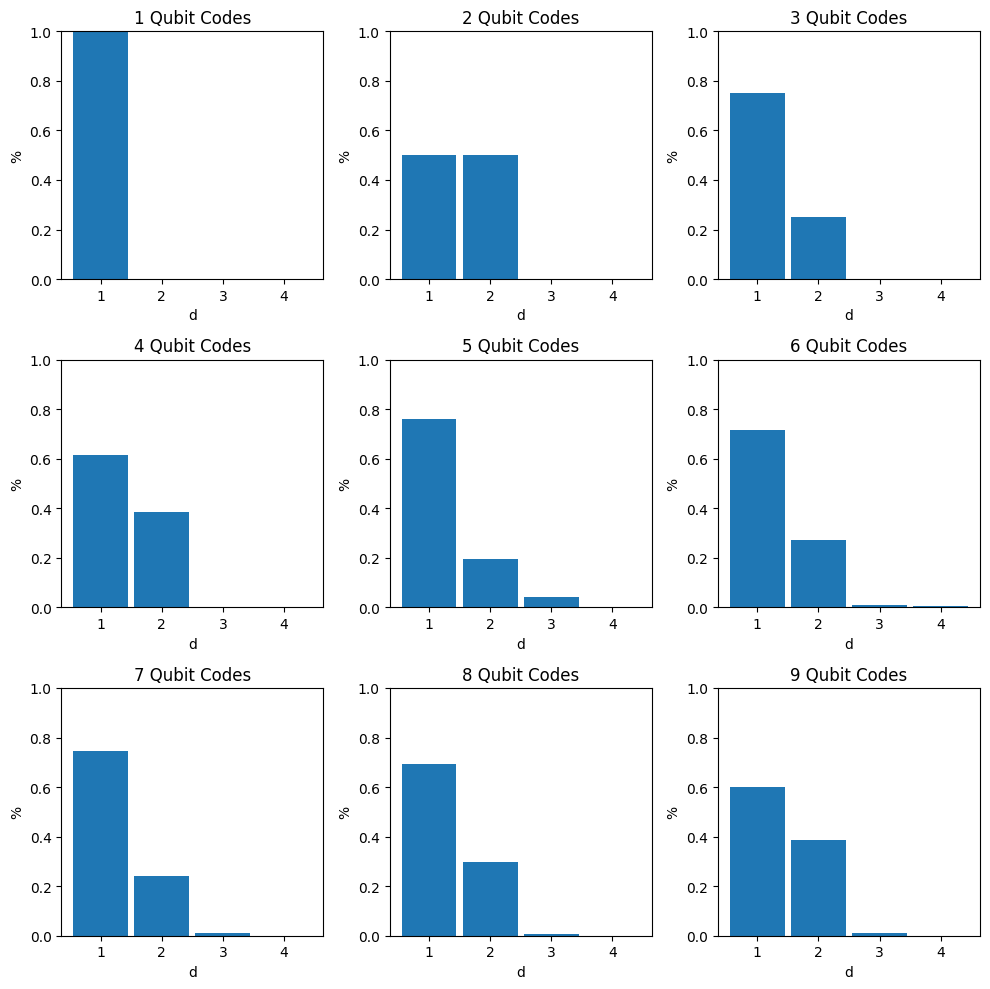

In [71]:
data = {int(key): distronperc[key] for key in distronperc.keys()}

import matplotlib.pyplot as plt
import numpy as np

num_bins = len(data[1])
bins = np.arange(num_bins + 1)  # Create bin edges from 0 to number of bins

# Compute the midpoints of each bin for centering the bars
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Plot each list as a histogram
for i, (key, percentages) in enumerate(data.items()):
    axs[i].bar(bin_centers, percentages, width=0.9, align='center')  # Center the bars on bin midpoints
    axs[i].set_title(f'{key} Qubit Codes')
    axs[i].set_ylim(0, 1)  # Set the y-axis to 1 since percentages sum to 1
    axs[i].set_xlabel('d')  # Label for the horizontal axis
    axs[i].set_ylabel('%')  # Label for the vertical axis
    axs[i].set_xticks(bin_centers)  # Set the ticks at the center of the bins
    axs[i].set_xticklabels(range(1, num_bins + 1))  # Use original integers as tick labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [90]:
distroindperc = {}
temp = distroind
for distro in temp:
    print(f"{distro}: {temp[distro]} : {sum(temp[distro])}")
    total = sum(temp[distro])
    if total !=0:
        perc = [v/total for v in temp[distro]]
        distroindperc[distro] = perc

[[0,0]]: [0, 0, 0, 0] : 0
[[1,0]]: [1, 0, 0, 0] : 1
[[1,1]]: [1, 0, 0, 0] : 1
[[2,0]]: [0, 1, 0, 0] : 1
[[2,1]]: [1, 0, 0, 0] : 1
[[2,2]]: [0, 0, 0, 0] : 0
[[3,0]]: [0, 1, 0, 0] : 1
[[3,1]]: [2, 0, 0, 0] : 2
[[3,2]]: [1, 0, 0, 0] : 1
[[3,3]]: [0, 0, 0, 0] : 0
[[4,0]]: [0, 2, 0, 0] : 2
[[4,1]]: [4, 2, 0, 0] : 6
[[4,2]]: [3, 1, 0, 0] : 4
[[4,3]]: [1, 0, 0, 0] : 1
[[4,4]]: [0, 0, 0, 0] : 0
[[5,0]]: [0, 3, 1, 0] : 4
[[5,1]]: [12, 4, 1, 0] : 17
[[5,2]]: [16, 2, 0, 0] : 18
[[5,3]]: [6, 0, 0, 0] : 6
[[5,4]]: [1, 0, 0, 0] : 1
[[5,5]]: [0, 0, 0, 0] : 0
[[6,0]]: [0, 9, 1, 1] : 11
[[6,1]]: [35, 27, 1, 0] : 63
[[6,2]]: [82, 25, 0, 0] : 107
[[6,3]]: [48, 5, 0, 0] : 53
[[6,4]]: [9, 1, 0, 0] : 10
[[6,5]]: [1, 0, 0, 0] : 1
[[6,6]]: [0, 0, 0, 0] : 0
[[7,0]]: [0, 22, 4, 0] : 26
[[7,1]]: [140, 128, 16, 0] : 284
[[7,2]]: [545, 209, 0, 0] : 754
[[7,3]]: [494, 62, 0, 0] : 556
[[7,4]]: [125, 6, 0, 0] : 131
[[7,5]]: [13, 0, 0, 0] : 13
[[7,6]]: [1, 0, 0, 0] : 1
[[7,7]]: [0, 0, 0, 0] : 0
[[8,0]]: [0, 85, 11, 5]

In [98]:
distroindperc

{'[[1,0]]': [1.0, 0.0, 0.0, 0.0],
 '[[1,1]]': [1.0, 0.0, 0.0, 0.0],
 '[[2,0]]': [0.0, 1.0, 0.0, 0.0],
 '[[2,1]]': [1.0, 0.0, 0.0, 0.0],
 '[[3,0]]': [0.0, 1.0, 0.0, 0.0],
 '[[3,1]]': [1.0, 0.0, 0.0, 0.0],
 '[[3,2]]': [1.0, 0.0, 0.0, 0.0],
 '[[4,0]]': [0.0, 1.0, 0.0, 0.0],
 '[[4,1]]': [0.6666666666666666, 0.3333333333333333, 0.0, 0.0],
 '[[4,2]]': [0.75, 0.25, 0.0, 0.0],
 '[[4,3]]': [1.0, 0.0, 0.0, 0.0],
 '[[5,0]]': [0.0, 0.75, 0.25, 0.0],
 '[[5,1]]': [0.7058823529411765,
  0.23529411764705882,
  0.058823529411764705,
  0.0],
 '[[5,2]]': [0.8888888888888888, 0.1111111111111111, 0.0, 0.0],
 '[[5,3]]': [1.0, 0.0, 0.0, 0.0],
 '[[5,4]]': [1.0, 0.0, 0.0, 0.0],
 '[[6,0]]': [0.0,
  0.8181818181818182,
  0.09090909090909091,
  0.09090909090909091],
 '[[6,1]]': [0.5555555555555556,
  0.42857142857142855,
  0.015873015873015872,
  0.0],
 '[[6,2]]': [0.7663551401869159, 0.2336448598130841, 0.0, 0.0],
 '[[6,3]]': [0.9056603773584906, 0.09433962264150944, 0.0, 0.0],
 '[[6,4]]': [0.9, 0.1, 0.0, 0.0],


In [97]:
for key in distroindperc:
    n = str(key)
    val = [f"{num:.5f}" for num in distroindperc[key]]
    print(f"{n} : {val}")

[[1,0]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[1,1]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[2,0]] : ['0.00000', '1.00000', '0.00000', '0.00000']
[[2,1]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[3,0]] : ['0.00000', '1.00000', '0.00000', '0.00000']
[[3,1]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[3,2]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[4,0]] : ['0.00000', '1.00000', '0.00000', '0.00000']
[[4,1]] : ['0.66667', '0.33333', '0.00000', '0.00000']
[[4,2]] : ['0.75000', '0.25000', '0.00000', '0.00000']
[[4,3]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[5,0]] : ['0.00000', '0.75000', '0.25000', '0.00000']
[[5,1]] : ['0.70588', '0.23529', '0.05882', '0.00000']
[[5,2]] : ['0.88889', '0.11111', '0.00000', '0.00000']
[[5,3]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[5,4]] : ['1.00000', '0.00000', '0.00000', '0.00000']
[[6,0]] : ['0.00000', '0.81818', '0.09091', '0.09091']
[[6,1]] : ['0.55556', '0.42857', '0.01587', '0.00000']
[[6,2]] : 

In [75]:
import ast

In [79]:
def extract_n_codes(n):
    selection = {}
    for key in distroindperc:
        key_pair = ast.literal_eval(key)[0]
        if key_pair[0] == n:
            selection[key] = distroindperc[key]
    return selection
    

In [80]:
data = extract_n_codes(9)

In [82]:


import matplotlib.pyplot as plt
import numpy as np
def plot_d_distro(data):
    num_bins = len(data[1])
    bins = np.arange(num_bins + 1)  # Create bin edges from 0 to number of bins
    
    # Compute the midpoints of each bin for centering the bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Create a figure and a 3x3 grid of subplots
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    
    # Flatten the axes array for easy indexing
    axs = axs.flatten()
    
    # Plot each list as a histogram
    for i, (key, percentages) in enumerate(data.items()):
        axs[i].bar(bin_centers, percentages, width=0.9, align='center')  # Center the bars on bin midpoints
        axs[i].set_title(f'{key} Qubit Codes')
        axs[i].set_ylim(0, 1)  # Set the y-axis to 1 since percentages sum to 1
        axs[i].set_xlabel('d')  # Label for the horizontal axis
        axs[i].set_ylabel('%')  # Label for the vertical axis
        axs[i].set_xticks(bin_centers)  # Set the ticks at the center of the bins
        axs[i].set_xticklabels(range(1, num_bins + 1))  # Use original integers as tick labels
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [86]:
a='[[2,1]]'
ast.literal_eval(a)[0]

[2, 1]

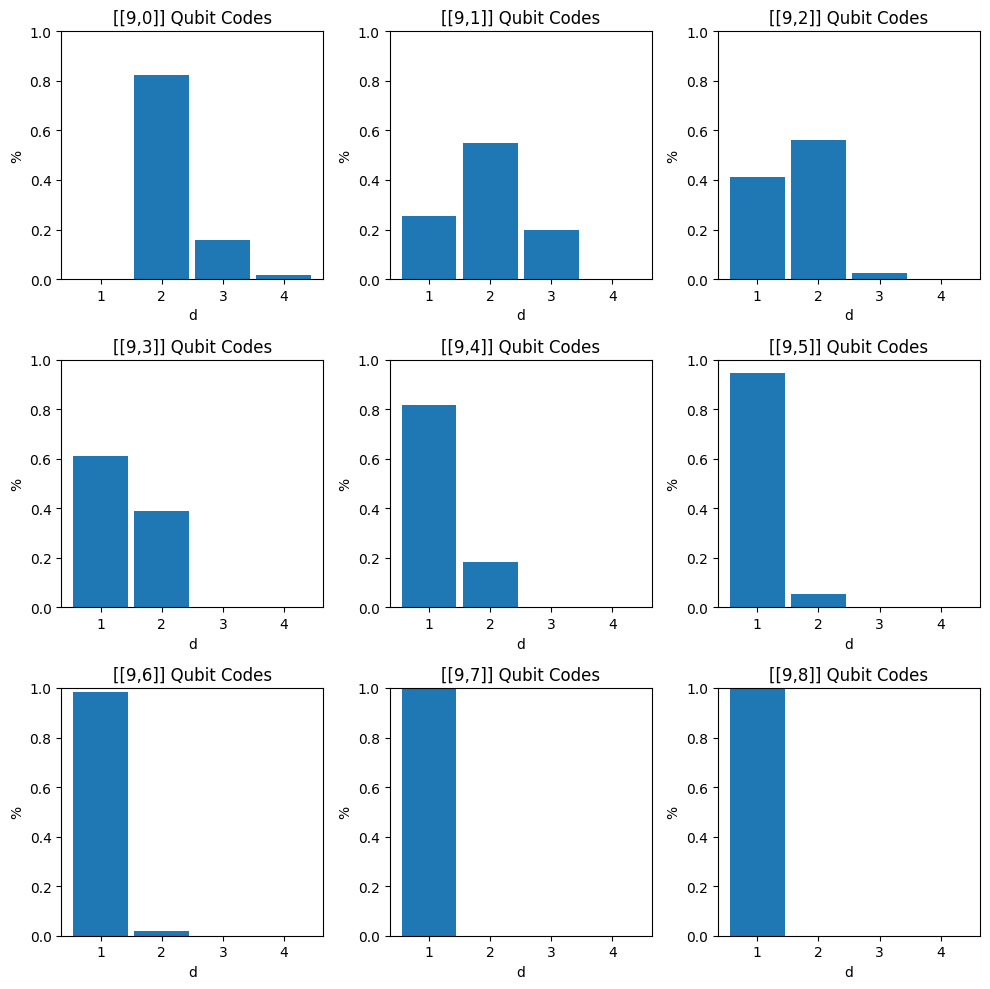

In [83]:
plot_d_distro(extract_n_codes(9))

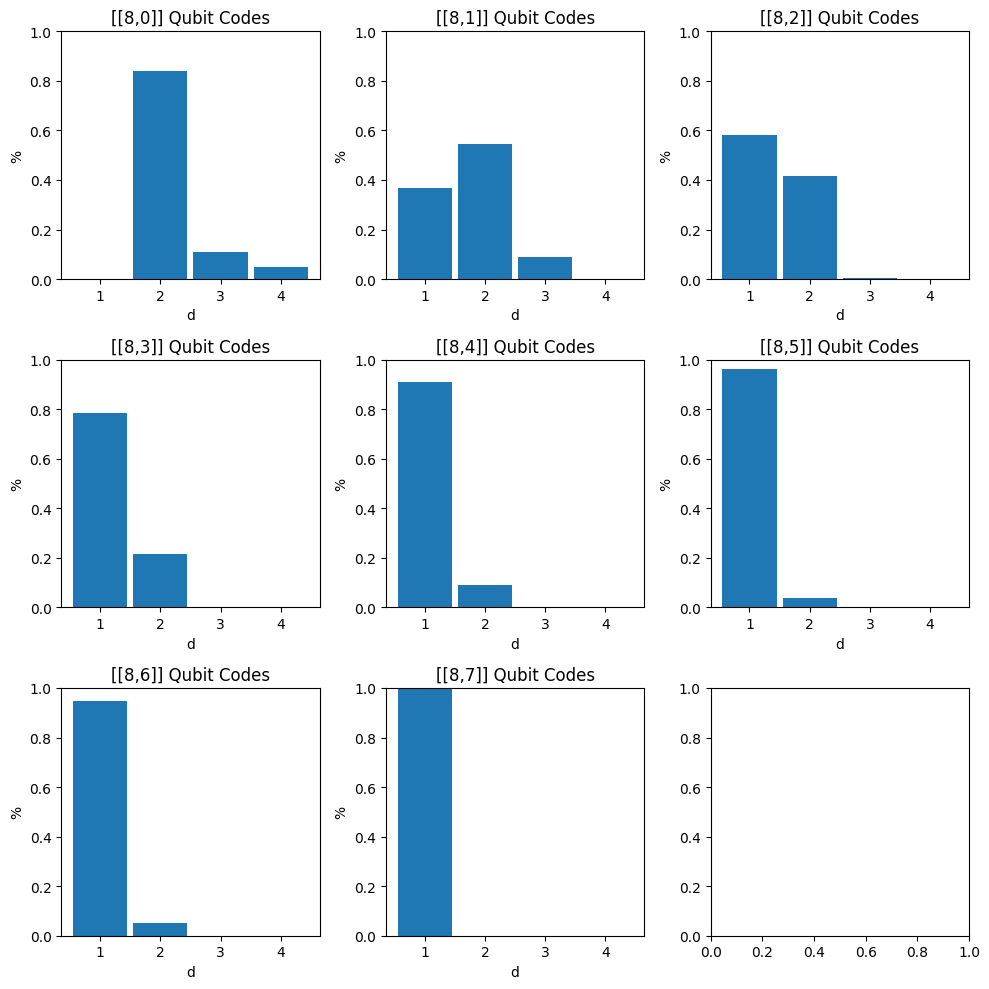

In [84]:
plot_d_distro(extract_n_codes(8))

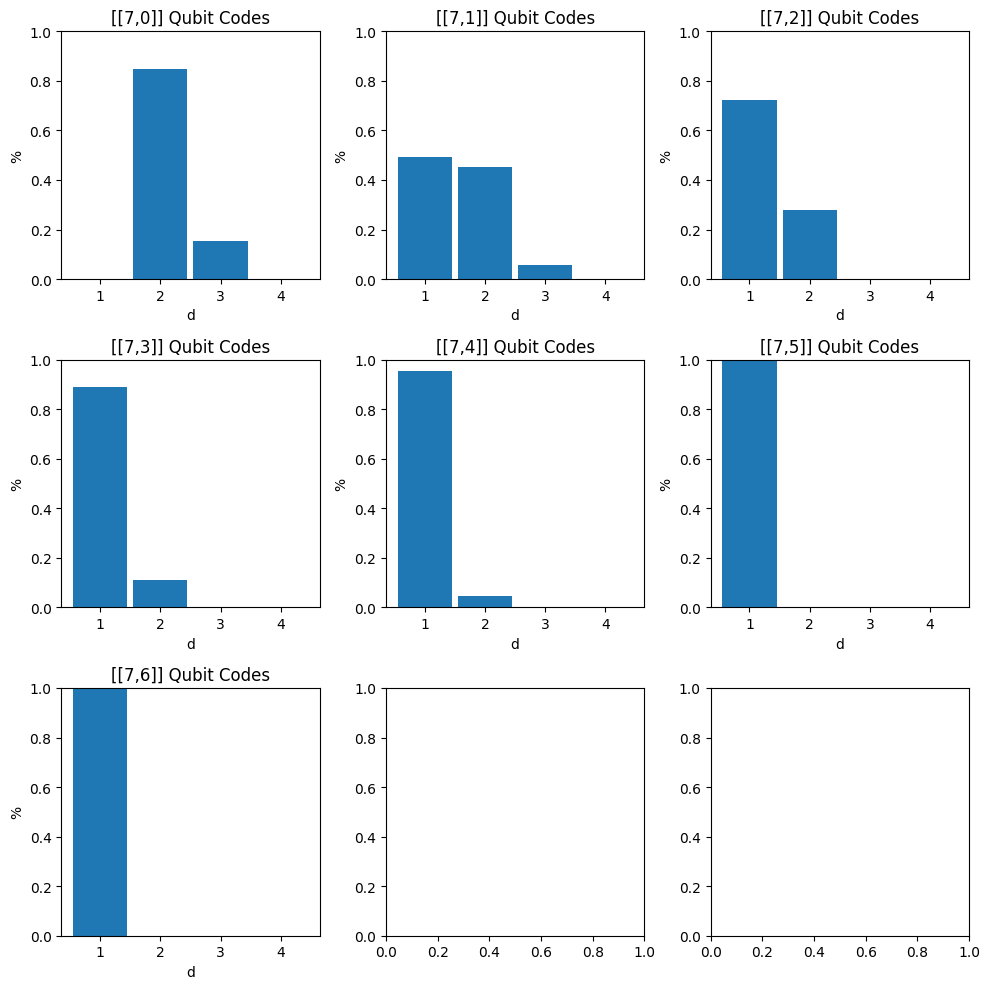

In [85]:
plot_d_distro(extract_n_codes(7))

In [99]:
date = distroindperc

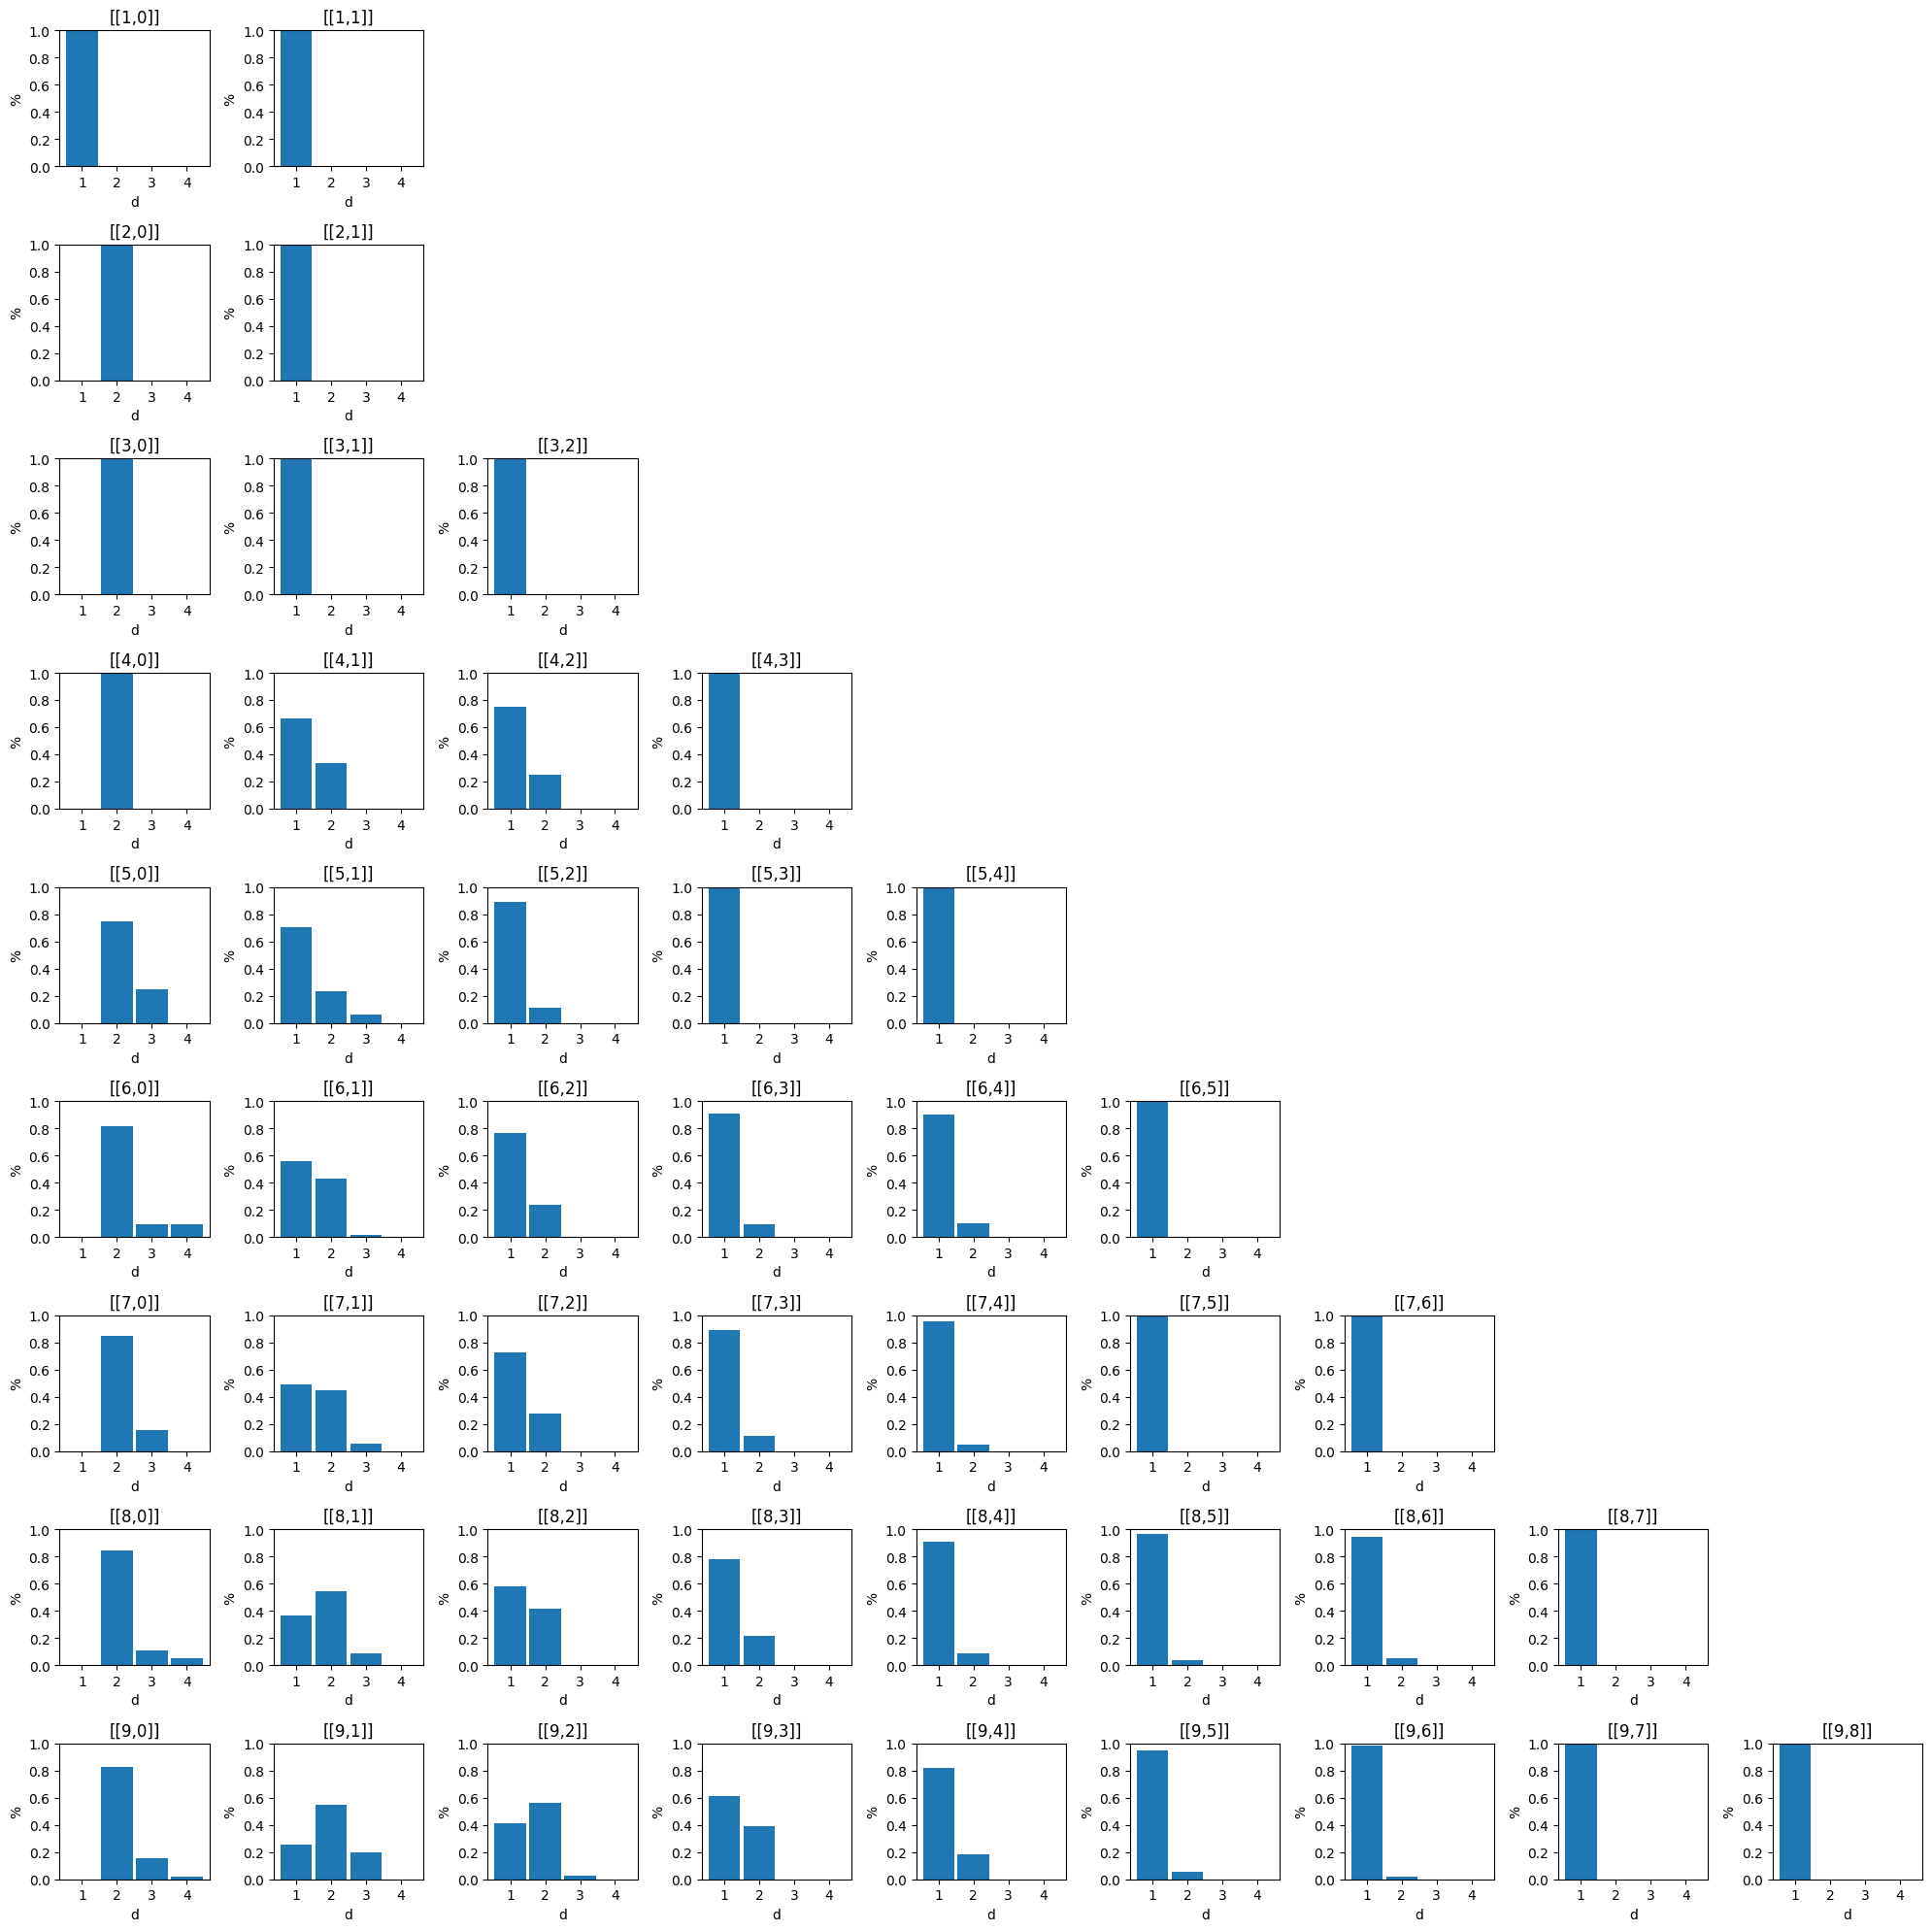

In [111]:
bins = np.arange(num_bins + 1)  # Create bin edges from 0 to number of bins
num_bins = len(data['[[1,0]]'])  

# Compute the midpoints of each bin for centering the bars
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create a figure and a 9x9 grid of subplots
fig, axs = plt.subplots(9, 9, figsize=(20, 20))

# Flatten the axes array for easy indexing
axs = axs.flatten()

for cell in range(9*9):
    axs[cell].set_visible(False)

# Plot each list as a histogram
for i, (key, percentages) in enumerate(data.items()):
    n, k = ast.literal_eval(key)[0]
    cell = 9*(n-1)+k
    axs[cell].set_visible(True)
    axs[cell].bar(bin_centers, percentages, width=0.9, align='center')  # Center the bars on bin midpoints
    axs[cell].set_title(f'{key}')
    axs[cell].set_ylim(0, 1)  # Set the y-axis to 1 since percentages sum to 1
    axs[cell].set_xlabel('d')  # Label for the horizontal axis
    axs[cell].set_ylabel('%')  # Label for the vertical axis
    axs[cell].set_xticks(bin_centers)  # Set the ticks at the center of the bins
    axs[cell].set_xticklabels(range(1, num_bins + 1))  # Use original integers as tick labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [137]:
distroindqec = {}
for n in range(10):
    for k in range(n+1):
        val = [len(cb.all_small_codes(n, k, d=d, info_only=True, list_only=True)) for d in range(1,5)]
        if sum(val)>0:
            distroindqec[f'[[{n},{k}]]']=val

In [138]:
distroindqec

{'[[1,0]]': [1, 0, 0, 0],
 '[[1,1]]': [1, 0, 0, 0],
 '[[2,0]]': [1, 1, 0, 0],
 '[[2,1]]': [2, 0, 0, 0],
 '[[2,2]]': [1, 0, 0, 0],
 '[[3,0]]': [2, 1, 0, 0],
 '[[3,1]]': [5, 0, 0, 0],
 '[[3,2]]': [3, 0, 0, 0],
 '[[3,3]]': [1, 0, 0, 0],
 '[[4,0]]': [3, 3, 0, 0],
 '[[4,1]]': [11, 2, 0, 0],
 '[[4,2]]': [10, 1, 0, 0],
 '[[4,3]]': [4, 0, 0, 0],
 '[[4,4]]': [1, 0, 0, 0],
 '[[5,0]]': [6, 4, 1, 0],
 '[[5,1]]': [29, 6, 1, 0],
 '[[5,2]]': [37, 3, 0, 0],
 '[[5,3]]': [19, 0, 0, 0],
 '[[5,4]]': [5, 0, 0, 0],
 '[[5,5]]': [1, 0, 0, 0],
 '[[6,0]]': [11, 13, 1, 1],
 '[[6,1]]': [78, 35, 2, 0],
 '[[6,2]]': [156, 29, 0, 0],
 '[[6,3]]': [104, 5, 0, 0],
 '[[6,4]]': [31, 1, 0, 0],
 '[[6,5]]': [6, 0, 0, 0],
 '[[6,6]]': [1, 0, 0, 0],
 '[[7,0]]': [26, 29, 4, 0],
 '[[7,1]]': [260, 169, 19, 0],
 '[[7,2]]': [834, 241, 0, 0],
 '[[7,3]]': [785, 67, 0, 0],
 '[[7,4]]': [260, 7, 0, 0],
 '[[7,5]]': [48, 0, 0, 0],
 '[[7,6]]': [7, 0, 0, 0],
 '[[7,7]]': [1, 0, 0, 0],
 '[[8,0]]': [59, 107, 11, 5],
 '[[8,1]]': [1023, 1170, 178

In [139]:
distroindqecperc = {}
for distro in distroindqec:
    total = sum(distroindqec[distro])
    perc = [v/total for v in distroindqec[distro]]
    distroindqecperc[distro] = perc

In [140]:
distroindqecperc

{'[[1,0]]': [1.0, 0.0, 0.0, 0.0],
 '[[1,1]]': [1.0, 0.0, 0.0, 0.0],
 '[[2,0]]': [0.5, 0.5, 0.0, 0.0],
 '[[2,1]]': [1.0, 0.0, 0.0, 0.0],
 '[[2,2]]': [1.0, 0.0, 0.0, 0.0],
 '[[3,0]]': [0.6666666666666666, 0.3333333333333333, 0.0, 0.0],
 '[[3,1]]': [1.0, 0.0, 0.0, 0.0],
 '[[3,2]]': [1.0, 0.0, 0.0, 0.0],
 '[[3,3]]': [1.0, 0.0, 0.0, 0.0],
 '[[4,0]]': [0.5, 0.5, 0.0, 0.0],
 '[[4,1]]': [0.8461538461538461, 0.15384615384615385, 0.0, 0.0],
 '[[4,2]]': [0.9090909090909091, 0.09090909090909091, 0.0, 0.0],
 '[[4,3]]': [1.0, 0.0, 0.0, 0.0],
 '[[4,4]]': [1.0, 0.0, 0.0, 0.0],
 '[[5,0]]': [0.5454545454545454,
  0.36363636363636365,
  0.09090909090909091,
  0.0],
 '[[5,1]]': [0.8055555555555556,
  0.16666666666666666,
  0.027777777777777776,
  0.0],
 '[[5,2]]': [0.925, 0.075, 0.0, 0.0],
 '[[5,3]]': [1.0, 0.0, 0.0, 0.0],
 '[[5,4]]': [1.0, 0.0, 0.0, 0.0],
 '[[5,5]]': [1.0, 0.0, 0.0, 0.0],
 '[[6,0]]': [0.4230769230769231,
  0.5,
  0.038461538461538464,
  0.038461538461538464],
 '[[6,1]]': [0.6782608695652

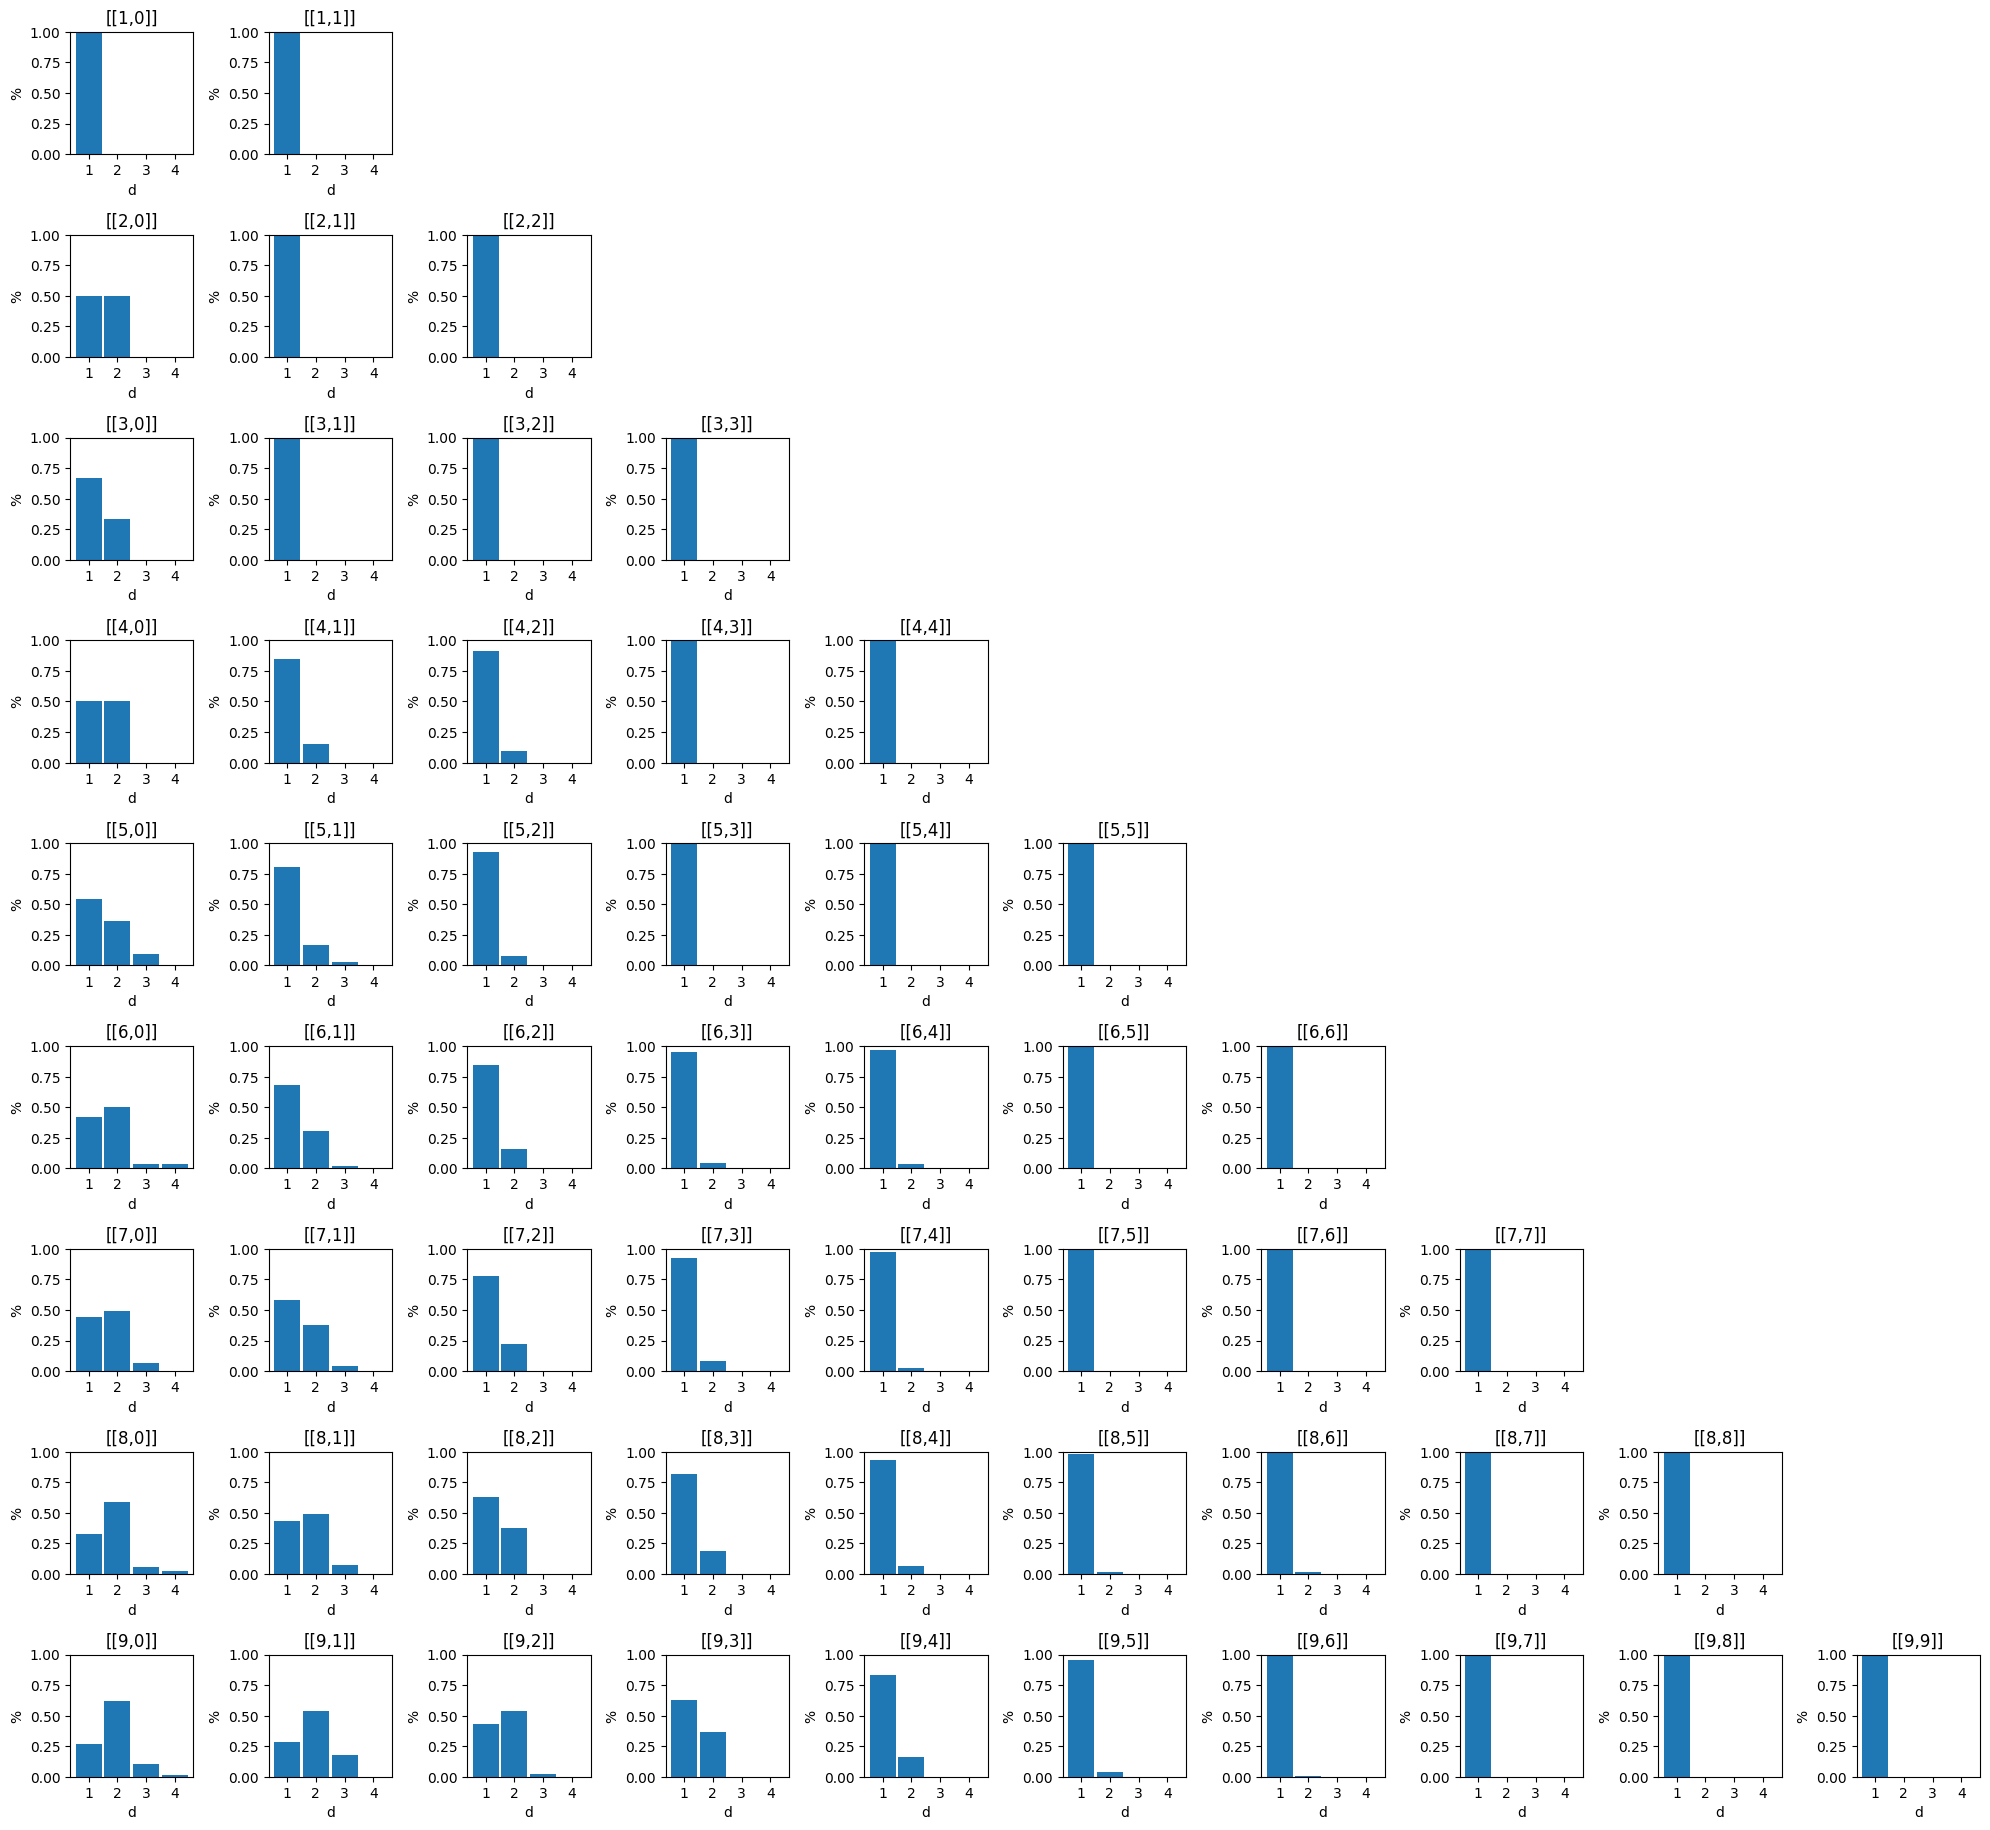

In [145]:
data = distroindqecperc
bins = np.arange(num_bins + 1)  # Create bin edges from 0 to number of bins
num_bins = len(data['[[1,0]]'])  

# Compute the midpoints of each bin for centering the bars
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create a figure and a 10x10 grid of subplots
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

# Flatten the axes array for easy indexing
axs = axs.flatten()

for cell in range(10*10):
    axs[cell].set_visible(False)

# Plot each list as a histogram
for i, (key, percentages) in enumerate(data.items()):
    n, k = ast.literal_eval(key)[0]
    cell = 10*(n-1)+k
    axs[cell].set_visible(True)
    axs[cell].bar(bin_centers, percentages, width=0.9, align='center')  # Center the bars on bin midpoints
    axs[cell].set_title(f'{key}')
    axs[cell].set_ylim(0, 1)  # Set the y-axis to 1 since percentages sum to 1
    axs[cell].set_xlabel('d')  # Label for the horizontal axis
    axs[cell].set_ylabel('%')  # Label for the vertical axis
    axs[cell].set_xticks(bin_centers)  # Set the ticks at the center of the bins
    axs[cell].set_xticklabels(range(1, num_bins + 1))  # Use original integers as tick labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [125]:
data

{'[[4,1]]': [1.0, 0.0, 0.0],
 '[[4,2]]': [1.0, 0.0, 0.0],
 '[[5,1]]': [0.8, 0.2, 0.0],
 '[[5,2]]': [1.0, 0.0, 0.0],
 '[[6,1]]': [0.9642857142857143, 0.03571428571428571, 0.0],
 '[[6,2]]': [1.0, 0.0, 0.0],
 '[[6,3]]': [1.0, 0.0, 0.0],
 '[[6,4]]': [1.0, 0.0, 0.0],
 '[[7,1]]': [0.8888888888888888, 0.1111111111111111, 0.0],
 '[[7,2]]': [1.0, 0.0, 0.0],
 '[[7,3]]': [1.0, 0.0, 0.0],
 '[[7,4]]': [1.0, 0.0, 0.0],
 '[[8,1]]': [0.8599464763603925, 0.1400535236396075, 0.0],
 '[[8,2]]': [0.9942363112391931, 0.005763688760806916, 0.0],
 '[[8,3]]': [0.9995107632093934, 0.0004892367906066536, 0.0],
 '[[8,4]]': [1.0, 0.0, 0.0],
 '[[8,5]]': [1.0, 0.0, 0.0],
 '[[8,6]]': [1.0, 0.0, 0.0],
 '[[9,1]]': [0.7336404810245197, 0.26635951897548027, 0.0],
 '[[9,2]]': [0.9550638246016675, 0.044936175398332535, 0.0],
 '[[9,3]]': [0.9982818403744188, 0.0017181596255811421, 0.0],
 '[[9,4]]': [1.0, 0.0, 0.0],
 '[[9,5]]': [1.0, 0.0, 0.0],
 '[[9,6]]': [1.0, 0.0, 0.0]}

In [134]:
test = {}
for n in range(10):
    temp = [0]*4
    k=0
    val = [len(cb.all_small_codes(n, k, d=d, is_decomposable=False, info_only=True, list_only=True)) for d in range(1,5)]
    temp = [v+t for v,t in zip(val, temp)]
    test[f'{n}']=temp

In [135]:
test

{'0': [0, 0, 0, 0],
 '1': [1, 0, 0, 0],
 '2': [0, 1, 0, 0],
 '3': [0, 1, 0, 0],
 '4': [0, 2, 0, 0],
 '5': [0, 3, 1, 0],
 '6': [0, 9, 1, 1],
 '7': [0, 22, 4, 0],
 '8': [0, 85, 11, 5],
 '9': [0, 363, 69, 8]}